# Projeto MTR

0. Pegar o dataset de heart disease (e possivelmente de airbnb)
1. Manipular os dados para deixá-los prontos para treinamento por modelos de ML 
2. Pesquisar e escolher os modelos para serem testados (de preferência modelos que sabemos ter erros correlacionados)
3. Treinar modelos (tentar achar os melhores hiperparâmetros, usar validação cruzada de 5 ou 10 folds)
4. Construir assessores (treinados para tentar prever o erro dos modelos) (também tentar achar melhores hiperparâmetros):

    4.1. Um assessor para cada modelo (RandomForestRegressor ou algum outro)
    
    4.2. Um assessor multi-target para todos os modelos (RegressorChains (outputs relacionados) **e** Single Target Method (outputs independentes))
    
    4.3. Um assessor para cada "família" ou grupo de modelos de ML com erros correlacionados (RegressorChains)

5. Coletar resultados e tirar conclusões para apresentar

## Imports e funções

In [1]:
from utils import *
from MSVR import MSVR
from experiment_setup import ExpSetup, GroupedAssessor, OptunaStudy

/home/CIN/pbsl/proj-mtr/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Dataset

In [2]:
DIR = 'churn'

seed = 2133330296#randint(0, 4294967295)
print(seed)

2133330296


In [3]:
setup = ExpSetup(DIR, seed, 0)

Xa_train, Xa_train_norm, Xa_test, Xa_test_norm, ya_train, ya_test, pred_corrls, pred_corrls2, performs = setup.assessorData()

Nº de instâncias: 7043
[REGISTERED: DTREE]
[Training]

Accuracy:         0.9992
Recall:           0.9994
Precision:        0.9989
F1:               0.9992
AUROC:            1.0000
AUPR:             1.0000
1-maxProb média:  0.0008
1-maxProb dp:     0.0168

[Testing]

Accuracy:         0.7391
Recall:           0.5398
Precision:        0.4798
F1:               0.5080
AUROC:            0.6733
AUPR:             0.3745
1-maxProb média:  0.0007
1-maxProb dp:     0.0167

[REGISTERED: SGD]


/home/CIN/pbsl/proj-mtr/experiment_setup.py:189: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(rdict)
/home/CIN/pbsl/proj-mtr/experiment_setup.py:198: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.75       0.76388889 0.875      ... 0.90277778 0.23611111 0.04166667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.Xb_train_norm.loc[:,continuous_cols] = scaler1.fit_transform(self.Xb_train_norm.loc[:,continuous_cols], self.yb_train)
/home/CIN/pbsl/proj-mtr/experiment_setup.py:202: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.31944444 0.06944444 0.23611

[Training]

Accuracy:         0.7716
Recall:           0.8012
Precision:        0.7564
F1:               0.7782
AUROC:            0.8484
AUPR:             0.8241
1-maxProb média:  0.2514
1-maxProb dp:     0.1315

[Testing]

Accuracy:         0.7489
Recall:           0.7919
Precision:        0.4980
F1:               0.6114
AUROC:            0.8388
AUPR:             0.6145
1-maxProb média:  0.2403
1-maxProb dp:     0.1405

[REGISTERED: LR]
[Training]

Accuracy:         0.7792
Recall:           0.8193
Precision:        0.7585
F1:               0.7877
AUROC:            0.8539
AUPR:             0.8305
1-maxProb média:  0.2243
1-maxProb dp:     0.1373

[Testing]

Accuracy:         0.7509
Recall:           0.8081
Precision:        0.5005
F1:               0.6182
AUROC:            0.8425
AUPR:             0.6344
1-maxProb média:  0.2177
1-maxProb dp:     0.1470

[REGISTERED: KNN]
[Training]

Accuracy:         0.9992
Recall:           0.9994
Precision:        0.9989
F1:               0.9992
AUR

In [5]:
#Xa_train = setup.Xa_train
#Xa_train_norm = setup.Xb_test_norm
#Xa_test = setup.Xa_test
#Xa_test_norm = setup.Xa_test_norm
#ya_train = setup.ya_train
#ya_test = setup.ya_test
#pred_corrls = setup.pred_corrls
#pred_corrls2 = setup.pred_corrls2
#performs = setup.performs

# Assessors

#### Análise de correlações

Conjunto de Treinamento:

O conjunto de teste dos modelos base já é o conjunto de treinamento dos assessores.

In [4]:
groups = {}
model_names = list(performs.keys())

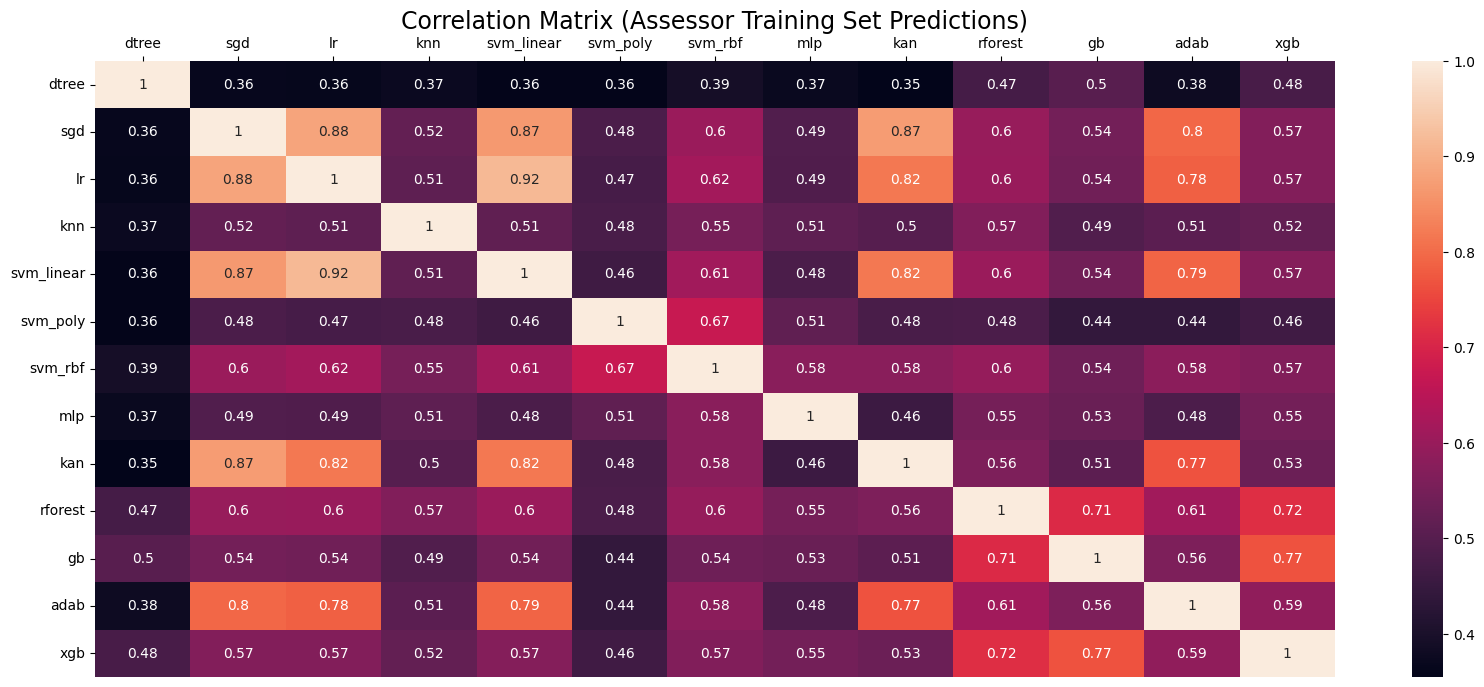

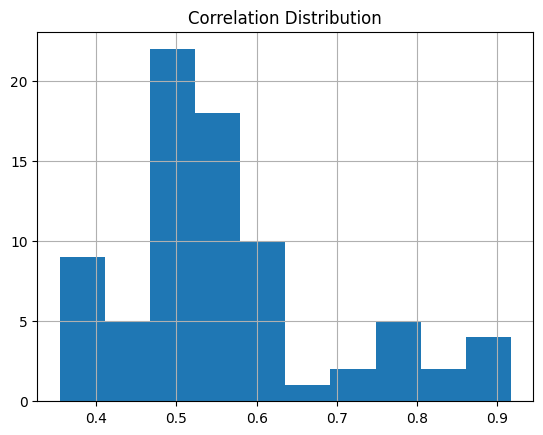

Training correlation distribution:
count    78.000000
mean      0.559526
std       0.133098
min       0.354849
25%       0.482074
50%       0.538667
75%       0.599131
max       0.916581
Name: corr, dtype: float64
[Saved image "cm_atrain.eps"]
[Saved image "cd_atrain.eps"]


In [5]:
correlation_matrix(pred_corrls, True, DIR, 'Assessor', 'Training')

In [6]:
MIN_SCORE = 0.65 #corrls_values['corr'].quantile(0.75)

print('Min_score:', MIN_SCORE)

groups['true_assessor_train'] = group_search(pred_corrls, MIN_SCORE)
groups['true_assessor_train']

Min_score: 0.65


[['svm_rbf', 'svm_poly'],
 ['adab', 'lr', 'svm_linear', 'kan', 'sgd'],
 ['gb', 'rforest', 'xgb'],
 ['knn'],
 ['dtree'],
 ['mlp']]

Conjunto de Teste:

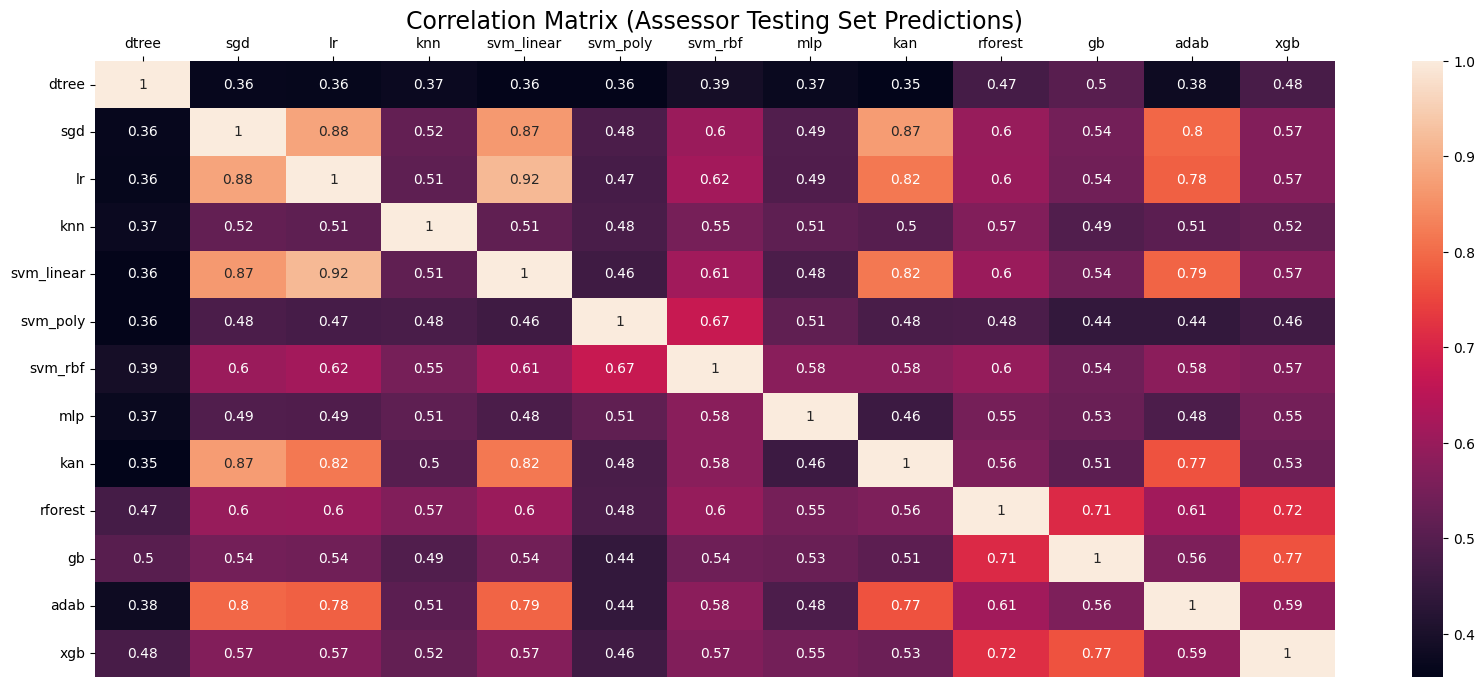

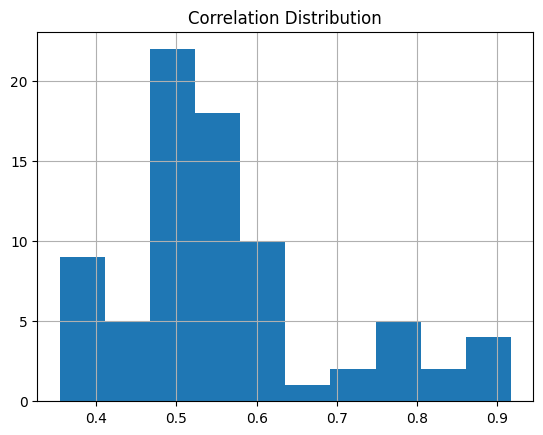

Testing correlation distribution:
count    78.000000
mean      0.559526
std       0.133098
min       0.354849
25%       0.482074
50%       0.538667
75%       0.599131
max       0.916581
Name: corr, dtype: float64
[Saved image "cm_atest.eps"]
[Saved image "cd_atest.eps"]


In [7]:
correlation_matrix(pred_corrls, True, DIR, 'Assessor', 'Testing')

In [8]:
groups['true_assessor_test'] = group_search(pred_corrls2, MIN_SCORE)
groups['true_assessor_test']

[['svm_rbf', 'svm_poly'],
 ['adab', 'lr', 'svm_linear', 'kan', 'sgd'],
 ['gb', 'rforest', 'xgb'],
 ['knn'],
 ['dtree'],
 ['mlp']]

Diferença entre correlações do conjnuto de teste e de treinamento:
MSE:  0.0002
NMSE: 0.0066
MAE:  0.0097
NMAE: 0.0897
aRRMSE: 0.0782
aCC:  0.9980


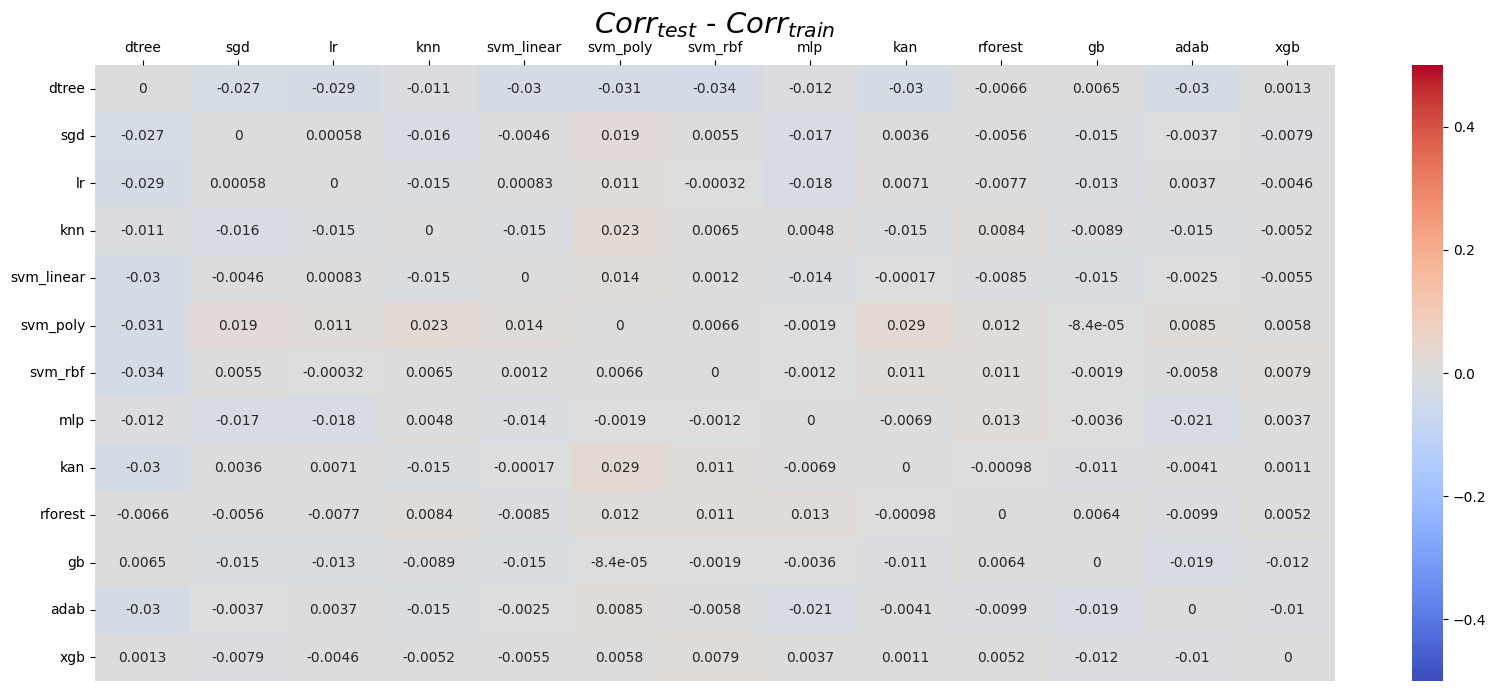

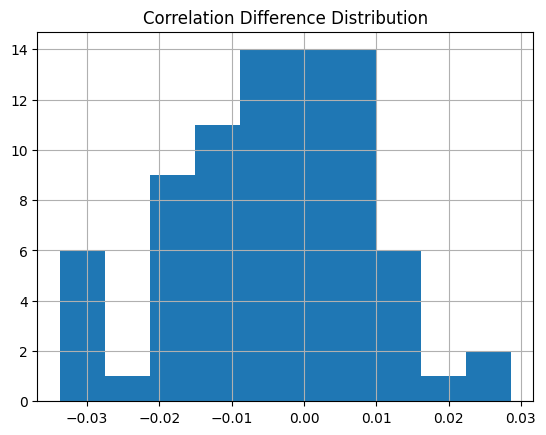

[Saved image "cmd_base.eps"]
[Saved image "cdd_base.eps"]


In [9]:
diff_corrls = pred_corrls2-pred_corrls
diff_corrls_values = corrlArray(diff_corrls)['corr']

print(f'''Diferença entre correlações do conjnuto de teste e de treinamento:
MSE:  {mse(pred_corrls, pred_corrls2):.4f}
NMSE: {nmse(pred_corrls, pred_corrls2):.4f}
MAE:  {mae(pred_corrls, pred_corrls2):.4f}
NMAE: {nmae(pred_corrls, pred_corrls2):.4f}
aRRMSE: {rrmse(pred_corrls, pred_corrls2):.4f}
aCC:  {corrCoeff(pred_corrls, pred_corrls2):.4f}''')

plt.figure(figsize=(20,8))
plt.title(r'$Corr_{test}$ - $Corr_{train}$', fontsize=21)
hm = sns.heatmap(diff_corrls, annot=True, cmap='coolwarm', vmin=-0.5, vmax=0.5)
hm.xaxis.tick_top()
plt.show(hm)

plt.title('Correlation Difference Distribution')
hg = diff_corrls_values.hist()
plt.show(hg)

save2figs(hm, hg, DIR)

## Globais

In [10]:
parameters = {'max_depth':[None,10,20,30],
                    'criterion':['squared_error', 'poisson', 'friedman_mse'],
                    'min_samples_split':[2,5,10,20,40,60],
                    'min_samples_leaf':[1,2,10,30],
                    'n_estimators':[20,50,100,150]}

In [11]:
# Criando o MultiIndex
multi_index = multIdx('ST','MRT','MRT(g)','M-SVR','M-SVR(g)','RC','RC(g)', subindex=model_names)

metrics_cols = ['MSE', 'MAE', 'NMSE', 'NMAE', 'aRRMSE', 'aCC']
metrics_df = pd.DataFrame(columns=metrics_cols, index=multi_index)
diff_metrics = pd.DataFrame(columns=metrics_cols, index=['ST','MRT','MRT(g)','M-SVR','M-SVR(g)','RC','RC(g)'])

### Regressor Chain
(RC)

In [16]:
#study = OptunaStudy(Xa_train, ya_train, 30, seed)
#
#study.search(RegressorChain, cv=5)
#
#rc_params = study.best_params
#regchain = RegressorChain(RandomForestRegressor(random_state=seed).set_params(**rc_params),
#                          random_state=seed, cv=5, verbose=True).fit(Xa_train, ya_train)

In [12]:
regchain = RegressorChain(RandomForestRegressor(random_state=seed), random_state=seed, cv=5,
                          verbose=True, order='random').fit(Xa_train, ya_train)

[Chain] .................. (1 of 13) Processing order 1, total=   1.6s
[Chain] ................. (2 of 13) Processing order 11, total=   1.8s
[Chain] .................. (3 of 13) Processing order 2, total=   2.1s
[Chain] ................. (4 of 13) Processing order 12, total=   2.3s
[Chain] .................. (5 of 13) Processing order 6, total=   2.5s
[Chain] .................. (6 of 13) Processing order 8, total=   2.9s
[Chain] .................. (7 of 13) Processing order 7, total=   3.3s
[Chain] .................. (8 of 13) Processing order 3, total=   3.2s
[Chain] .................. (9 of 13) Processing order 5, total=   4.0s
[Chain] ................. (10 of 13) Processing order 4, total=   4.1s
[Chain] ................. (11 of 13) Processing order 9, total=   4.0s
[Chain] ................. (12 of 13) Processing order 0, total=   3.1s
[Chain] ................ (13 of 13) Processing order 10, total=   5.3s


In [13]:
metrics_df.loc['RC',:] = assr_performance(regchain, Xa_test, ya_test, Xa_train, ya_train)

metrics_df.loc['RC',:]

[TRAINING SET]
MSE: 0.0569
NMSE: 0.5163
MAE: 0.1587
NMAE: 0.5832
aRRMSE: 0.7024
aCC: 0.6914

[TESTING SET]
MSE: 0.0765
NMSE: 0.7103
MAE: 0.1940
NMAE: 0.7130
aRRMSE: 0.8387
aCC: 0.5291


MSE       MAE      NMSE      NMAE    aRRMSE       aCC
Model                                                                 
dtree       0.182147  0.911835  0.350943  0.877422  0.954901   0.31394
sgd         0.032947  0.566861   0.11546  0.558353  0.752902  0.665228
lr          0.040726  0.599081  0.135289  0.603587  0.774003  0.638429
knn         0.112662  0.812414  0.266144  0.807578   0.90134  0.439333
svm_linear  0.038571  0.576097  0.134776  0.606475  0.759011  0.654807
svm_poly    0.068347  0.787278  0.202827  0.808835  0.887287  0.465522
svm_rbf     0.062253  0.733632  0.188439  0.755141  0.856523  0.520775
mlp         0.133987  0.866529  0.284824  0.827856  0.930875  0.381426
kan         0.036636  0.583437  0.124701  0.591542   0.76383   0.64933
rforest     0.051605  0.674909  0.164823   0.71017  0.821528  0.572534
gb          0.138823  0.877174  0.281271  0.834432  0.936576  0.368267
adab        0.007171  0.466632  0.054298  0.525835  0.683105  0.732953
xgb         0.089274   0.77762  0.217974  0.761905  0.881828  0.475741

#### Análise das correlações

Melhorar esse cálculo de correlação para fazer melhor uso do 1-(probabilidade da classe correta)

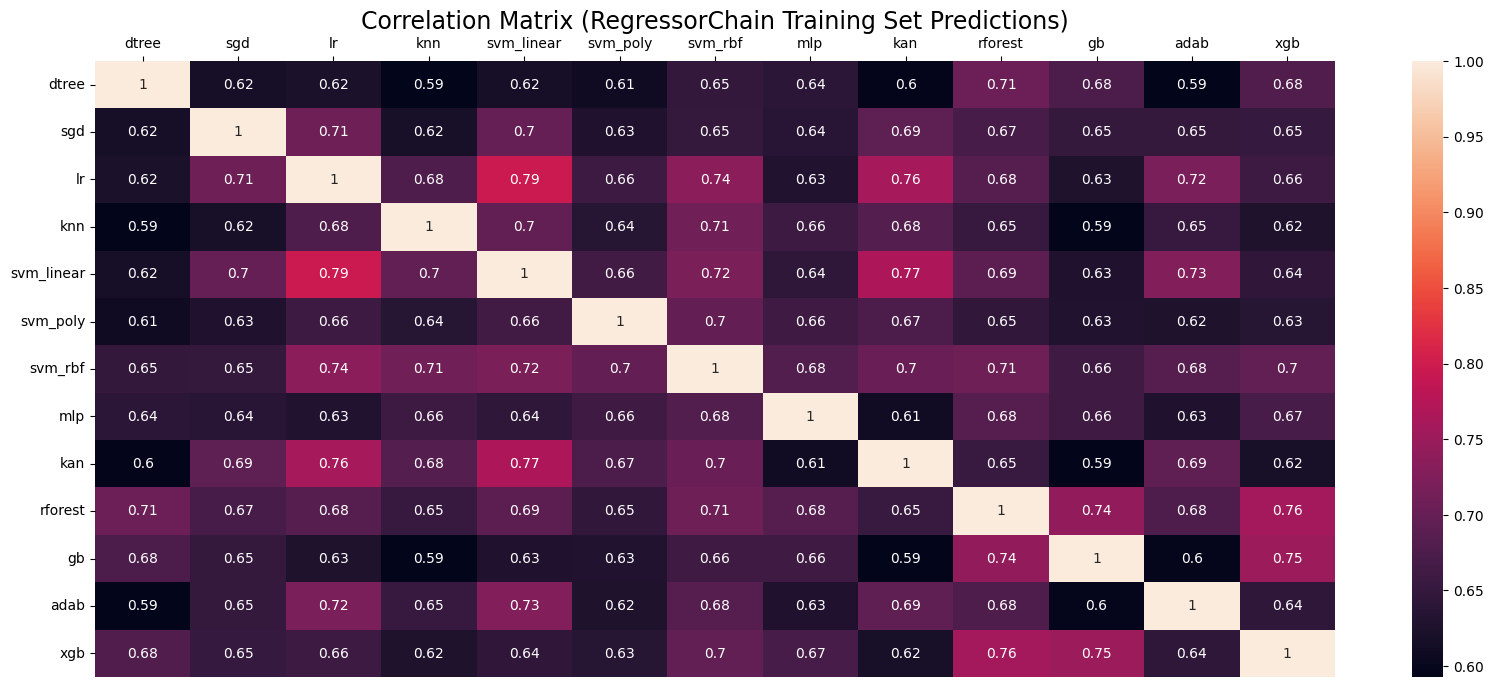

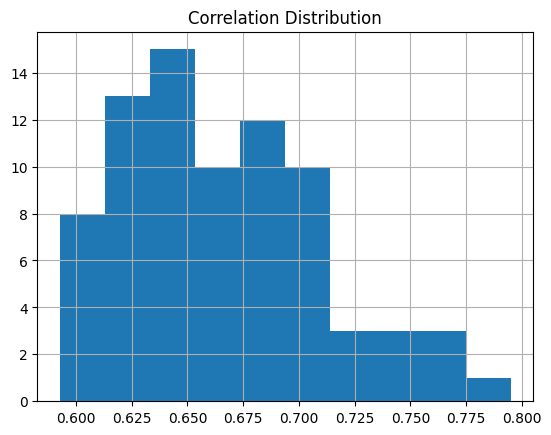

Training correlation distribution:
count    78.000000
mean      0.664744
std       0.044957
min       0.592818
25%       0.628162
50%       0.658965
75%       0.694089
max       0.794991
Name: corr, dtype: float64


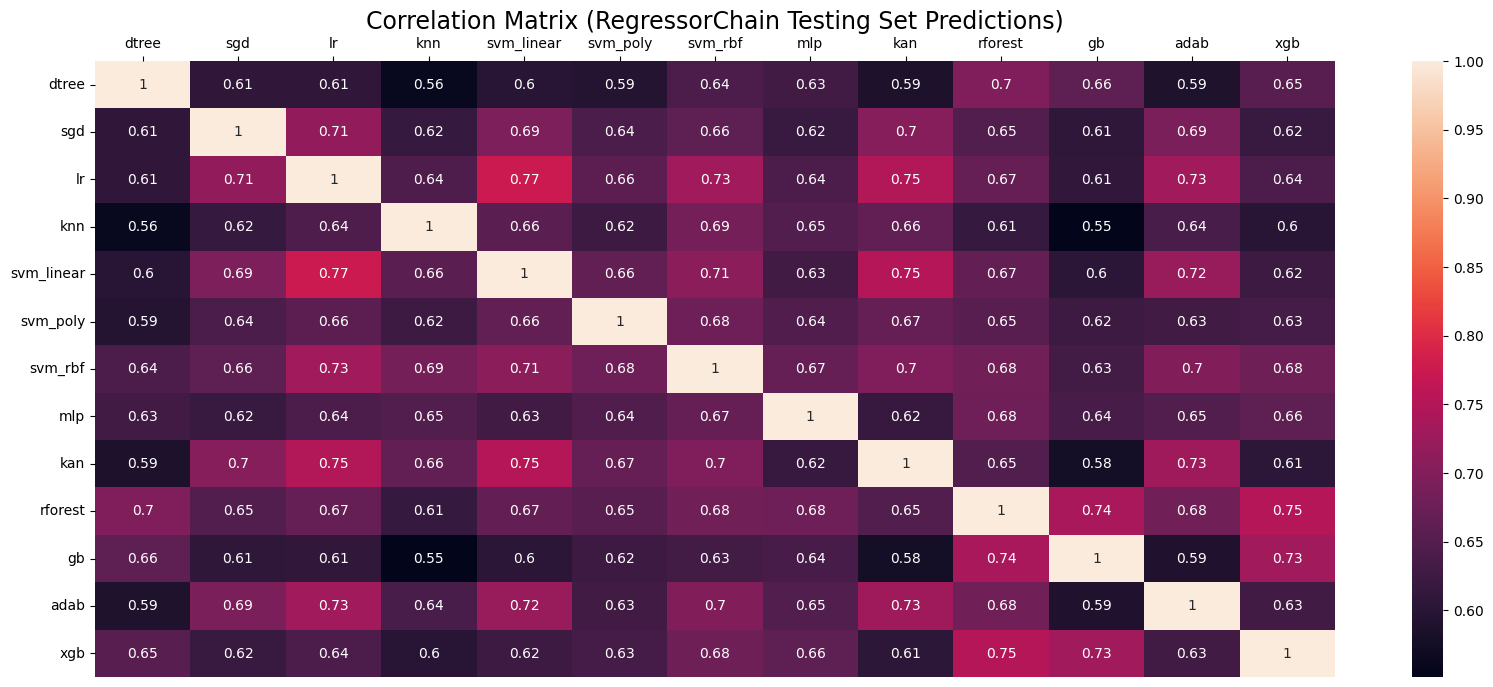

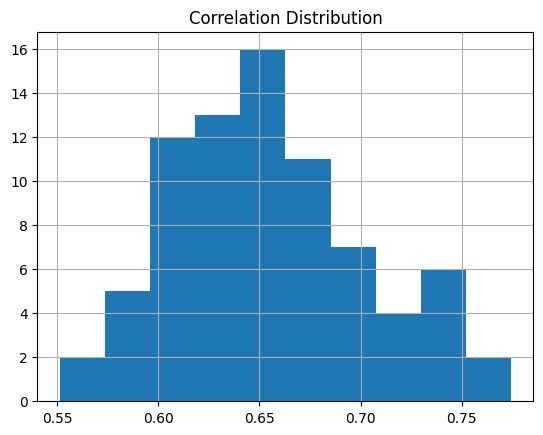

Testing correlation distribution:
count    78.000000
mean      0.654438
std       0.047952
min       0.551444
25%       0.620153
50%       0.646881
75%       0.681041
max       0.774244
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0191
NMSE: 0.1170
MAE: 0.7179
NMAE: 1.0418
aRRMSE: 0.8237
aCC: 0.8960


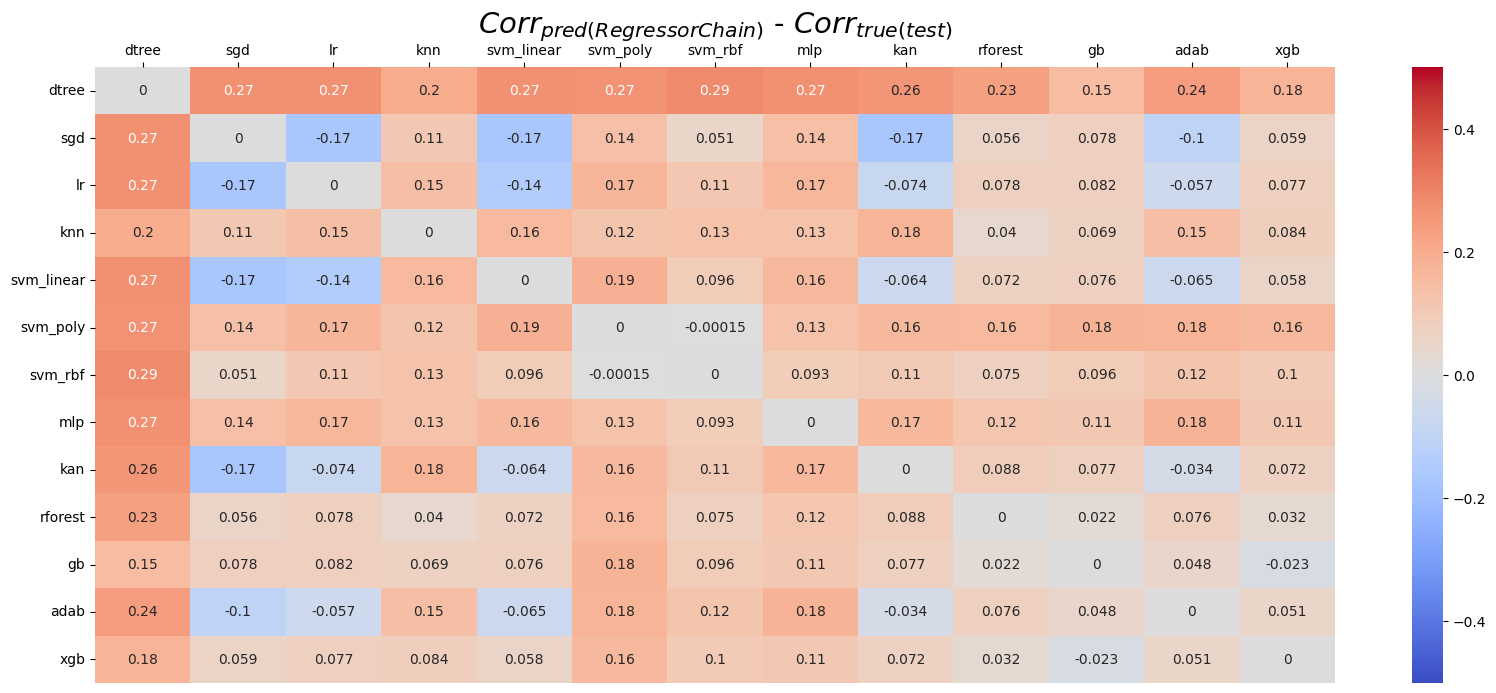

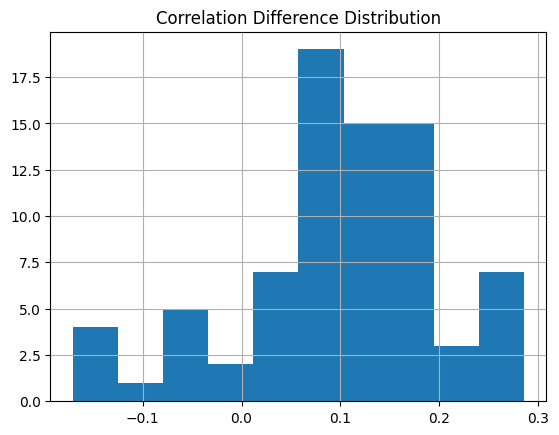

In [14]:
#regchain_corrls = pd.DataFrame(regchain.predict(Xa_train), 
#                               index=Xa_train.index,
#                               columns=model_names).corr('kendall') 

results = correlation_pred_performance(regchain, Xa_test, ya_test, Xa_train, 
                                       min_score=MIN_SCORE, name="RegressorChain",
                                       show_plot=True, save_plot=None)

In [15]:
diff_metrics.loc['RC',:] = results['results']
diff_metrics.loc['RC',:]

MSE       0.019082
MAE        0.11699
NMSE      0.717927
NMAE      1.041777
aRRMSE    0.823725
aCC       0.895958
Name: RC, dtype: object

In [16]:
groups['regchain_assessor'] = results['groups']
groups['regchain_assessor']['test']

[['dtree', 'rforest', 'xgb', 'gb'],
 ['svm_rbf', 'xgb', 'rforest', 'mlp'],
 ['svm_linear', 'svm_rbf', 'lr', 'adab', 'rforest'],
 ['svm_linear', 'svm_poly', 'svm_rbf', 'lr', 'rforest'],
 ['knn', 'svm_linear', 'svm_rbf', 'kan'],
 ['svm_linear', 'kan', 'sgd', 'svm_rbf', 'lr', 'adab'],
 ['svm_linear', 'svm_poly', 'kan', 'svm_rbf', 'lr']]

In [17]:
regchain=None

### Ensemble of Regressor Chains

In [12]:
num_chains = 50
rc_ac = f'RC[{num_chains}]'

rc_ests = [RegressorChain(base_estimator=RandomForestRegressor(random_state=seed),
                          random_state=seed+i,
                          order='random', cv=5) for i in range(num_chains)]

rc_plus = GroupedAssessor(rc_ests).fit(Xa_train, ya_train)

In [ ]:
# keeping the concat because multiple numbers of chains could be recorded
if(rc_ac in metrics_df.index):
    metrics_df.loc[rc_ac,:] = assr_performance(regchain, Xa_test, ya_test, Xa_train, ya_train)
else:
    new_df = pd.DataFrame(assr_performance(rc_plus, Xa_test, ya_test, Xa_train, ya_train), 
                          columns=metrics_cols,
                          index=multIdx(rc_ac, subindex=model_names))

    metrics_df = pd.concat([metrics_df, new_df])
metrics_df.loc[rc_ac,:]

#### Análise das correlações

Melhorar esse cálculo de correlação para fazer melhor uso do 1-(probabilidade da classe correta)

In [ ]:
#regchain_corrls = pd.DataFrame(regchain.predict(Xa_train), 
#                               index=Xa_train.index,
#                               columns=model_names).corr('kendall') 
#50chains
results = correlation_pred_performance(rc_plus, Xa_test, ya_test, Xa_train, 
                                       min_score=MIN_SCORE, name=f"RegressorChain({num_chains})",
                                       show_plot=True, save_plot=None)

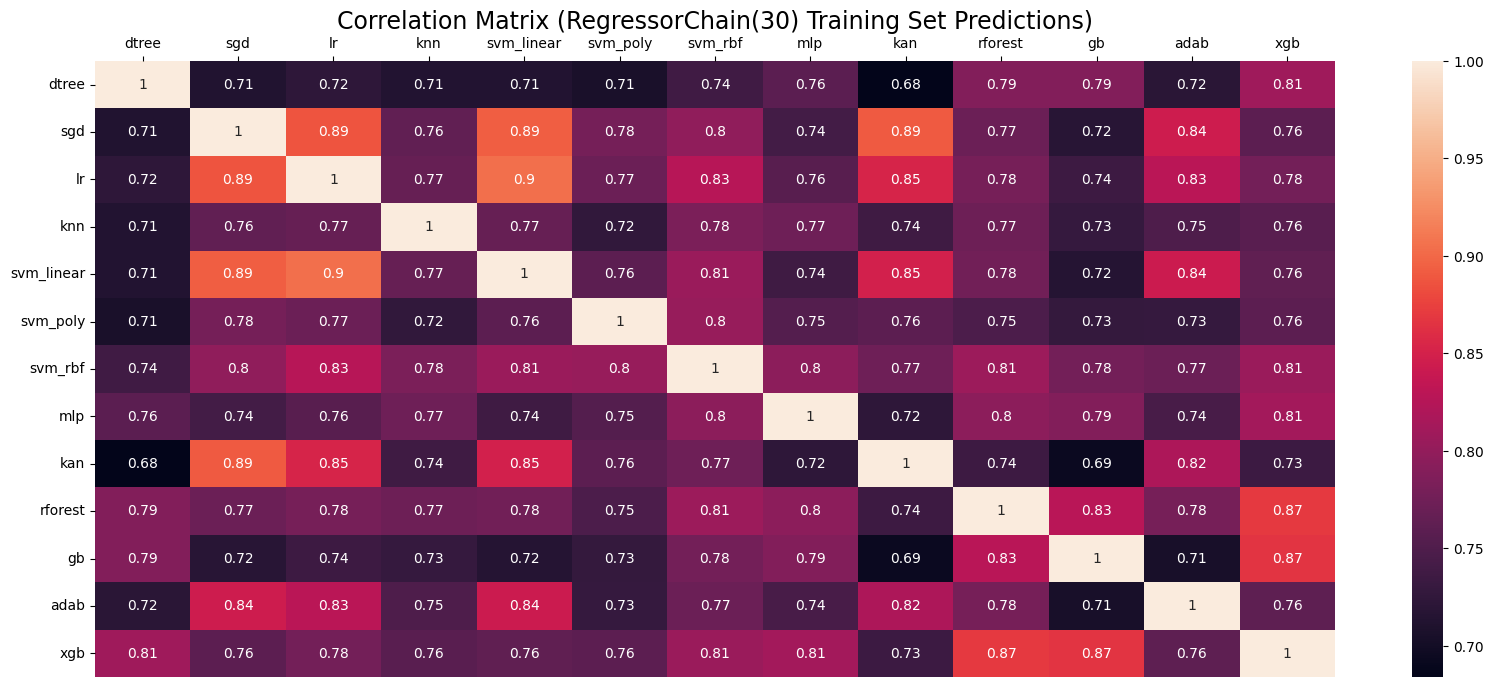

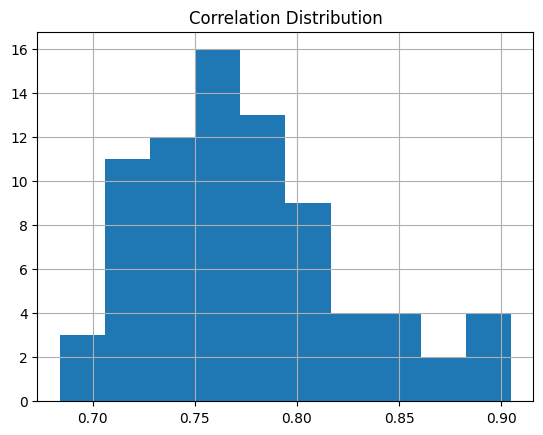

Training correlation distribution:
count    78.000000
mean      0.774477
std       0.049639
min       0.684065
25%       0.736097
50%       0.769327
75%       0.801748
max       0.904708
Name: corr, dtype: float64


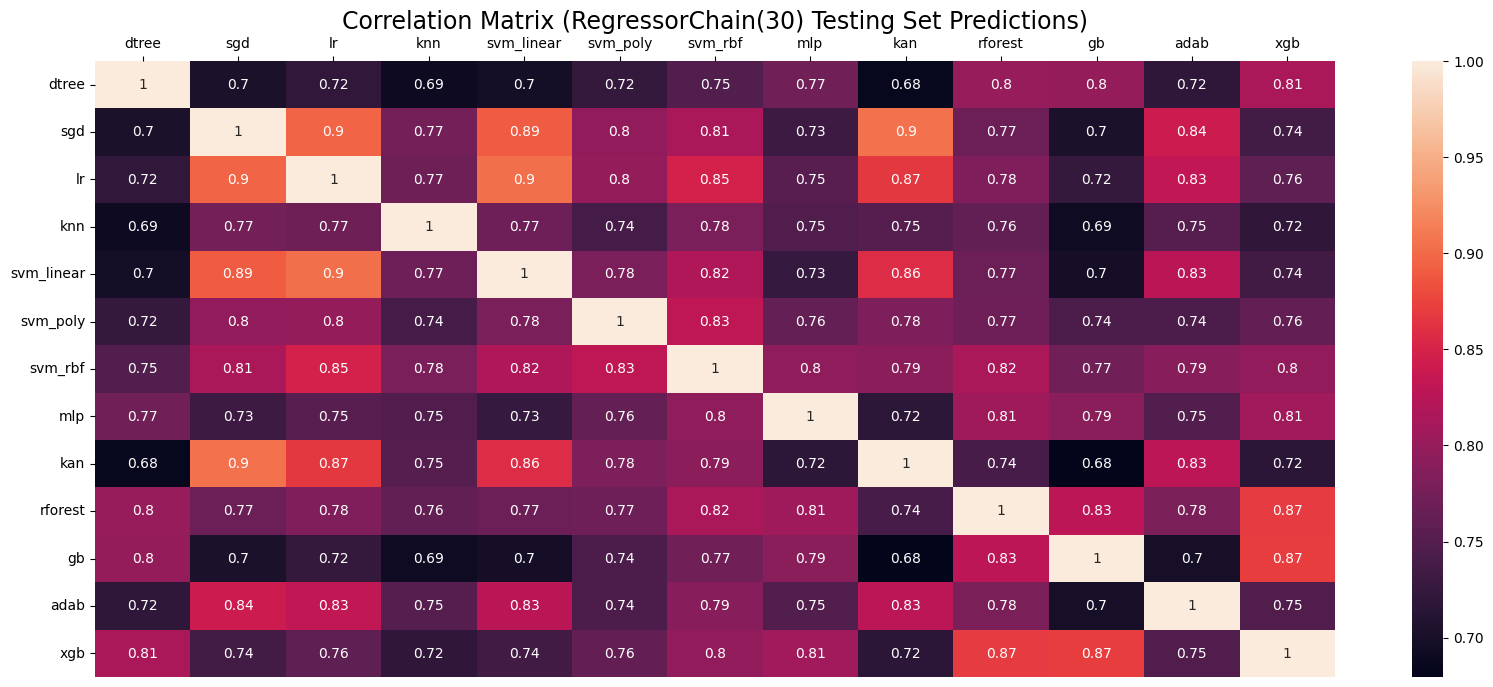

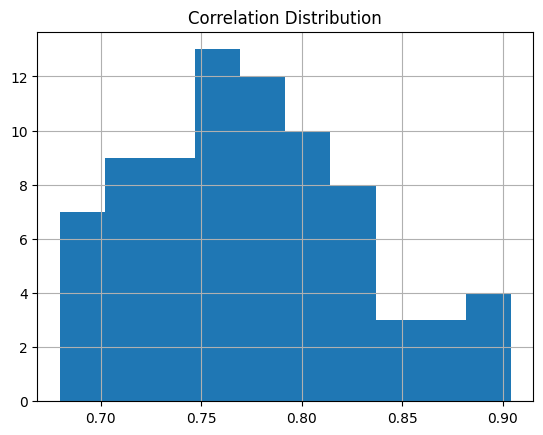

Testing correlation distribution:
count    78.000000
mean      0.775198
std       0.054555
min       0.679566
25%       0.737114
50%       0.770744
75%       0.807591
max       0.904131
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0535
NMSE: 0.2035
MAE: 2.1505
NMAE: 1.8917
aRRMSE: 1.4273
aCC: 0.9294


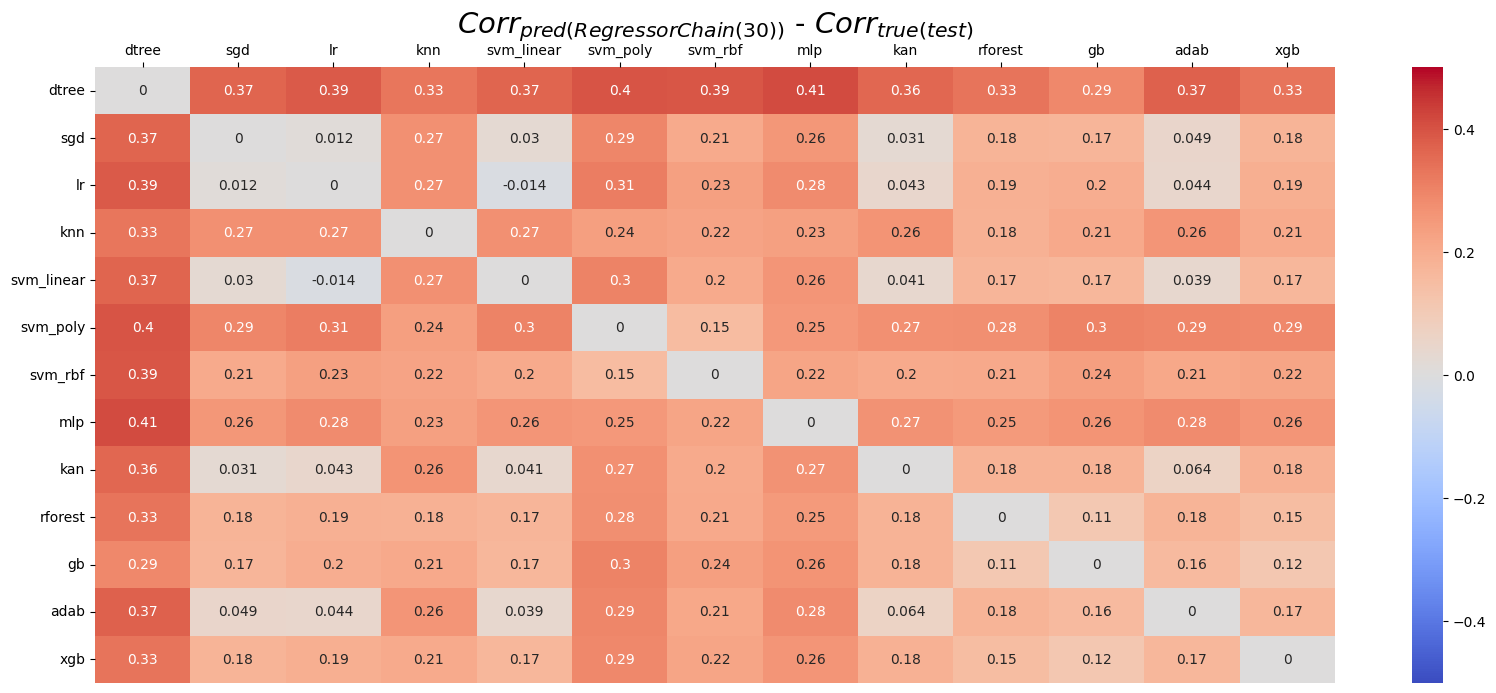

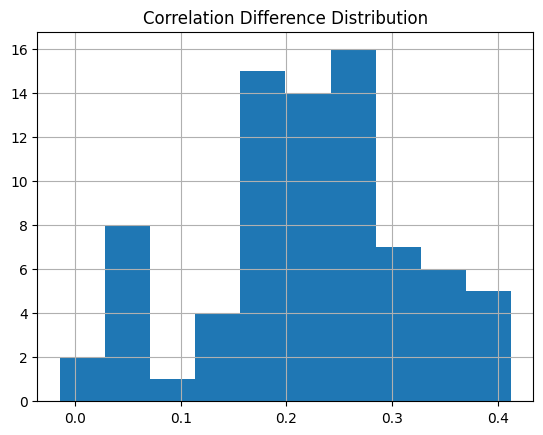

In [35]:
#regchain_corrls = pd.DataFrame(regchain.predict(Xa_train), 
#                               index=Xa_train.index,
#                               columns=model_names).corr('kendall') 
#30chains
results = correlation_pred_performance(rc_plus, Xa_test, ya_test, Xa_train, 
                                       min_score=MIN_SCORE, name=f"RegressorChain({num_chains})",
                                       show_plot=True, save_plot=None)

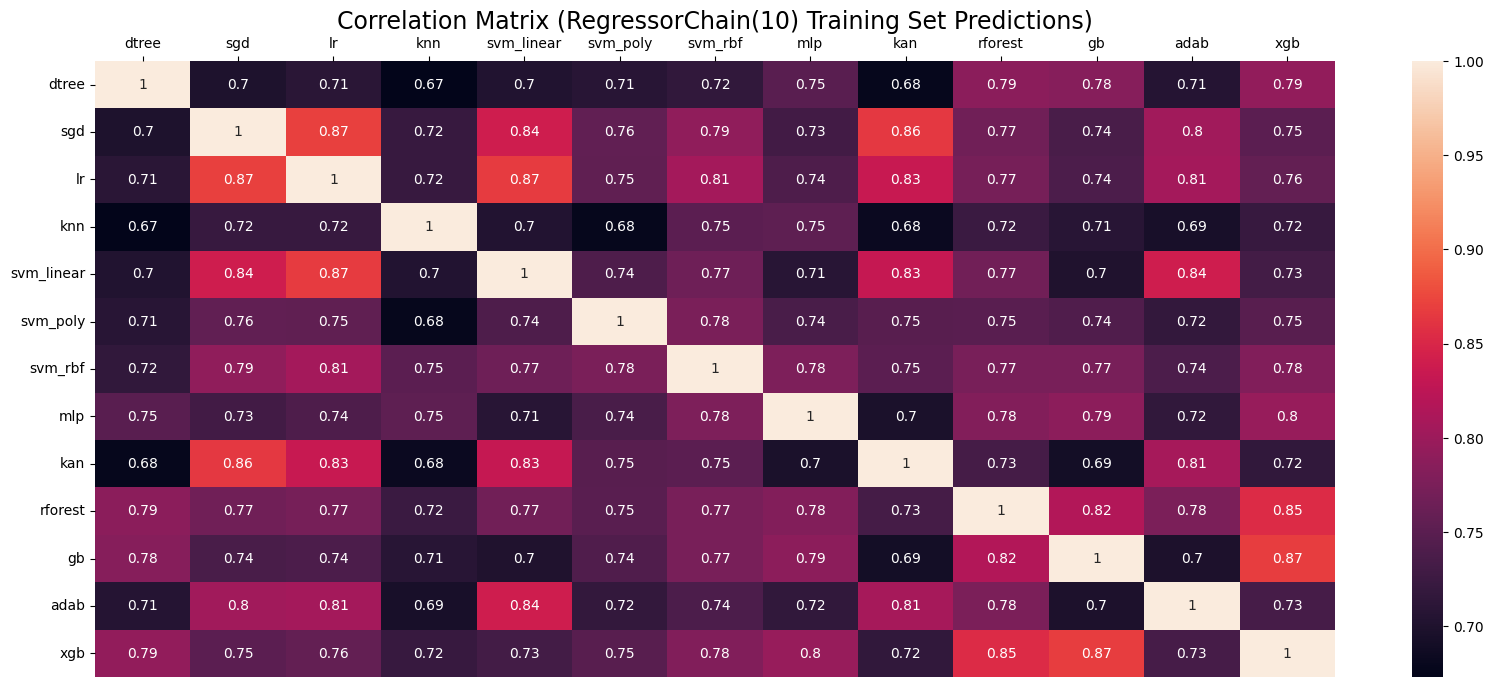

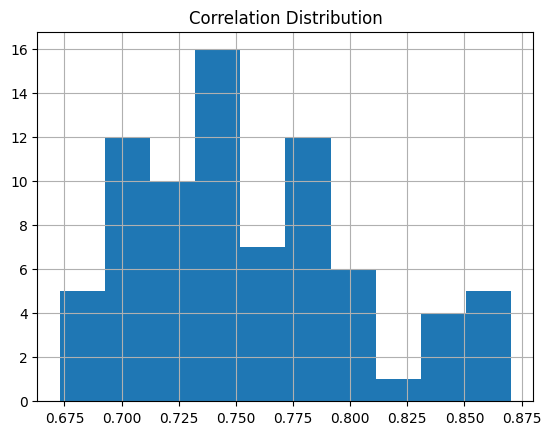

Training correlation distribution:
count    78.000000
mean      0.755207
std       0.049403
min       0.673082
25%       0.716252
50%       0.749234
75%       0.782781
max       0.870356
Name: corr, dtype: float64


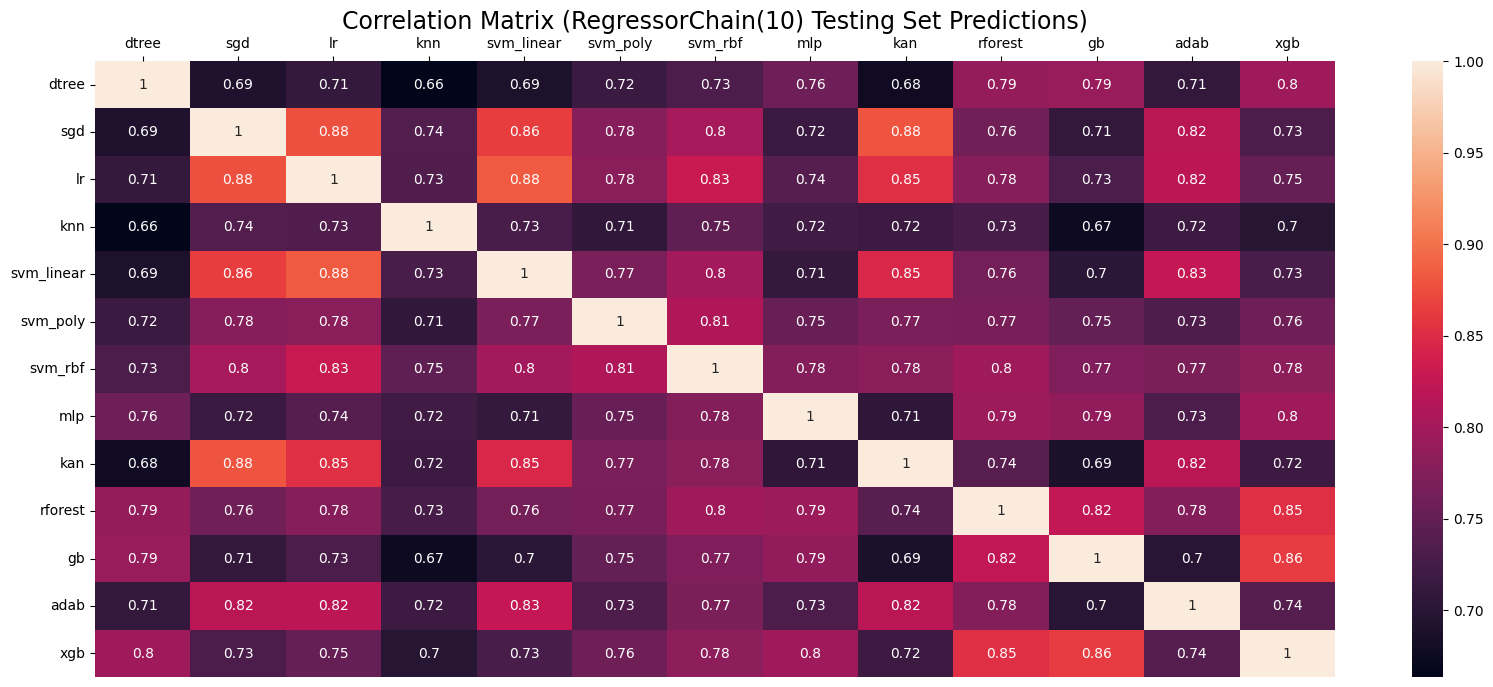

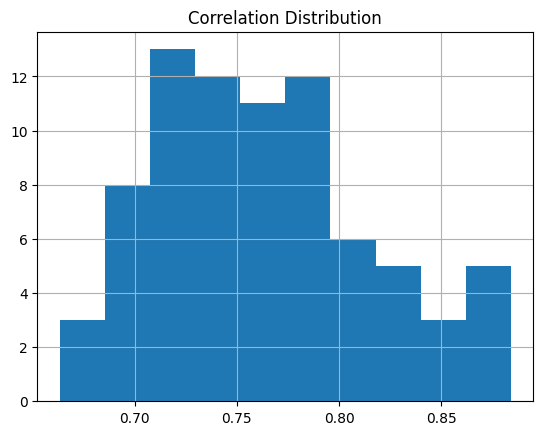

Testing correlation distribution:
count    78.000000
mean      0.761787
std       0.052842
min       0.663506
25%       0.718757
50%       0.758430
75%       0.794852
max       0.883932
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0482
NMSE: 0.1917
MAE: 1.9324
NMAE: 1.7794
aRRMSE: 1.3530
aCC: 0.9329


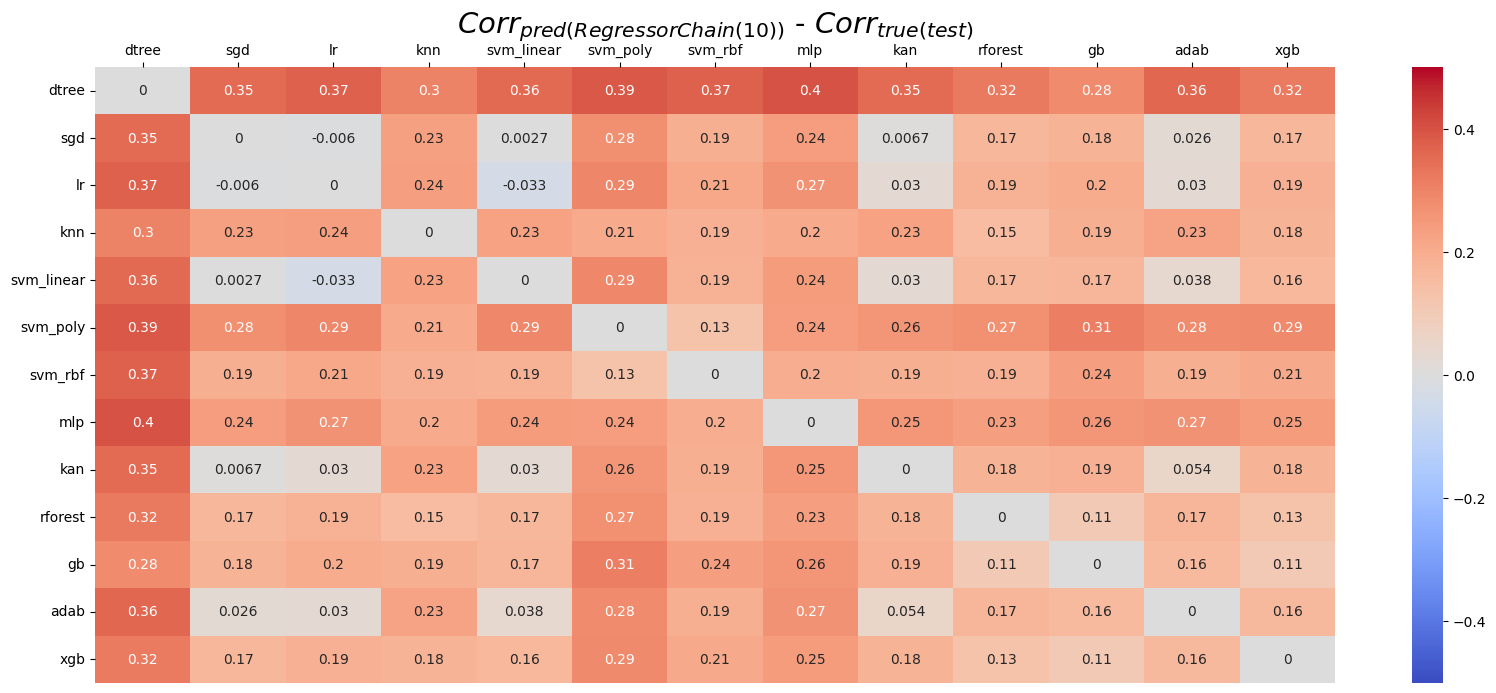

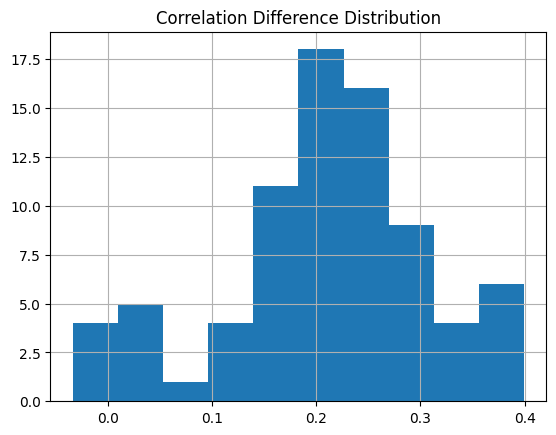

In [ ]:
#regchain_corrls = pd.DataFrame(regchain.predict(Xa_train), 
#                               index=Xa_train.index,
#                               columns=model_names).corr('kendall') 
#10chains
results = correlation_pred_performance(rc_plus, Xa_test, ya_test, Xa_train, 
                                       min_score=MIN_SCORE, name=f"RegressorChain({num_chains})",
                                       show_plot=True, save_plot=None)

In [36]:
diff_metrics.loc[rc_ac,:] = results['results']
diff_metrics.loc[rc_ac,:]

MSE       0.053483
MAE       0.203498
NMSE      2.150462
NMAE      1.891707
aRRMSE    1.427296
aCC       0.929404
Name: RC[30], dtype: object

In [37]:
groups[f'regchain{num_chains}_assessor'] = results['groups']
groups[f'regchain{num_chains}_assessor']['test']

[['svm_linear',
  'svm_poly',
  'kan',
  'dtree',
  'gb',
  'mlp',
  'knn',
  'sgd',
  'svm_rbf',
  'lr',
  'adab',
  'rforest',
  'xgb']]

In [ ]:
rc_plus = None

### Multi-Output Random Forest Regressor 

In [19]:
mrf = RandomForestRegressor(random_state=seed).fit(Xa_train, ya_train)

In [20]:
metrics_df.loc['MRT',:] = assr_performance(mrf, Xa_test, ya_test, Xa_train, ya_train)

[TRAINING SET]
MSE: 0.0103
NMSE: 0.0998
MAE: 0.0670
NMAE: 0.2609
aRRMSE: 0.3143
aCC: 0.9667

[TESTING SET]
MSE: 0.0775
NMSE: 0.7410
MAE: 0.1885
NMAE: 0.7196
aRRMSE: 0.8577
aCC: 0.5131


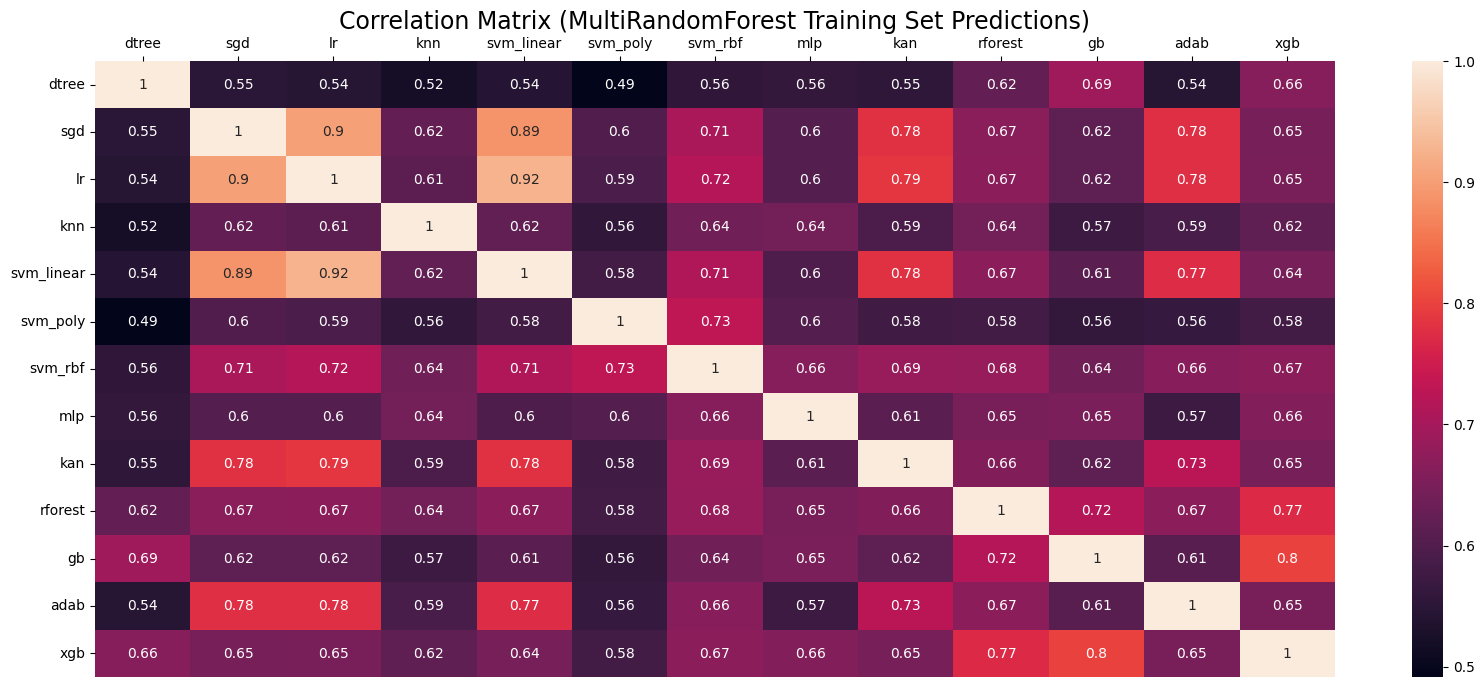

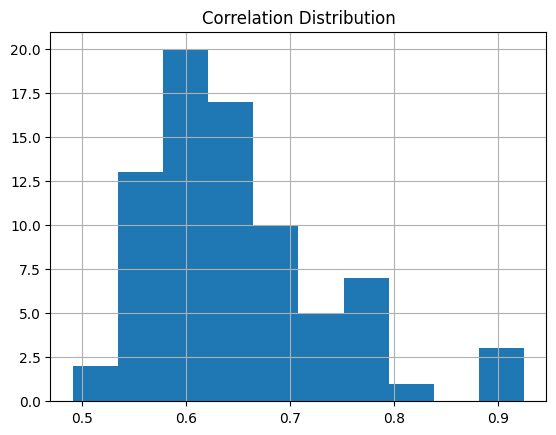

Training correlation distribution:
count    78.000000
mean      0.649394
std       0.086184
min       0.491501
25%       0.592814
50%       0.639770
75%       0.680961
max       0.924809
Name: corr, dtype: float64


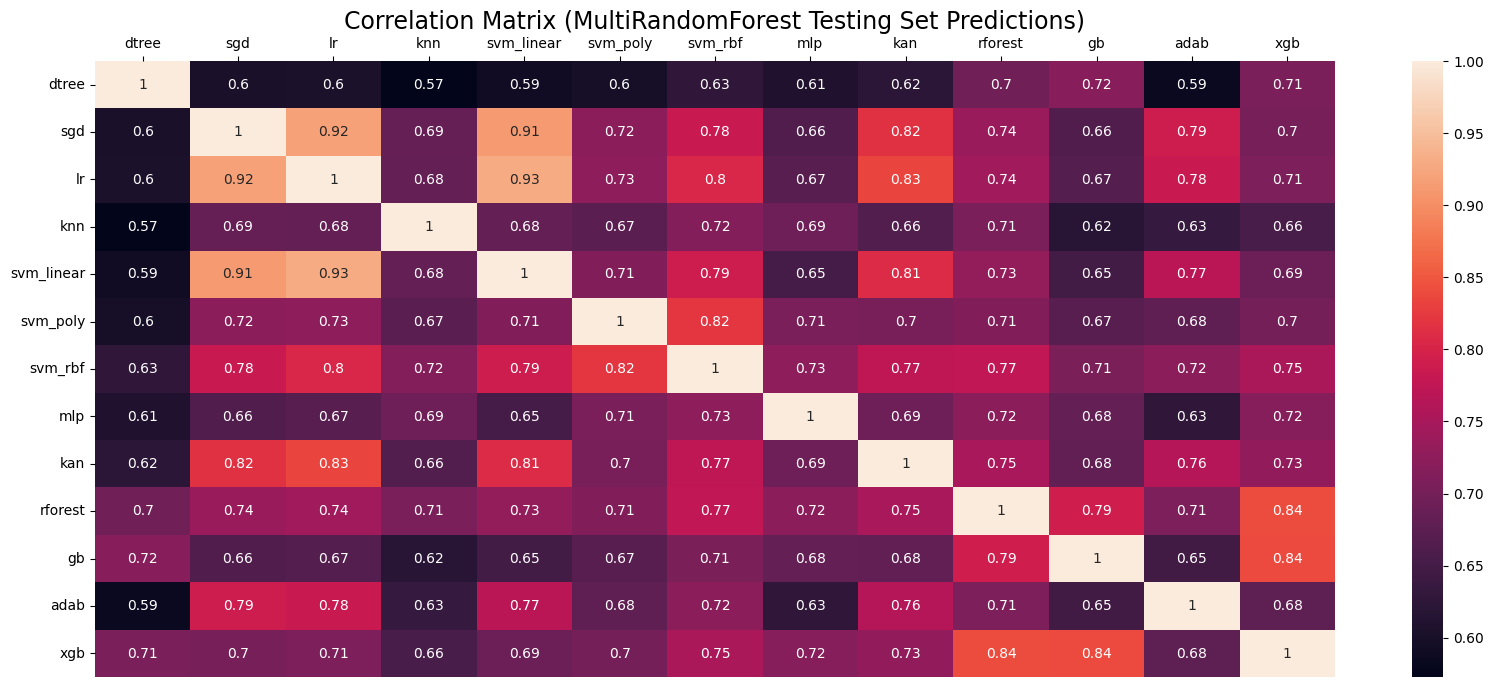

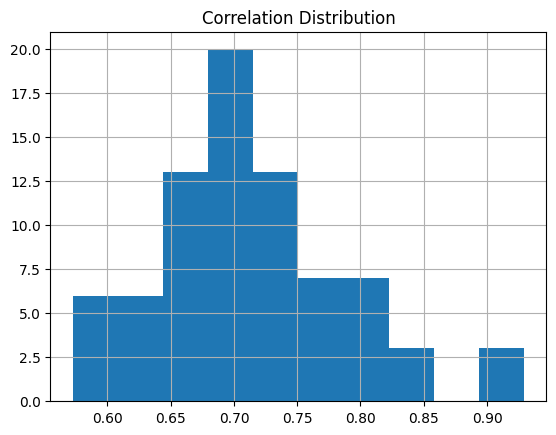

Testing correlation distribution:
count    78.000000
mean      0.713229
std       0.075439
min       0.572807
25%       0.667190
50%       0.705275
75%       0.751300
max       0.929167
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0288
NMSE: 0.1528
MAE: 1.2063
NMAE: 1.4591
aRRMSE: 1.0786
aCC: 0.9710


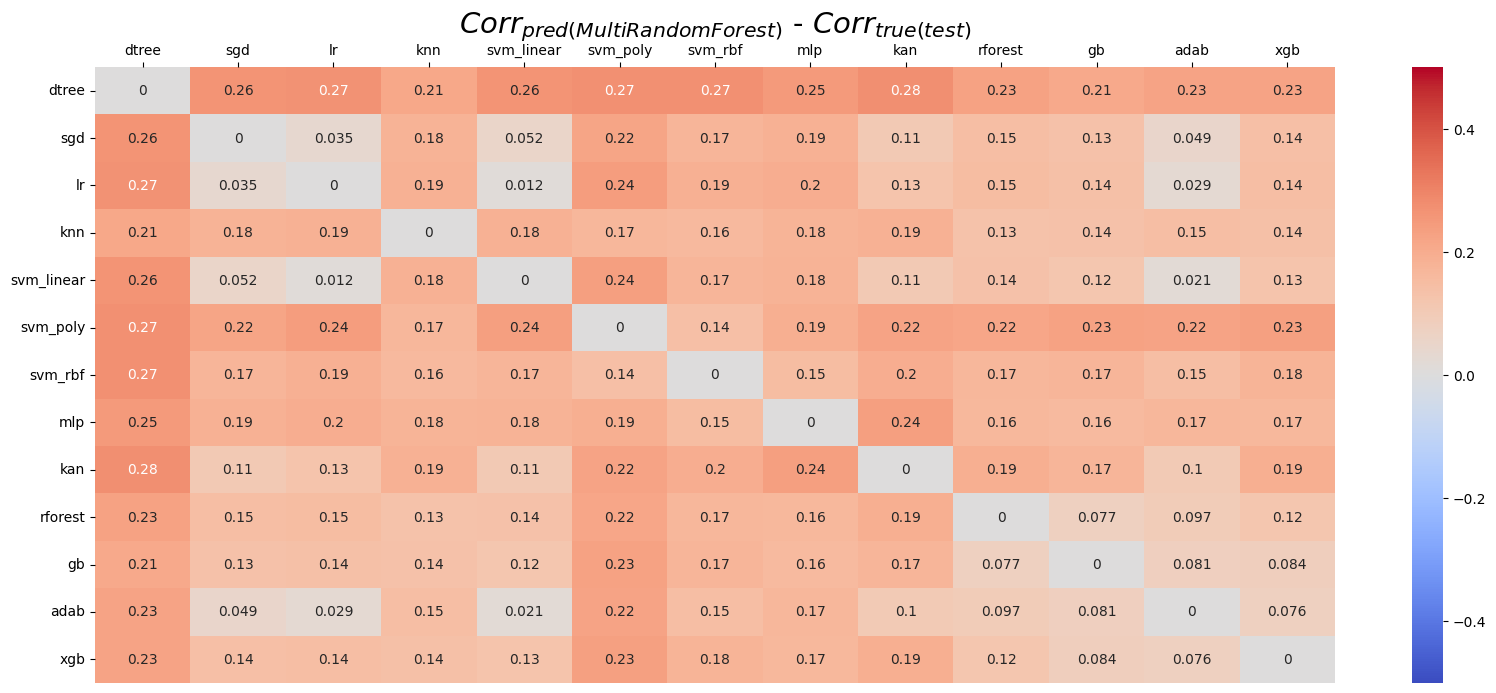

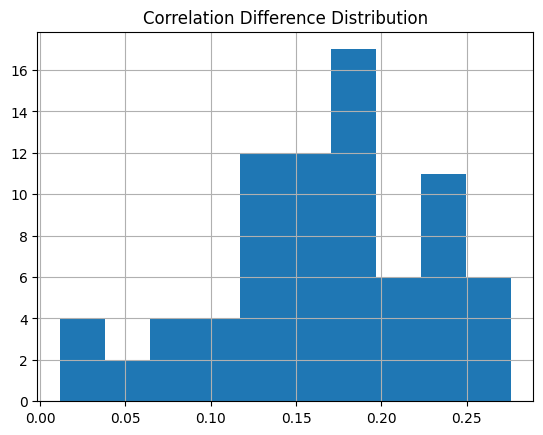

In [21]:
results = correlation_pred_performance(mrf, Xa_test, ya_test, Xa_train, 
                                       MIN_SCORE, name="MultiRandomForest")

In [22]:
diff_metrics.loc['MRT',:] = results['results']
diff_metrics.loc['MRT',:]

MSE       0.028811
MAE       0.152754
NMSE      1.206294
NMAE      1.459116
aRRMSE    1.078645
aCC       0.970998
Name: MRT, dtype: object

In [23]:
groups['mrf_assessor'] = results['groups']
groups['mrf_assessor']['test']

[['lr',
  'rforest',
  'svm_rbf',
  'svm_linear',
  'xgb',
  'kan',
  'svm_poly',
  'knn',
  'sgd'],
 ['lr',
  'rforest',
  'svm_rbf',
  'svm_linear',
  'xgb',
  'kan',
  'adab',
  'svm_poly',
  'sgd'],
 ['mlp', 'lr', 'rforest', 'svm_rbf', 'xgb', 'kan', 'svm_poly', 'gb', 'sgd'],
 ['mlp', 'lr', 'rforest', 'svm_rbf', 'xgb', 'kan', 'svm_poly', 'knn', 'sgd'],
 ['xgb', 'rforest', 'dtree', 'gb']]

### Multi-Output SVR

In [24]:
#msvr = MSVR()
#msvr.fit(np.asarray(Xa_train_norm), np.asarray(ya_train))
#msvr_params = product(svm_rbf_params)
#g_search = GridSearchCV(MSVR(), svm_rbf_params, scoring='neg_mean_squared_error', n_jobs=-1).fit(np.asarray(Xa_train_norm), np.asarray(ya_train))
#print(g_search.best_params_)
#msvr = g_search.best_estimator_

In [25]:
#study_norm = OptunaStudy(Xa_train_norm, ya_train.values, 200)
#study_norm.search(MSVR)

In [26]:
msvr = MSVR().fit(Xa_train_norm, ya_train.values)

In [27]:
metrics_df.loc['M-SVR',:] = assr_performance(msvr, Xa_test_norm, ya_test, Xa_train_norm, ya_train)

[TRAINING SET]
MSE: 0.0638
NMSE: 0.6471
MAE: 0.1816
NMAE: 0.7493
aRRMSE: 0.8012
aCC: 0.5936

[TESTING SET]
MSE: 0.0738
NMSE: 0.7293
MAE: 0.1958
NMAE: 0.7884
aRRMSE: 0.8510
aCC: 0.5121


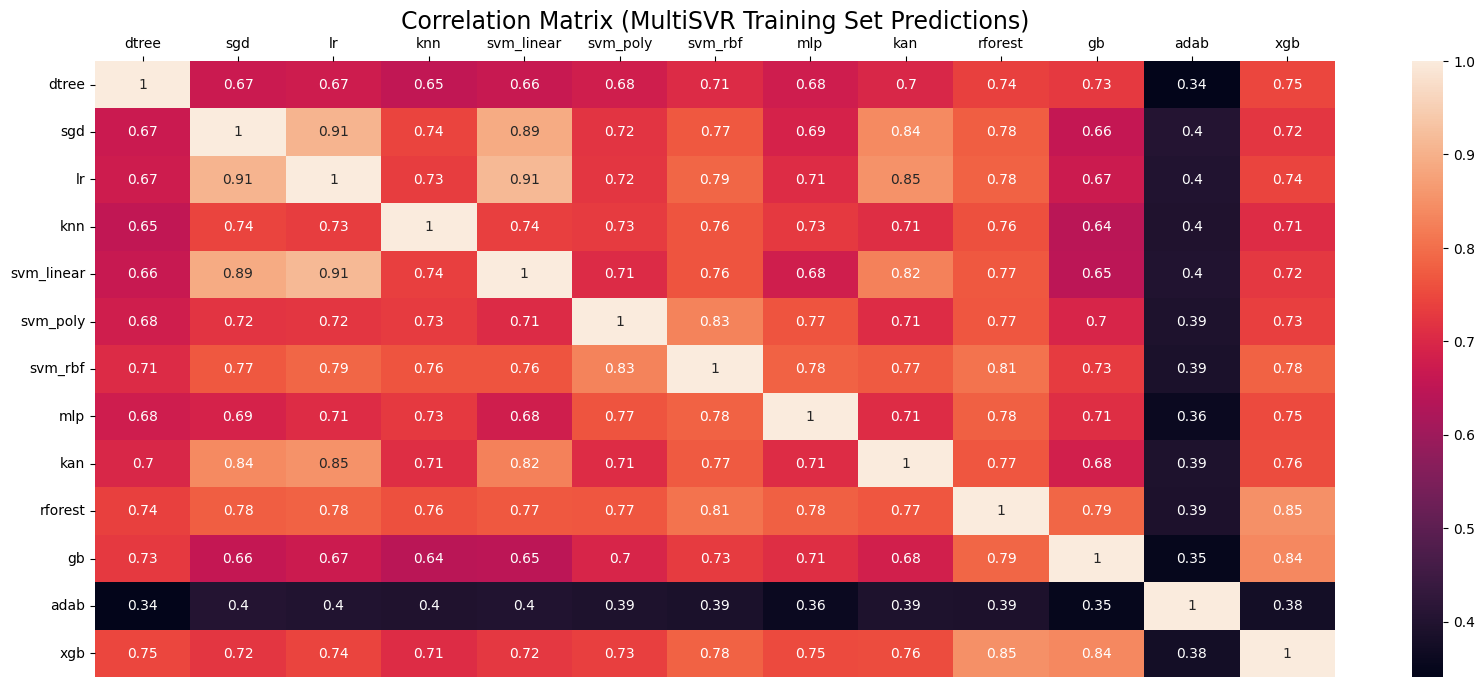

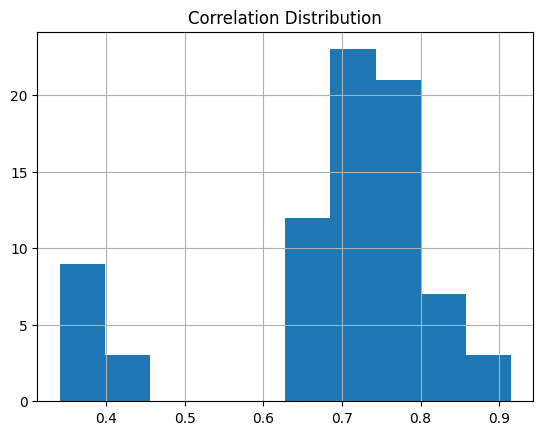

Training correlation distribution:
count    78.000000
mean      0.689237
std       0.143246
min       0.340751
25%       0.675307
50%       0.725917
75%       0.768832
max       0.914916
Name: corr, dtype: float64


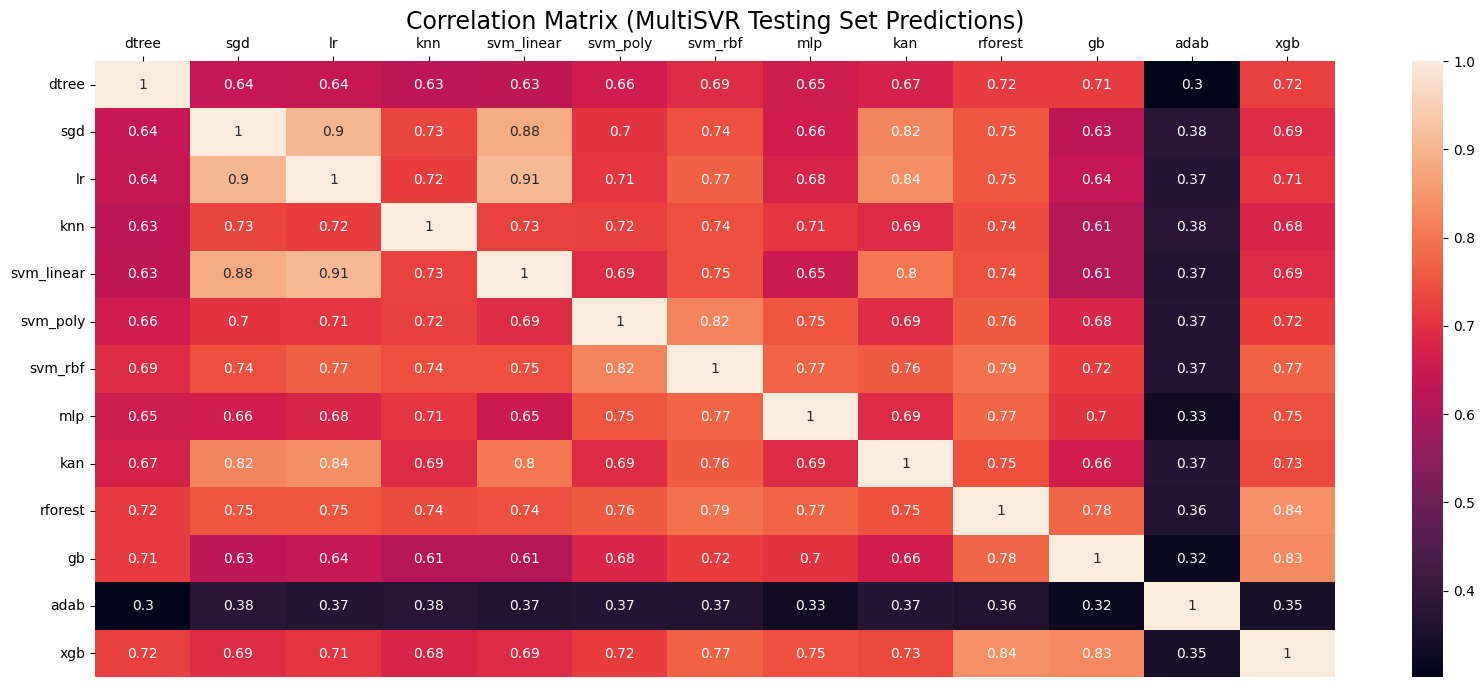

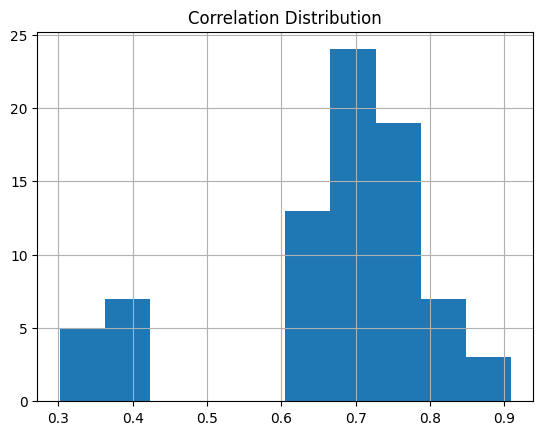

Testing correlation distribution:
count    78.000000
mean      0.668570
std       0.148023
min       0.301995
25%       0.644207
50%       0.706341
75%       0.751336
max       0.908680
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0398
NMSE: 0.1767
MAE: 1.6421
NMAE: 1.6685
aRRMSE: 1.2675
aCC: 0.6332


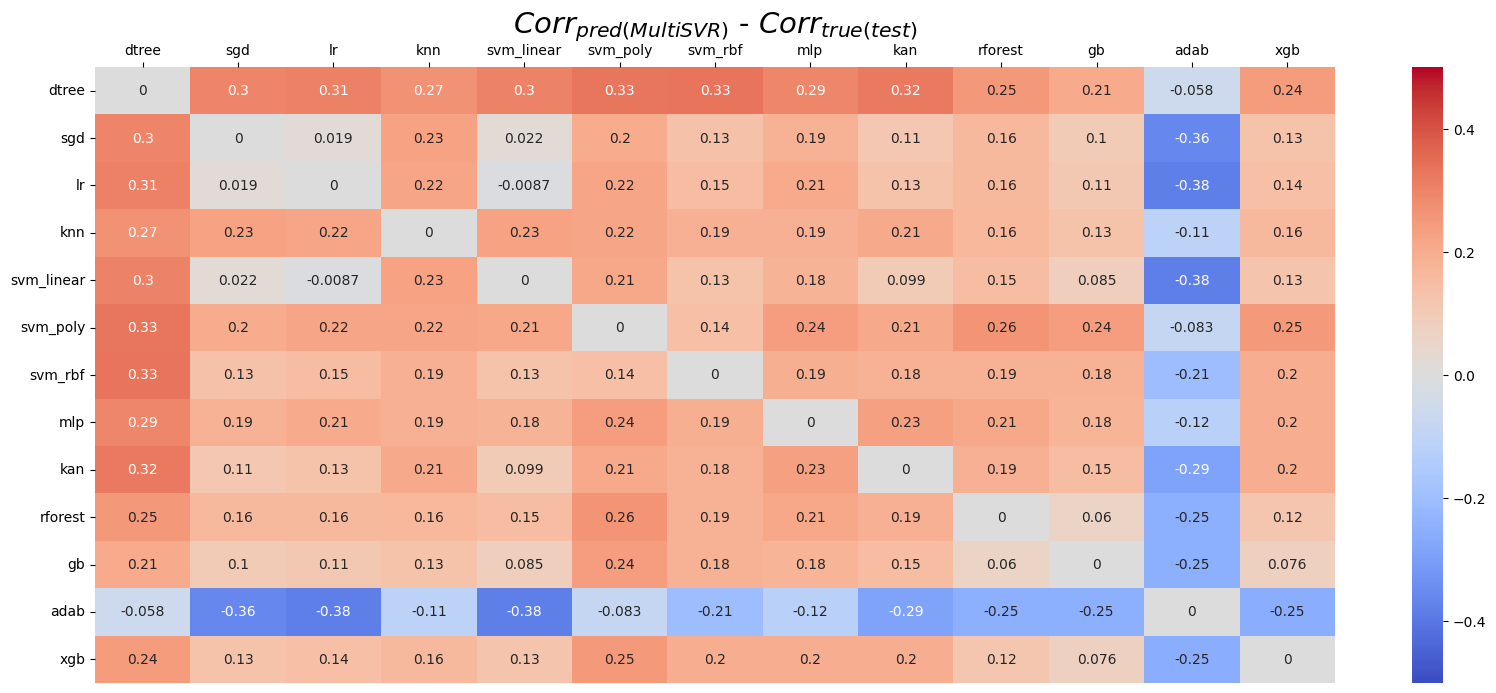

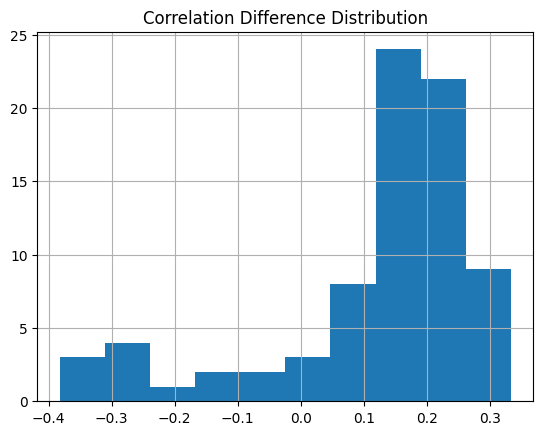

In [28]:
results = correlation_pred_performance(msvr, 
                                       pd.DataFrame(Xa_test_norm, index=Xa_test.index), 
                                       ya_test,
                                       pd.DataFrame(Xa_train_norm, index=Xa_train.index), 
                                       MIN_SCORE, name="MultiSVR")

In [29]:
diff_metrics.loc['M-SVR',:] = results['results']
diff_metrics.loc['M-SVR',:]

MSE       0.039805
MAE       0.176721
NMSE      1.642144
NMAE      1.668478
aRRMSE    1.267542
aCC       0.633198
Name: M-SVR, dtype: object

In [30]:
groups['msvr_assessor'] = results['groups']
groups['msvr_assessor']['test']

[['mlp',
  'lr',
  'rforest',
  'svm_rbf',
  'svm_linear',
  'xgb',
  'kan',
  'svm_poly',
  'knn',
  'sgd'],
 ['mlp', 'rforest', 'svm_rbf', 'xgb', 'kan', 'dtree', 'svm_poly', 'gb'],
 ['adab']]

### Multi-Output Regressor 
(ST)

In [31]:
#mtr_params = getAssrParams(RandomForestRegressor, parameters, seed, False, 'estimator')
#
##mor = MultiOutputRegressor(RandomForestRegressor(random_state=seed), n_jobs=-1).fit(Xa_train, ya_train)
#g_search = GridSearchCV(MultiOutputRegressor(RandomForestRegressor()), mtr_params, n_jobs=-1, verbose=True, scoring="neg_mean_absolute_error").fit(Xa_train, ya_train)
#print(g_search.best_params_)
#mor = g_search.best_estimator_

In [32]:
#study = OptunaStudy(Xa_train, ya_train, 100)
#study.search(MultiOutputRegressor)

In [33]:
single_tgt = MultiOutputRegressor(RandomForestRegressor(random_state=seed), 
                                  n_jobs=-1).fit(Xa_train, ya_train)

c:\Users\pedro\pyenvs\mainpy\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [34]:
metrics_df.loc['ST',:] = assr_performance(single_tgt, Xa_test, ya_test, Xa_train, ya_train)

[TRAINING SET]
MSE: 0.0103
NMSE: 0.0974
MAE: 0.0665
NMAE: 0.2519
aRRMSE: 0.3098
aCC: 0.9667

[TESTING SET]
MSE: 0.0772
NMSE: 0.7187
MAE: 0.1870
NMAE: 0.6949
aRRMSE: 0.8408
aCC: 0.5281


#### Análise das correlações

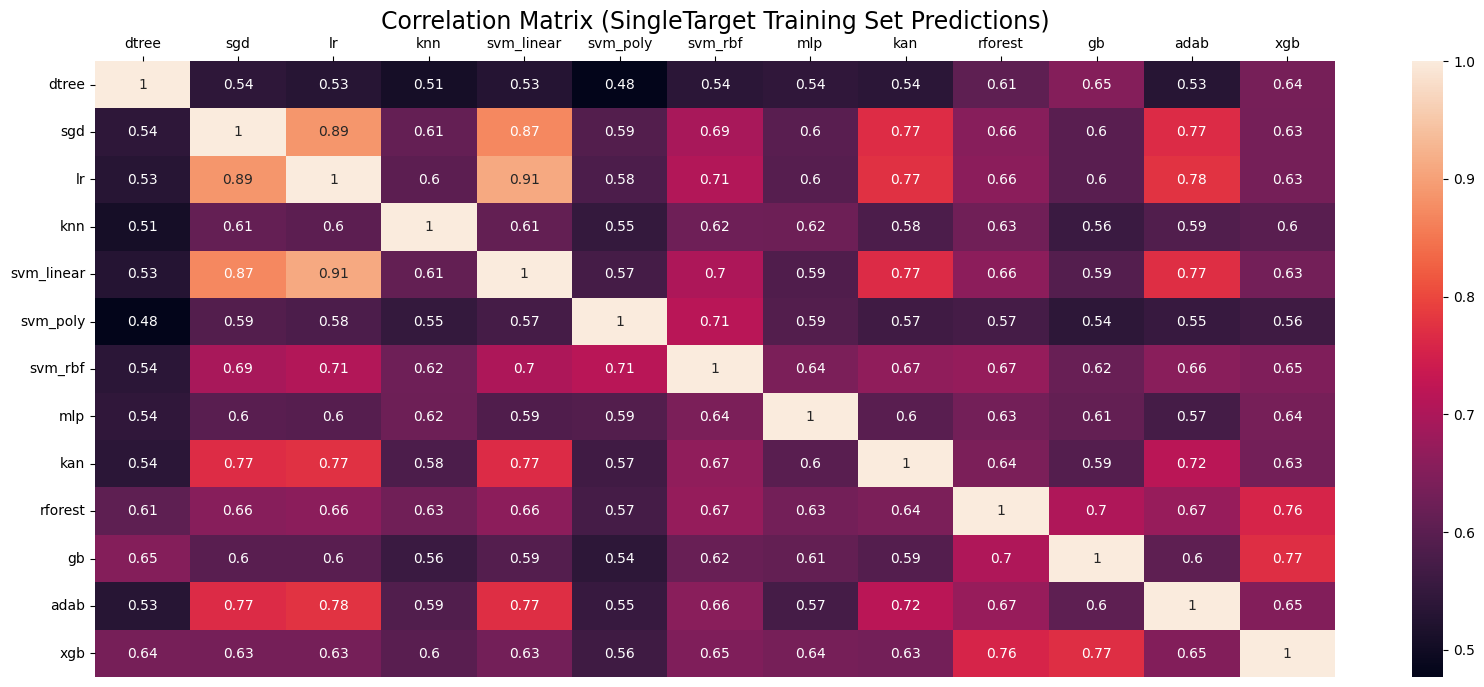

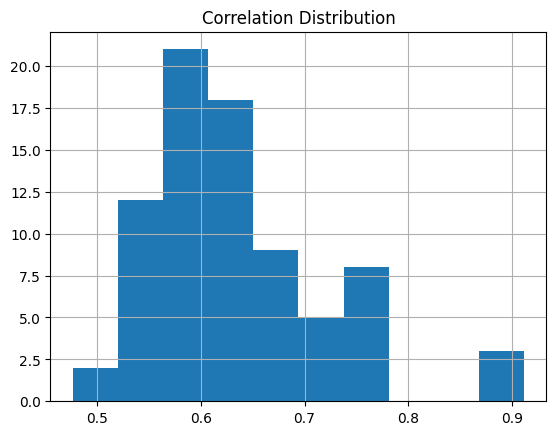

Training correlation distribution:
count    78.000000
mean      0.635484
std       0.085871
min       0.476872
25%       0.583891
50%       0.619807
75%       0.665084
max       0.911447
Name: corr, dtype: float64


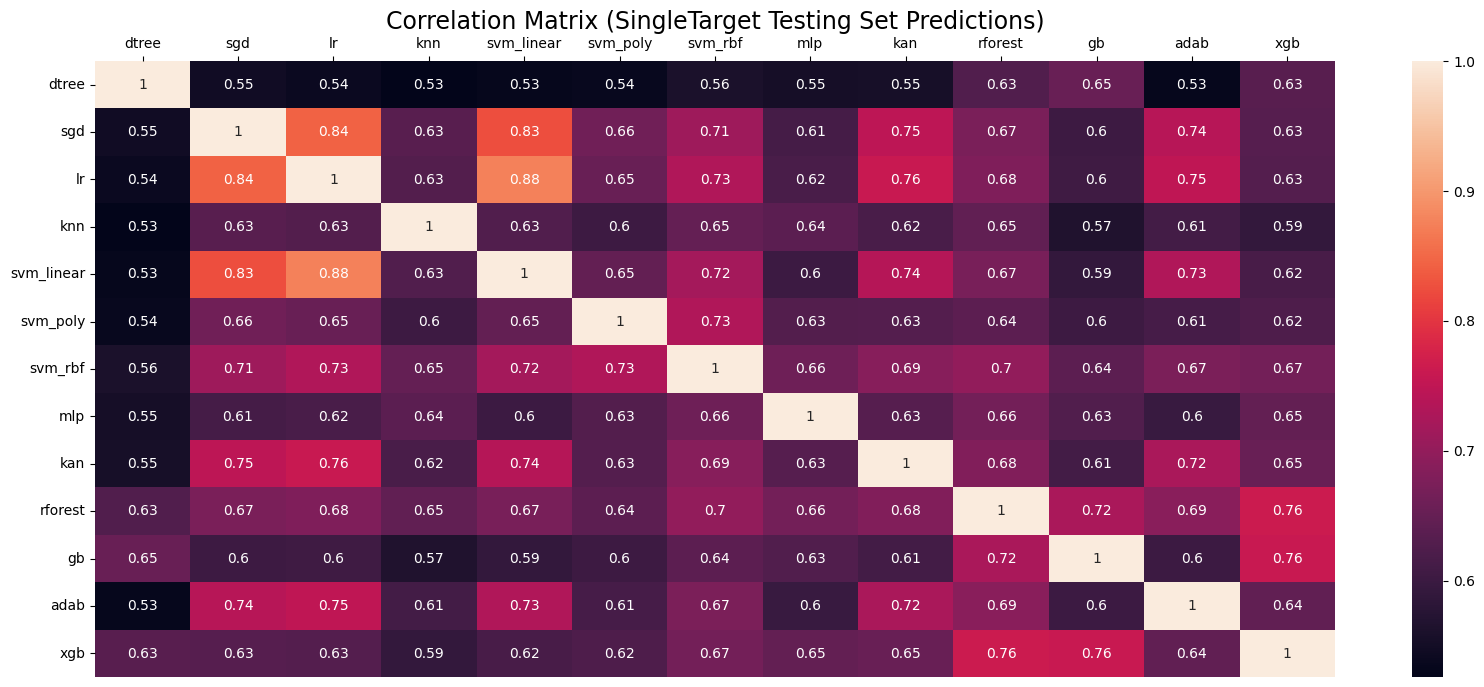

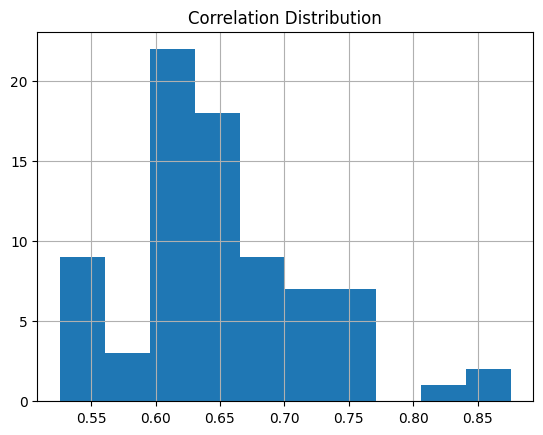

Testing correlation distribution:
count    78.000000
mean      0.650928
std       0.071344
min       0.525744
25%       0.609647
50%       0.638821
75%       0.685344
max       0.875718
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0132
NMSE: 0.0986
MAE: 0.5400
NMAE: 0.9387
aRRMSE: 0.7191
aCC: 0.9754


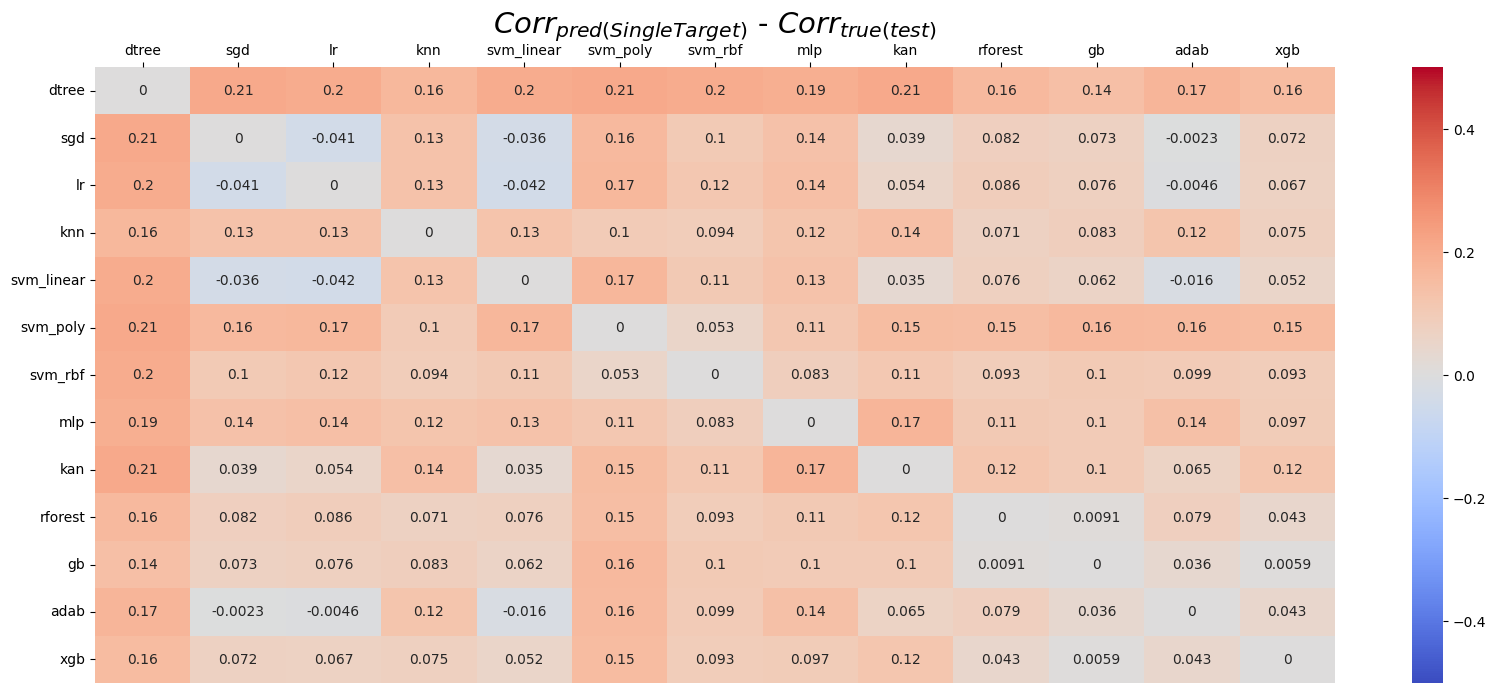

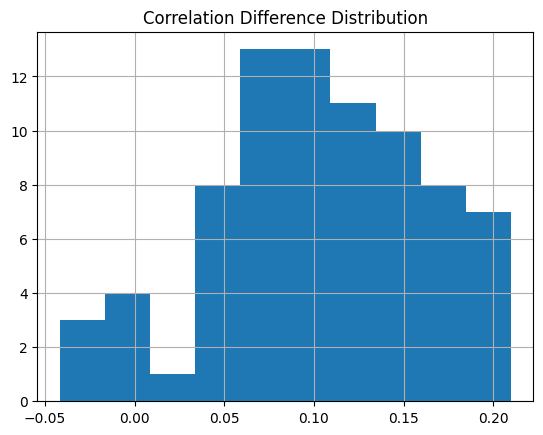

In [35]:
results = correlation_pred_performance(single_tgt, Xa_test, ya_test, Xa_train,
                                       MIN_SCORE, name="SingleTarget")

In [36]:
diff_metrics.loc['ST',:] = results['results']
diff_metrics.loc['ST',:]

MSE        0.01319
MAE       0.098584
NMSE      0.539985
NMAE      0.938679
aRRMSE    0.719079
aCC       0.975422
Name: ST, dtype: object

In [37]:
groups['st_assessor'] = results['groups']
groups['st_assessor']['test']

[['knn'],
 ['gb', 'rforest', 'xgb'],
 ['mlp', 'rforest', 'svm_rbf'],
 ['lr', 'rforest', 'svm_rbf', 'svm_linear', 'kan', 'adab', 'sgd'],
 ['xgb', 'rforest', 'kan', 'svm_rbf'],
 ['gb', 'dtree'],
 ['lr', 'svm_rbf', 'svm_poly', 'sgd']]

## Grupais

In [38]:
#keys = list(groups.keys())
#for i in range(len(keys)):
#    for j in range(i+1, len(keys)):
#        print(f'{keys[i]}({len(groups[keys[i]])}) & {keys[j]}({len(groups[keys[j]])}):')
#        count = 0
#        for g in groups[keys[i]]:
#            if(g in groups[keys[j]]):
#                print(g)
#                count += 1
#        print(f'Número de grupos em comum: {count}\n\n')

In [ ]:
for g in groups['true_assessor_train']:
    if(len(g)!=1):
        teste = []
        for i, m in enumerate(g):
            for n in g[i+1:]:
                teste.append(pred_corrls.loc[m,n])
        print(g)
        print(f'total: {np.mean(teste)}\n')

['svm_rbf', 'svm_poly']
total: 0.6719571475336419

['xgb', 'rforest', 'gb']
total: 0.7301545917627368

['lr', 'kan', 'sgd', 'svm_linear', 'adab']
total: 0.8305308747404464



### Regressor Chain

In [20]:
#[RegressorChain(base_estimator=RandomForestRegressor(random_state=seed),
#                random_state=seed,
#                order='random', cv=5) for _ in range(num_chains)]

rcg = GroupedAssessor([RegressorChain(base_estimator=RandomForestRegressor(random_state=seed),
                                      random_state=seed,
                                      order='random', 
                                      cv=5) for _ in range(len(groups['true_assessor_train']))])

rcg.fit(Xa_train, ya_train, groups=groups['true_assessor_train'])

[TRAINING SET]
MSE: 0.0263
NMSE: 0.2988
MAE: 0.1057
NMAE: 0.4146
aRRMSE: 0.5147
aCC: 0.8419

[TESTING SET]
MSE: 0.0774
NMSE: 0.7184
MAE: 0.1917
NMAE: 0.7057
aRRMSE: 0.8434
aCC: 0.5284


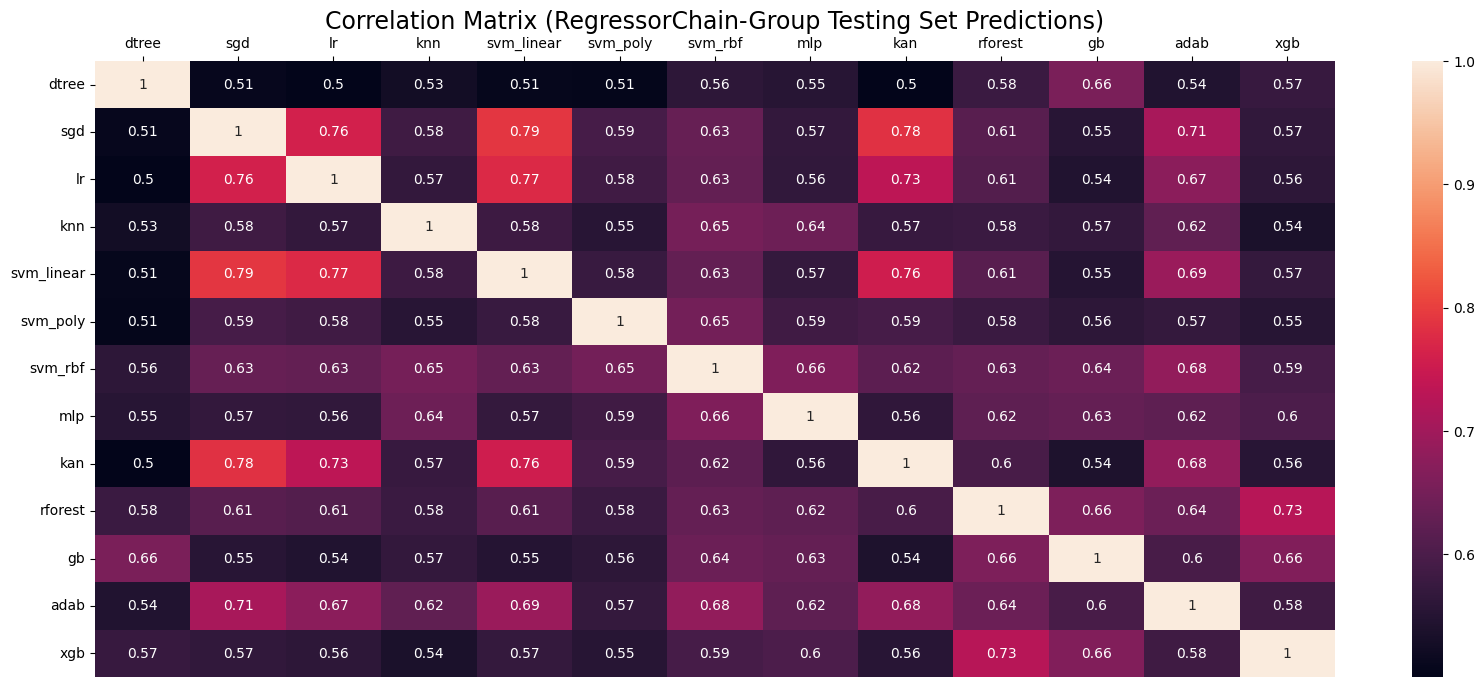

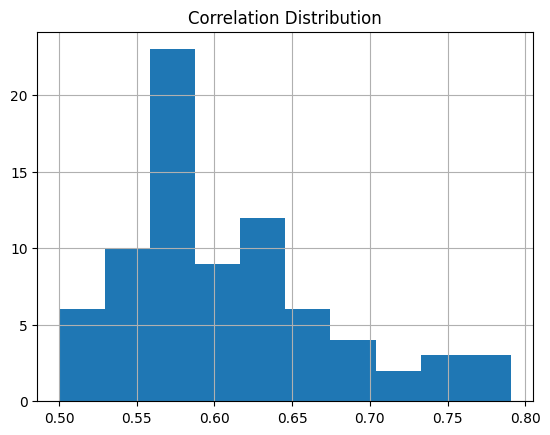

Testing correlation distribution:
count    78.000000
mean      0.607377
std       0.067214
min       0.500565
25%       0.563722
50%       0.589149
75%       0.638419
max       0.790671
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0087
NMSE: 0.0749
MAE: 0.3243
NMAE: 0.6630
aRRMSE: 0.5481
aCC: 0.9383


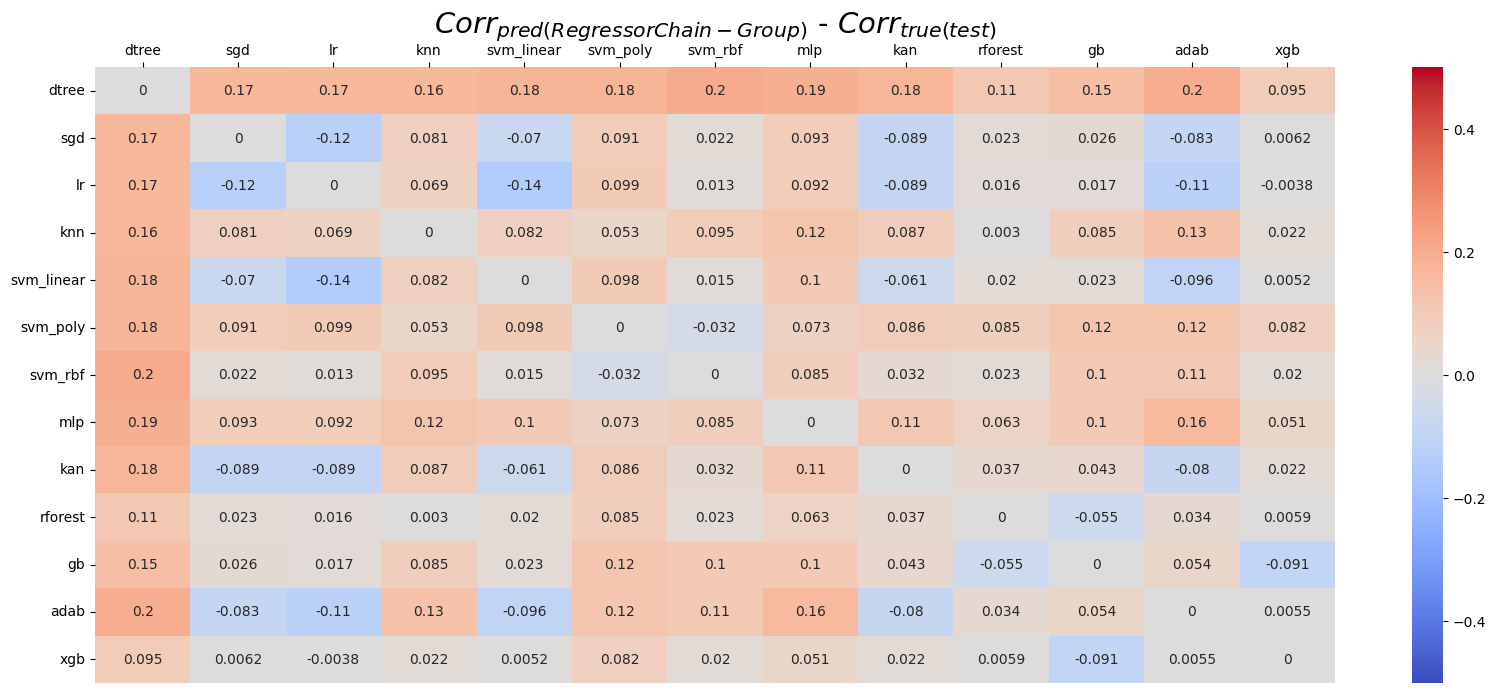

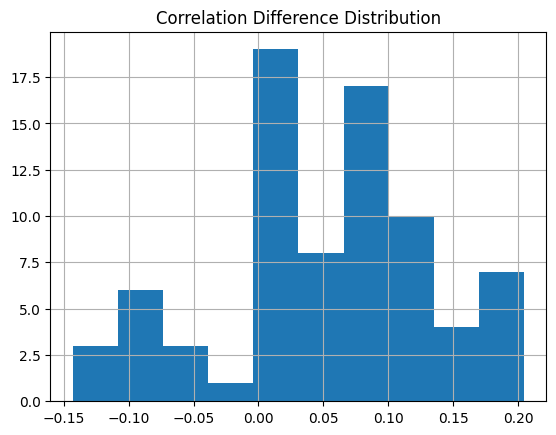

[['svm_poly'], ['dtree', 'gb'], ['rforest', 'xgb', 'gb'], ['svm_rbf', 'mlp'], ['knn', 'svm_rbf'], ['svm_linear', 'kan', 'sgd', 'lr', 'adab'], ['adab', 'svm_rbf']]


In [21]:
metrics_df.loc['RC(g)',:] = assr_performance(rcg, Xa_test, ya_test, Xa_train, ya_train)

results = correlation_pred_performance(rcg, Xa_test, ya_test, min_score=MIN_SCORE, name="RegressorChain-Group")

diff_metrics.loc['RC(g)',:] = results['results']

groups['rcg_assessor'] = results['groups']
print(groups['rcg_assessor']['test'])

In [22]:
results

{'results': [0.008689632233151539,
  0.07494436171044142,
  np.float64(0.3242576966364318),
  np.float64(0.6629901069052995),
  np.float64(0.5481290535326282),
  np.float64(0.9383420585552507)],
 'groups': {'test': [['svm_poly'],
   ['dtree', 'gb'],
   ['rforest', 'xgb', 'gb'],
   ['svm_rbf', 'mlp'],
   ['knn', 'svm_rbf'],
   ['svm_linear', 'kan', 'sgd', 'lr', 'adab'],
   ['adab', 'svm_rbf']]}}

In [28]:
rcg = None

### Ensemble of Regressor Chains

In [ ]:
#rcg = GroupedAssessor(RegressorChain, model_names, random_state=seed)
#rcg.fit(Xa_train, ya_train, groups['true_assessor_train'], base_estimator=RandomForestRegressor(random_state=seed), 
#        random_state=seed, order='random', cv=5)

#rcg_plus = GroupedAssessor(VotingRegressor, model_names, random_state=seed,
#                           estimators=rc_ests, n_jobs=-1)

rcg_ac = f'RC[{num_chains}](g)'

rcg_plus = GroupedAssessor([GroupedAssessor([RegressorChain(
                                                base_estimator=RandomForestRegressor(random_state=seed),
                                                random_state=seed+i,
                                                order='random', cv=5) for i in range(num_chains)]
                                            ) for _ in range(len(groups['true_assessor_train']))])

rcg_plus.fit(Xa_train, ya_train, groups=groups['true_assessor_train'])

In [ ]:
# keeping the concat because multiple numbers of chains could be recorded
#50chains
if(rcg_ac in metrics_df.index):
    metrics_df.loc[rcg_ac,:] = assr_performance(rcg_plus, Xa_test, ya_test, Xa_train, ya_train)
else:
    new_df = pd.DataFrame(assr_performance(rcg_plus, Xa_test, ya_test, Xa_train, ya_train), 
                          columns=metrics_cols,
                          index=multIdx(rcg_ac, subindex=model_names))

    metrics_df = pd.concat([metrics_df, new_df])

results = correlation_pred_performance(rcg_plus, Xa_test, ya_test, min_score=MIN_SCORE, name=f"RegressorChain[{num_chains}]-Group")

diff_metrics.loc[rcg_ac,:] = results['results']

groups[f'rcg({num_chains})_assessor'] = results['groups']
print(groups[f'rcg({num_chains})_assessor']['test'])

[TRAINING SET]
MSE: 0.0236
NMSE: 0.2616
MAE: 0.1035
NMAE: 0.4061
aRRMSE: 0.5031
aCC: 0.8820

[TESTING SET]
MSE: 0.0756
NMSE: 0.6943
MAE: 0.1900
NMAE: 0.6978
aRRMSE: 0.8281
aCC: 0.5444


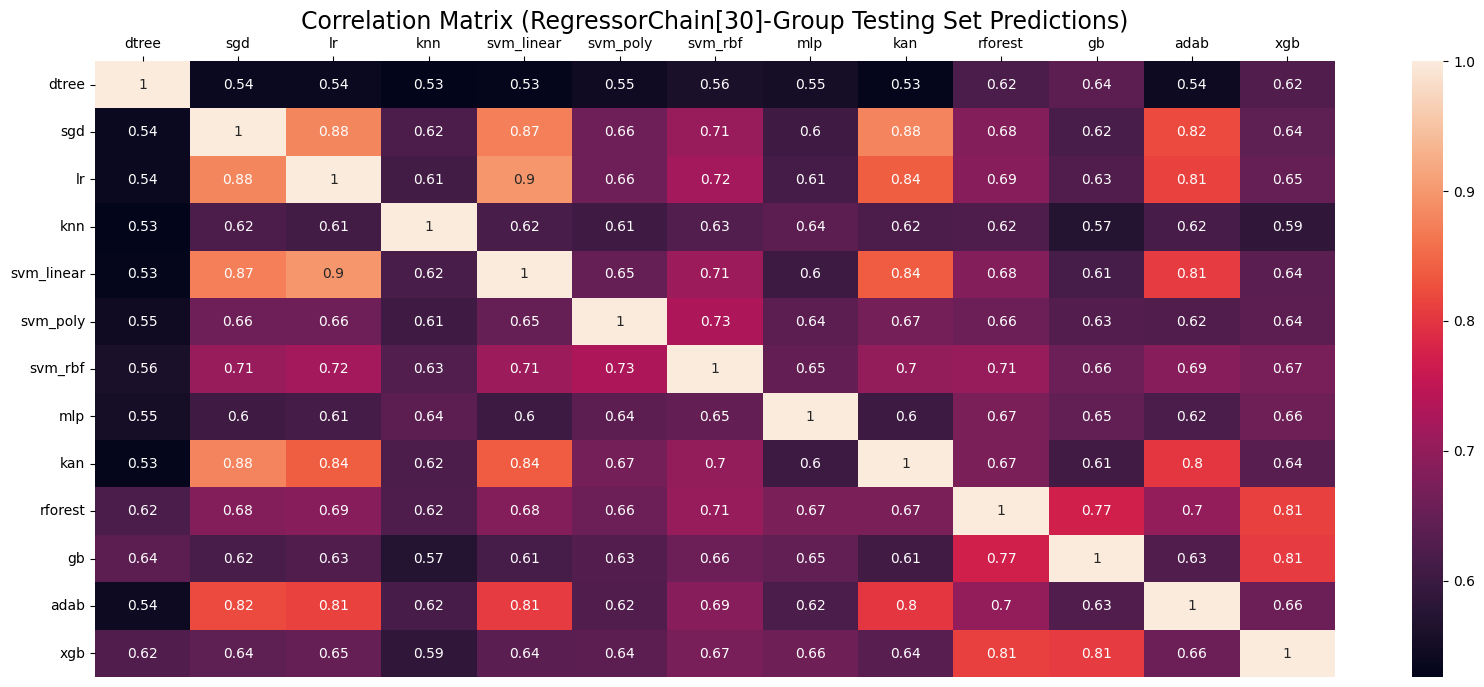

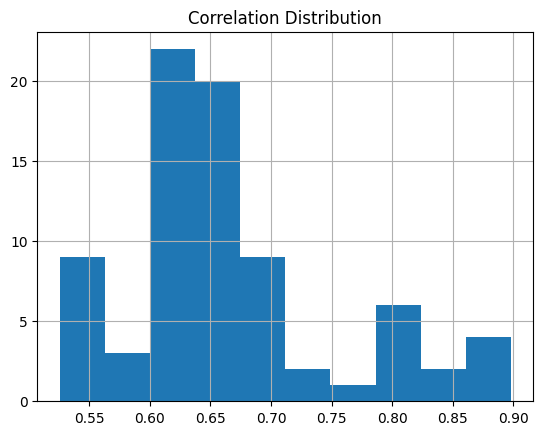

Testing correlation distribution:
count    78.000000
mean      0.664546
std       0.089754
min       0.525744
25%       0.615502
50%       0.641270
75%       0.697010
max       0.897854
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0138
NMSE: 0.1016
MAE: 0.5448
NMAE: 0.9336
aRRMSE: 0.7194
aCC: 0.9851


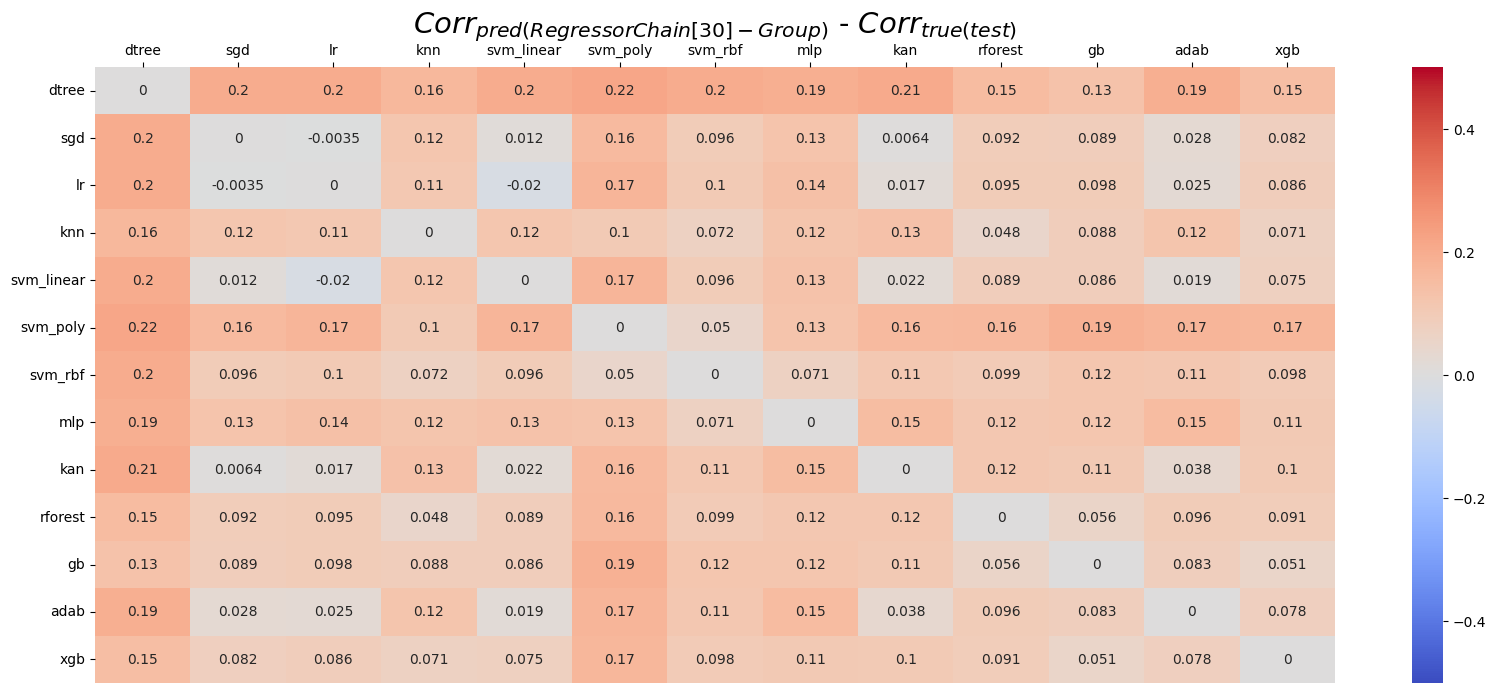

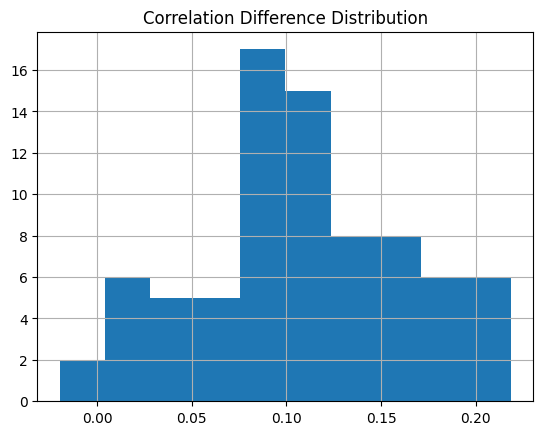

[['dtree'], ['knn'], ['rforest', 'svm_rbf', 'xgb', 'gb'], ['svm_linear', 'kan', 'sgd', 'svm_rbf', 'lr', 'adab', 'rforest'], ['svm_linear', 'svm_poly', 'kan', 'sgd', 'svm_rbf', 'lr', 'rforest'], ['svm_rbf', 'lr', 'adab', 'rforest', 'xgb'], ['mlp', 'rforest', 'xgb']]


In [24]:
# keeping the concat because multiple numbers of chains could be recorded
#30chains
if(rcg_ac in metrics_df.index):
    metrics_df.loc[rcg_ac,:] = assr_performance(rcg_plus, Xa_test, ya_test, Xa_train, ya_train)
else:
    new_df = pd.DataFrame(assr_performance(rcg_plus, Xa_test, ya_test, Xa_train, ya_train), 
                          columns=metrics_cols,
                          index=multIdx(rcg_ac, subindex=model_names))

    metrics_df = pd.concat([metrics_df, new_df])

results = correlation_pred_performance(rcg_plus, Xa_test, ya_test, min_score=MIN_SCORE, name=f"RegressorChain[{num_chains}]-Group")

diff_metrics.loc[rcg_ac,:] = results['results']

groups[f'rcg({num_chains})_assessor'] = results['groups']
print(groups[f'rcg({num_chains})_assessor']['test'])

[TRAINING SET]
MSE: 0.0241
NMSE: 0.2655
MAE: 0.1044
NMAE: 0.4089
aRRMSE: 0.5062
aCC: 0.8792

[TESTING SET]
MSE: 0.0757
NMSE: 0.6960
MAE: 0.1901
NMAE: 0.6983
aRRMSE: 0.8292
aCC: 0.5432


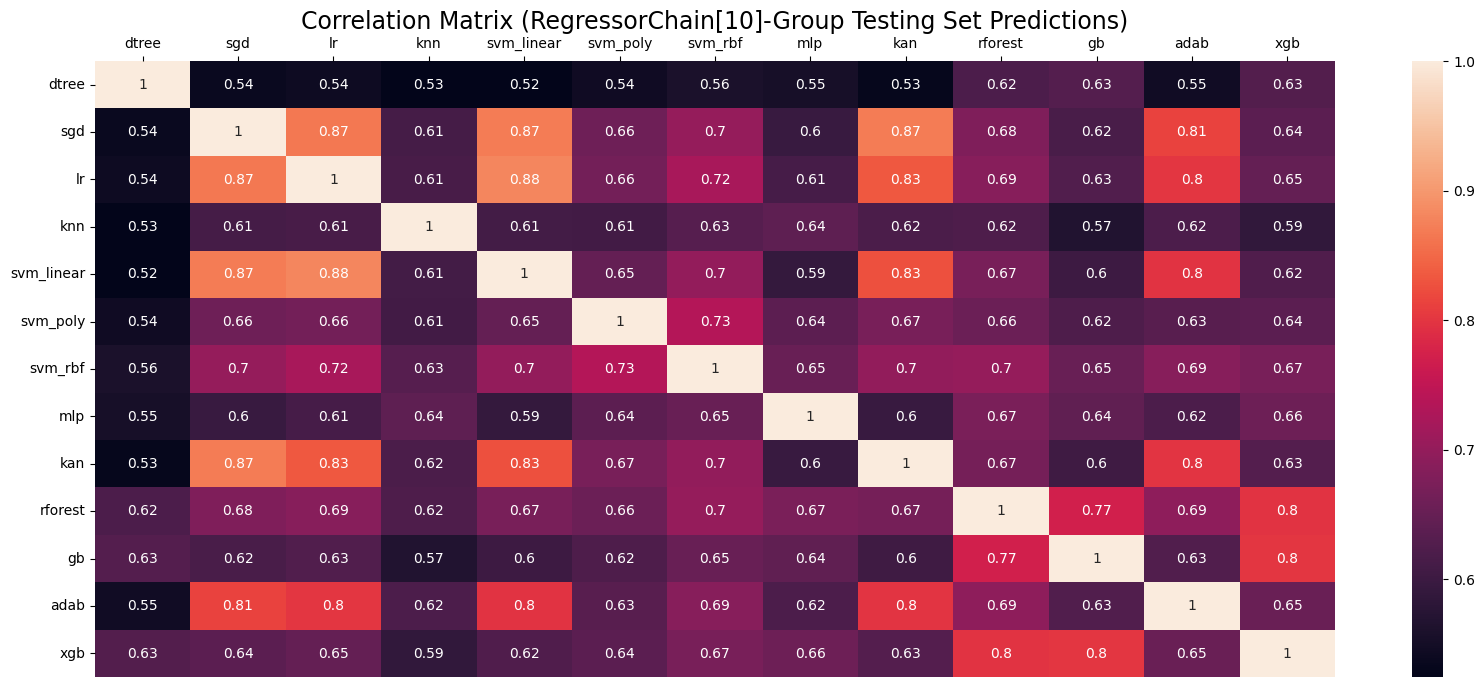

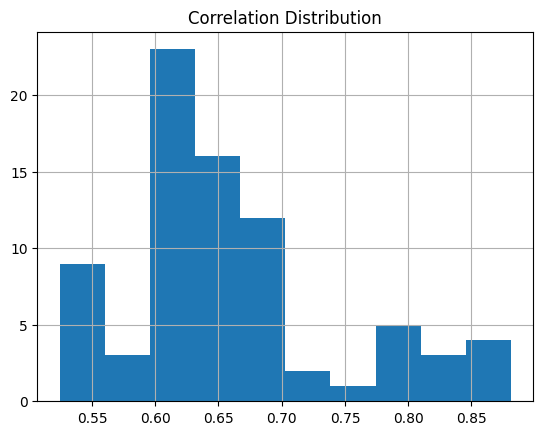

Testing correlation distribution:
count    78.000000
mean      0.661406
std       0.087195
min       0.524644
25%       0.613144
50%       0.639250
75%       0.692318
max       0.881078
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0135
NMSE: 0.0995
MAE: 0.5306
NMAE: 0.9162
aRRMSE: 0.7088
aCC: 0.9836


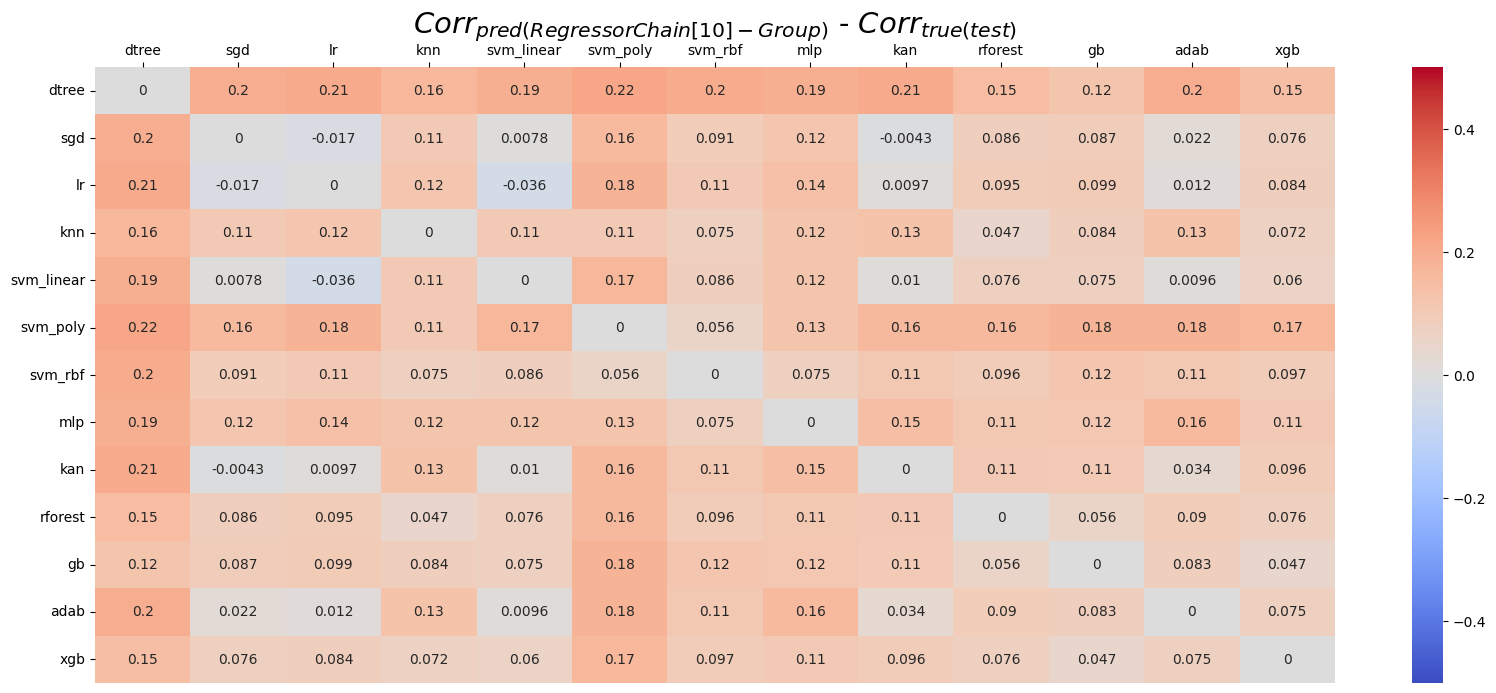

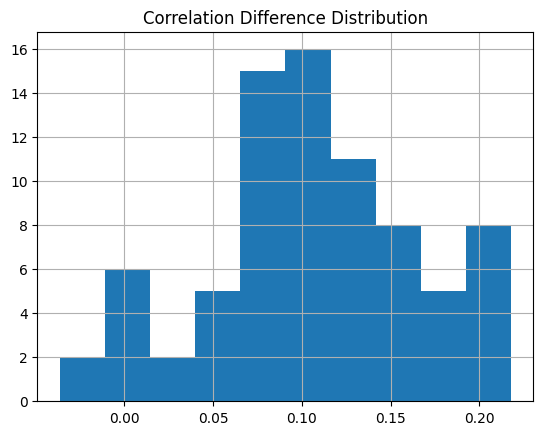

[['svm_rbf', 'rforest', 'gb', 'xgb'], ['svm_rbf', 'rforest', 'mlp', 'xgb'], ['svm_rbf', 'rforest', 'adab', 'xgb'], ['svm_rbf', 'rforest', 'lr', 'kan', 'sgd', 'svm_poly'], ['svm_rbf', 'rforest', 'lr', 'kan', 'sgd', 'svm_linear', 'adab'], ['dtree'], ['knn']]


In [30]:
# keeping the concat because multiple numbers of chains could be recorded
#10chains
if(rcg_ac in metrics_df.index):
    metrics_df.loc[rcg_ac,:] = assr_performance(rcg_plus, Xa_test, ya_test, Xa_train, ya_train)
else:
    new_df = pd.DataFrame(assr_performance(rcg_plus, Xa_test, ya_test, Xa_train, ya_train), 
                          columns=metrics_cols,
                          index=multIdx(rcg_ac, subindex=model_names))

    metrics_df = pd.concat([metrics_df, new_df])

results = correlation_pred_performance(rcg_plus, Xa_test, ya_test, min_score=MIN_SCORE, name=f"RegressorChain[{num_chains}]-Group")

diff_metrics.loc[rcg_ac,:] = results['results']

groups[f'rcg({num_chains})_assessor'] = results['groups']
print(groups[f'rcg({num_chains})_assessor']['test'])

In [31]:
teste = metrics_df.dropna().copy()
teste = teste.reset_index()
teste.to_csv("data/churn/metrics_RC_RC30.csv")

In [ ]:
rcg_ac.predict()

In [31]:
rcg_plus = None

### Multi-Output SVR

In [ ]:
msvrg = GroupedAssessor([MSVR() for _ in range(len(groups['true_assessor_train']))])

msvrg.fit(Xa_train_norm, ya_train, groups['true_assessor_train'])

c:\Users\pedro\Documents\NOVOdeltadelta\pog\meu\proj-mtr\MSVR.py:74: RuntimeWarning: divide by zero encountered in divide
  a = 2 * C * (u - epsi) / u
c:\Users\pedro\Documents\NOVOdeltadelta\pog\meu\proj-mtr\MSVR.py:74: RuntimeWarning: divide by zero encountered in divide
  a = 2 * C * (u - epsi) / u


[TRAINING SET]
MSE: 0.0716
NMSE: 0.7840
MAE: 0.1894
NMAE: 0.8278
aRRMSE: 0.8695
aCC: 0.5485

[TESTING SET]
MSE: 0.0802
NMSE: 0.8254
MAE: 0.2006
NMAE: 0.8448
aRRMSE: 0.8991
aCC: 0.4799


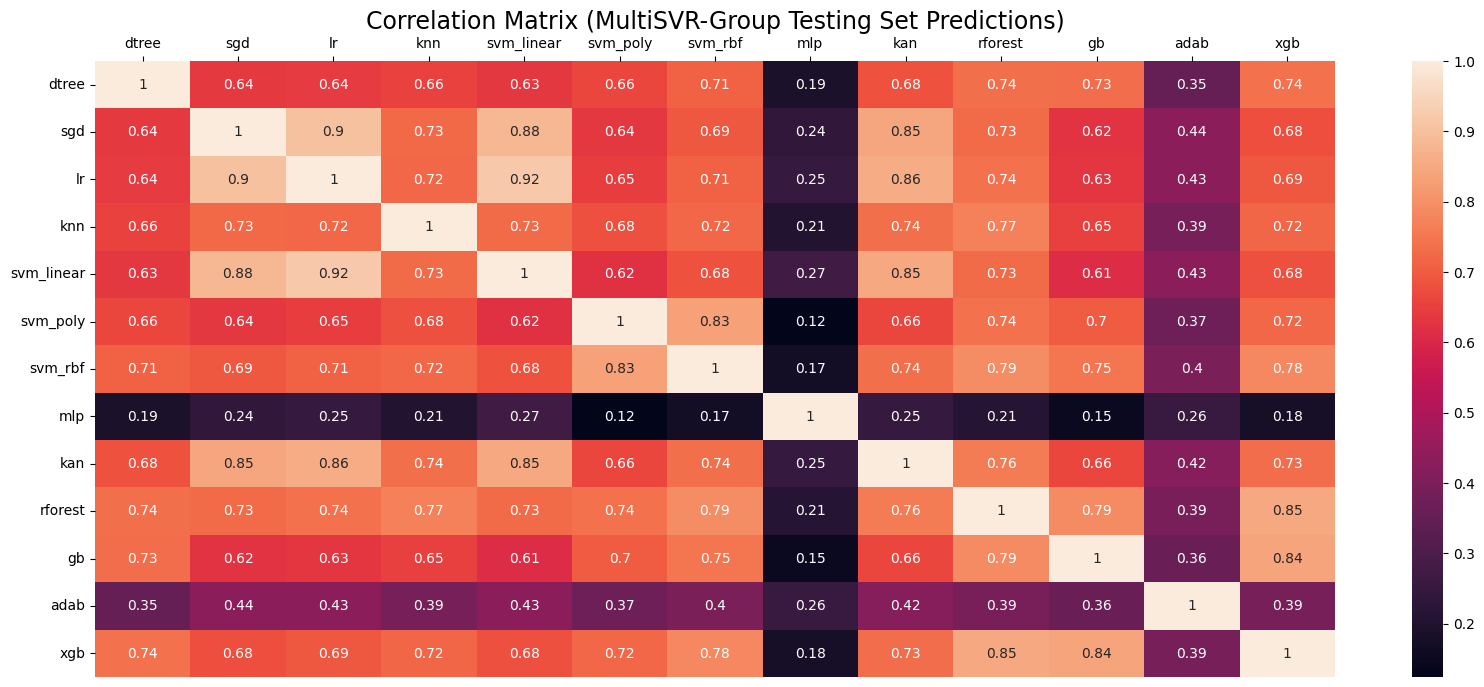

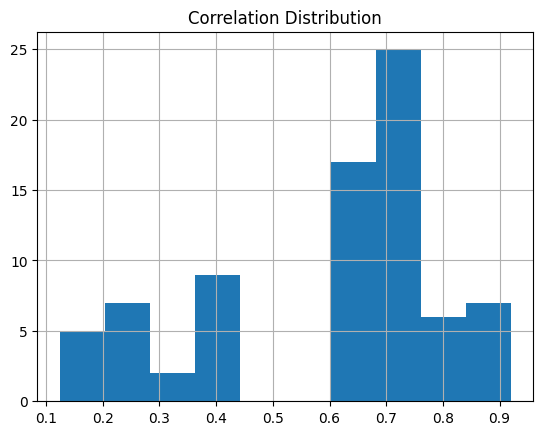

Testing correlation distribution:
count    78.000000
mean      0.600884
std       0.214307
min       0.124314
25%       0.422323
50%       0.678512
75%       0.735569
max       0.919881
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0439
NMSE: 0.1821
MAE: 1.8827
NMAE: 1.7511
aRRMSE: 1.3410
aCC: 0.5953


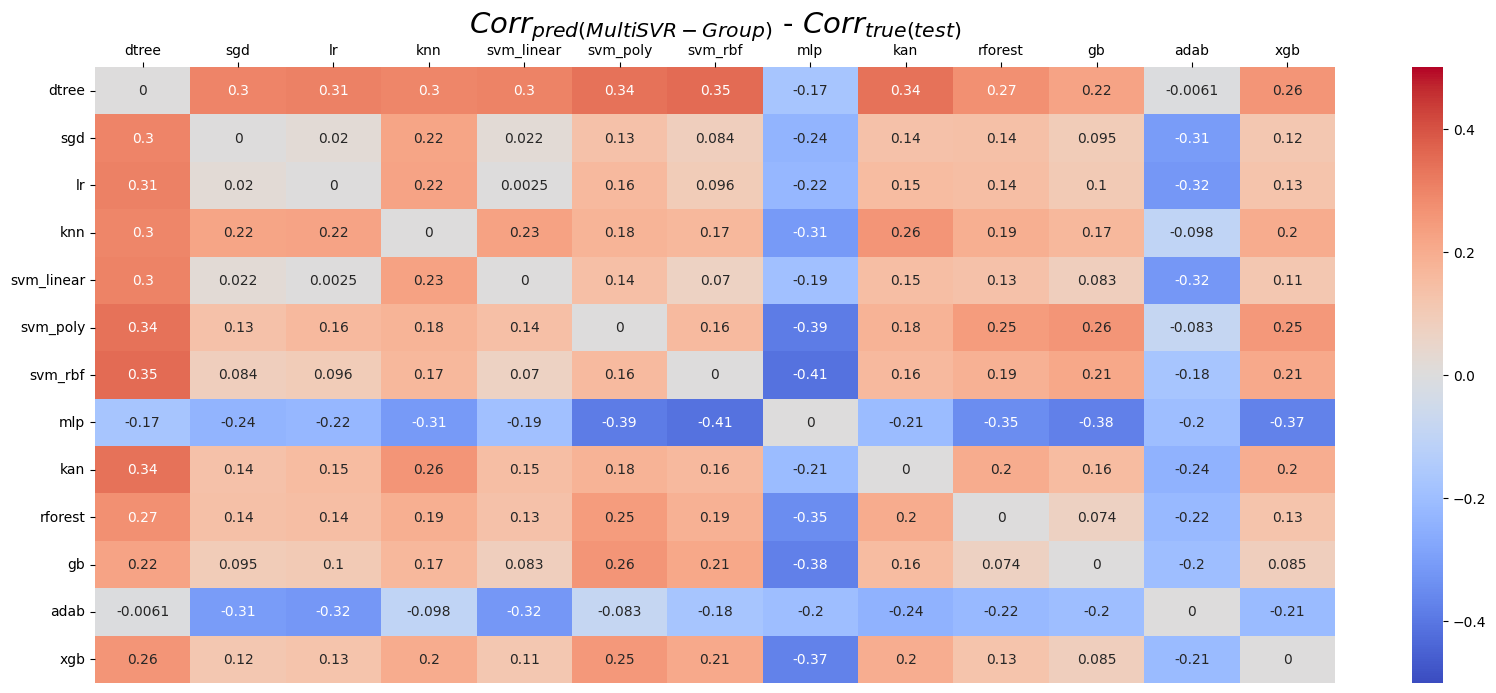

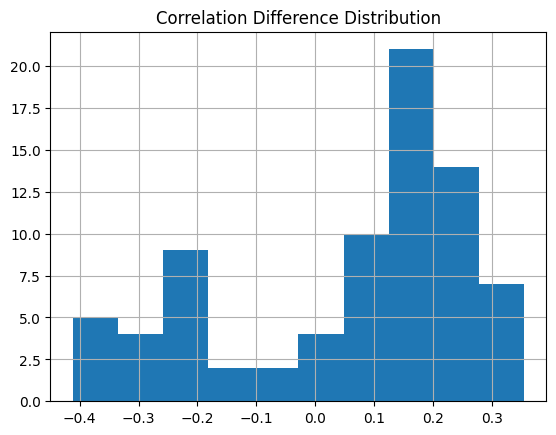

[['mlp'], ['rforest', 'svm_rbf', 'xgb', 'kan', 'dtree', 'svm_poly', 'gb'], ['lr', 'rforest', 'svm_rbf', 'svm_linear', 'xgb', 'kan', 'knn', 'sgd'], ['rforest', 'svm_rbf', 'xgb', 'kan', 'dtree', 'svm_poly', 'knn'], ['adab']]


In [44]:
metrics_df.loc['M-SVR(g)',:] = assr_performance(msvrg, Xa_test_norm, ya_test, Xa_train_norm, ya_train)

results = correlation_pred_performance(msvrg, pd.DataFrame(Xa_test_norm, index=Xa_test.index), 
                                       ya_test, min_score=MIN_SCORE, name="MultiSVR-Group")

diff_metrics.loc['M-SVR(g)',:] = results['results']

groups['msvrg_assessor'] = results['groups']
print(groups['msvrg_assessor']['test'])

### Multi-Target Random Forest Regressor

In [ ]:
mrfg = GroupedAssessor([RandomForestRegressor(random_state=seed) for _ in range(len(groups['true_assessor_train']))])

mrfg.fit(Xa_train, ya_train, groups['true_assessor_train'])

c:\Users\pedro\pyenvs\mainpy\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\pedro\pyenvs\mainpy\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\pedro\pyenvs\mainpy\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[TRAINING SET]
MSE: 0.0103
NMSE: 0.0996
MAE: 0.0666
NMAE: 0.2563
aRRMSE: 0.3141
aCC: 0.9660

[TESTING SET]
MSE: 0.0772
NMSE: 0.7313
MAE: 0.1874
NMAE: 0.7067
aRRMSE: 0.8513
aCC: 0.5200


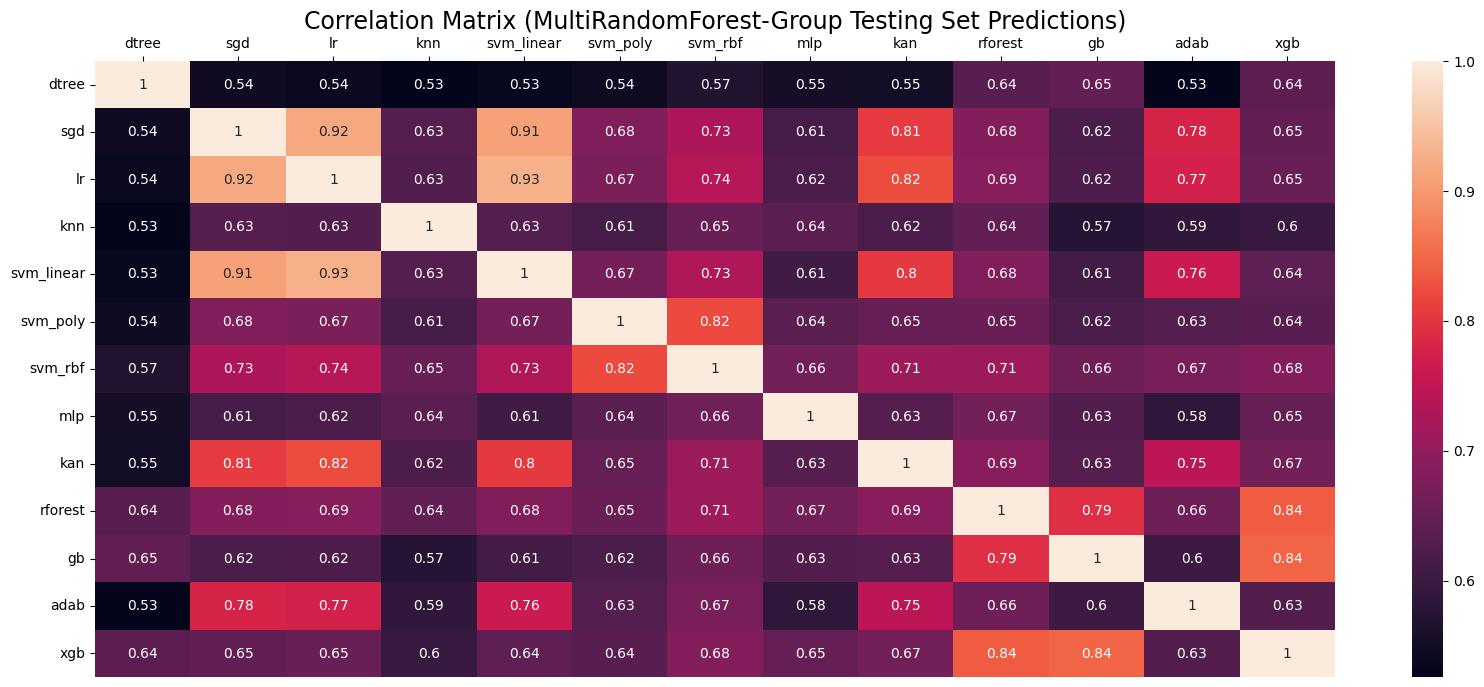

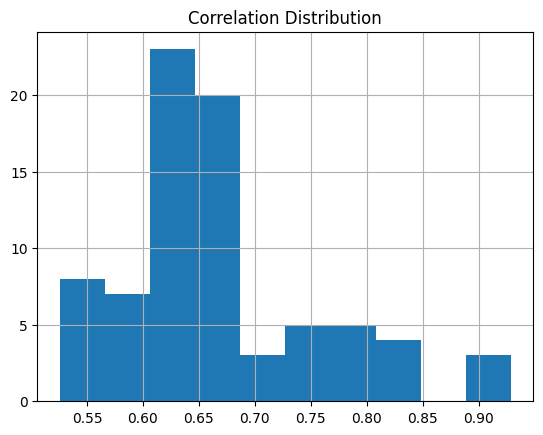

Testing correlation distribution:
count    78.000000
mean      0.667226
std       0.090310
min       0.525744
25%       0.619699
50%       0.647656
75%       0.687940
max       0.928777
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0154
NMSE: 0.1103
MAE: 0.6356
NMAE: 1.0473
aRRMSE: 0.7821
aCC: 0.9780


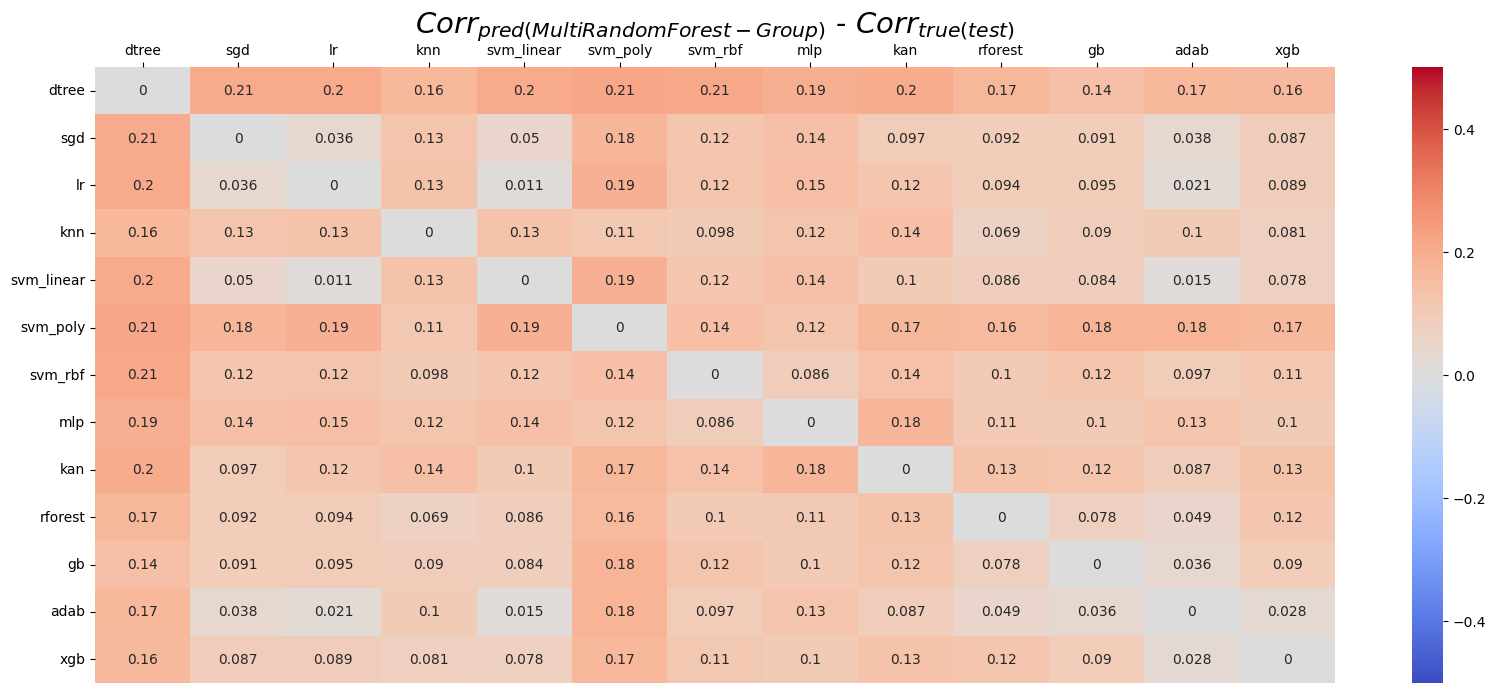

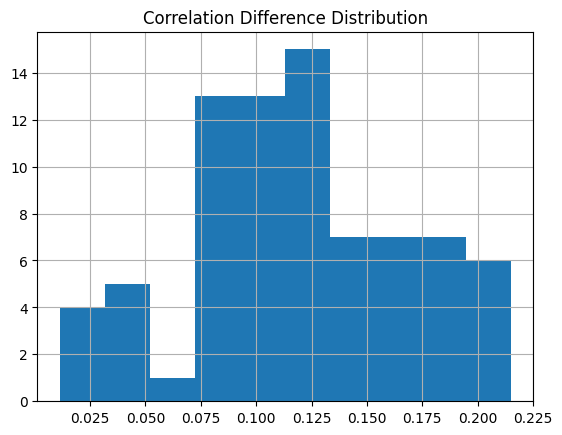

[['dtree'], ['mlp', 'xgb', 'rforest', 'svm_rbf'], ['lr', 'rforest', 'svm_rbf', 'svm_linear', 'kan', 'svm_poly', 'sgd'], ['lr', 'rforest', 'svm_rbf', 'svm_linear', 'kan', 'adab', 'sgd'], ['lr', 'rforest', 'svm_rbf', 'xgb', 'kan'], ['gb', 'rforest', 'svm_rbf', 'xgb'], ['knn', 'svm_rbf']]


In [46]:
metrics_df.loc['MRT(g)',:] = assr_performance(mrfg, Xa_test, ya_test, Xa_train, ya_train)

results = correlation_pred_performance(mrfg, Xa_test, ya_test, min_score=MIN_SCORE, name="MultiRandomForest-Group")

diff_metrics.loc['MRT(g)',:] = results['results']

groups['mrfg_assessor'] = results['groups']
print(groups['mrfg_assessor']['test'])

In [47]:
#keys = list(groups.keys())
#OBJV = len(groups['true_assessor_test'])
#for i in range(len(keys)):
#    if('test' in keys[i] and keys[i] != 'true_assessor_test'):
#        print(f'{keys[i]}({len(groups[keys[i]])}) & true_assessor_test({OBJV}):')
#        count = 0
#        for g in groups[keys[i]]:
#            if(g in groups['true_assessor_test']):
#                print(g)
#                count += 1
#        print(f'Número de grupos em comum: {count}\n\n')

## Análises

In [ ]:
results_df = metrics_df.dropna().copy()
results_df = results_df.reset_index()

results_df

Assessor       Model       MSE       MAE      NMSE      NMAE    aRRMSE  \
0        ST       dtree  0.181723  0.909715  0.337815    0.8446   0.95379   
1        ST         sgd  0.032892  0.565911  0.115303  0.557592  0.752271   
2        ST          lr  0.040547  0.596436  0.131403  0.586247  0.772293   
3        ST         knn  0.116835  0.842509  0.263283  0.798898  0.917883   
4        ST  svm_linear  0.038628  0.576955  0.129083  0.580858  0.759575   
..      ...         ...       ...       ...       ...       ...       ...   
86    RC(g)         kan  0.041679  0.784798  0.133938  0.685187  0.885888   
87    RC(g)     rforest  0.063073  0.824896  0.202312    0.8717  0.908238   
88    RC(g)          gb  0.137709  0.870389  0.270384  0.802271  0.932946   
89    RC(g)        adab  0.000074  0.275801  0.002625  0.336503  0.525168   
90    RC(g)         xgb   0.11083  0.965389  0.275095  0.961565  0.982542   

         aCC  
0   0.335972  
1   0.665716  
2   0.642698  
3   0.422981  
4   0.658345  
..       ...  
86  0.504878  
87  0.509928  
88  0.390141  
89  0.851247  
90  0.392785  

[91 rows x 8 columns]

In [33]:
diff_results = diff_metrics.dropna().reset_index(names=['Assessor'])
diff_results.to_csv(f'data/{DIR}/results_diff_RC.csv') # MUDAR PARA O NORMAL

In [ ]:
diff_results = diff_metrics.dropna().reset_index(names=['Assessor'])
diff_results.to_csv(f'data/{DIR}/results_diff_RC.csv') # MUDAR PARA O NORMAL
diff_results

Assessor       MSE       MAE      NMSE      NMAE    aRRMSE       aCC
0        ST   0.01319  0.098584  0.539985  0.938679  0.719079  0.975422
1       MRT  0.028811  0.152754  1.206294  1.459116  1.078645  0.970998
2    MRT(g)  0.015385   0.11029  0.635642  1.047279  0.782089  0.977977
3     M-SVR  0.039805  0.176721  1.642144  1.668478  1.267542  0.633198
4  M-SVR(g)  0.043913  0.182072  1.882668  1.751085  1.341004  0.595334
5        RC  0.013986  0.102654  0.575558  0.967698  0.747608  0.930882
6     RC(g)  0.010658  0.083729  0.427877  0.789696  0.639437  0.887476

In [ ]:
win_table = pd.DataFrame(index=results_df['Assessor'].unique(), columns=results_df.drop(columns=['Assessor', 'Model']).columns)

for mt in ['MSE', 'MAE', 'NMSE', 'NMAE', 'aRRMSE']:
    assr_wins = results_df.loc[results_df.groupby("Model")[mt].idxmin(), ["Model", "Assessor", mt]]
    win_table[mt] = assr_wins['Assessor'].value_counts()

assr_wins = results_df.loc[results_df.groupby("Model")['aCC'].idxmin(), ["Model", "Assessor", 'aCC']]
win_table['aCC'] = assr_wins['Assessor'].value_counts()

win_table = win_table.fillna(0)
win_table.to_csv(f'data/{DIR}/win_table_RC.csv') # MUDAR PARA NORMAL
win_table

MSE  MAE  NMSE  NMAE  aRRMSE  aCC
ST        0.0  0.0   4.0   4.0     0.0  2.0
MRT       0.0  0.0   0.0   0.0     0.0  1.0
MRT(g)    0.0  0.0   2.0   2.0     0.0  0.0
M-SVR     9.0  9.0   1.0   1.0     9.0  2.0
M-SVR(g)  3.0  3.0   2.0   2.0     3.0  2.0
RC        0.0  0.0   0.0   0.0     0.0  2.0
RC(g)     1.0  1.0   4.0   4.0     1.0  4.0

In [ ]:
summary = results_df.drop(columns=['Model']).groupby(['Assessor']).agg(['mean', 'std'])
summary.to_csv(f'data/{DIR}/results_RC.csv') # MUDAR PARA O NORMAL
summary

MSE                 MAE                NMSE            \
              mean       std      mean       std      mean       std   
Assessor                                                               
M-SVR     0.073825  0.050925  0.729316  0.123559  0.195793  0.089777   
M-SVR(g)  0.080182  0.058931  0.825433  0.265948  0.200602  0.086517   
MRT       0.077513  0.052700  0.740974  0.128985  0.188526  0.087897   
MRT(g)    0.077169  0.052455  0.731313  0.139942  0.187375  0.088265   
RC        0.076159  0.051453  0.711582  0.164042  0.191172  0.088400   
RC(g)     0.079909  0.052512  0.746634  0.190111  0.194831  0.091482   
ST        0.077238  0.052389  0.718691  0.173026  0.187028  0.088659   

              NMAE              aRRMSE                 aCC            
              mean       std      mean       std      mean       std  
Assessor                                                              
M-SVR     0.788365  0.142694  0.851018  0.074216  0.512075  0.114317  
M-SVR(g)  0.844762  0.238982  0.899104  0.135889  0.479893  0.154129  
MRT       0.719642  0.097723  0.857689  0.076088  0.513075  0.117313  
MRT(g)    0.706707  0.114057  0.851329  0.084250  0.520028  0.124384  
RC        0.713539  0.135711  0.837257  0.107074  0.527468  0.138758  
RC(g)     0.723199  0.168008   0.85584  0.123908  0.514929  0.148628  
ST        0.694894  0.140664  0.840784  0.112934   0.52815  0.143526

In [53]:
results_df_c = results_df.copy()

In [51]:
class_palette = sns.color_palette()[:7]

In [ ]:
from torch import relu
from torch import Tensor

class_palette = [
                 sns.color_palette('bright')[3], relu(Tensor(sns.color_palette()[3])-Tensor([0.2]*3)).tolist(),
                 sns.color_palette('bright')[2], relu(Tensor(sns.color_palette()[2])-Tensor([0.15]*3)).tolist(),
                 sns.color_palette('bright')[0], relu(Tensor(sns.color_palette()[0])-Tensor([0.15]*3)).tolist(),
                 sns.color_palette('bright')[8], relu(Tensor(sns.color_palette()[8])-Tensor([0.15]*3)).tolist(),
                 ]

In [ ]:
#temp = results_df.drop(index=results_df[results_df['Assessor'].str.contains('M-SVR')].index) #.copy()

for mt in ['MSE', 'NMSE', 'MAE', 'NMAE', 'aRRMSE', 'aCC']:
    plt.title(f'Boxplot {mt}s')
    temp = results_df.loc[:,['Assessor','Model',mt]].copy()
    if((temp[mt] > 1.2).any()):
        dicio = {}
        for a in temp['Assessor'].unique():
            out_limits = (temp.loc[temp["Assessor"]==a,mt]>1.2).sum()
            if(out_limits > 0):
                dicio[a] = a + "*"*out_limits
        temp = temp.replace(dicio)
        plt.ylim(bottom=temp[mt].min()-0.017,top=temp.loc[temp[mt]<1.2,mt].max()+0.017)
    imgplt = sns.boxplot(temp, y=mt, x='Assessor', hue='Assessor', palette=class_palette)
    plt.tight_layout()
    plt.show(imgplt)
    #imgplt.figure.savefig(f'data/{DIR}/imgs/bp_{mt.lower()}.eps', format='eps', dpi=300)

In [ ]:
for mt in ['MSE', 'NMSE', 'MAE', 'NMAE', 'aRRMSE', 'aCC']:
    plt.figure(figsize=(12, 6))
    imgplt = sns.barplot(data=results_df, x='Model', y=mt, hue='Assessor', palette=class_palette, edgecolor='black', linewidth=0.5)
    plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left', borderaxespad=0, title='Assessor Type')
    plt.title(f'{mt} by Model & Assessor')
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show(imgplt)
    #imgplt.figure.savefig(f'data/{DIR}/imgs/bar_{mt.lower()}.eps', format='eps', dpi=300)

In [ ]:
for mt in diff_metrics.columns:
    plt.figure(figsize=(12, 6))
    imgplt = sns.barplot(data=diff_results.loc[:,['Assessor', mt]], x='Assessor', y=mt, hue='Assessor', palette=class_palette)
    plt.title(f"{mt} between Values and Predictions Correlations")
    plt.tight_layout()
    plt.show(imgplt)
    #imgplt.figure.savefig(f'data/{DIR}/imgs/bardiff_{mt.lower()}.eps', format='eps', dpi=300)

---

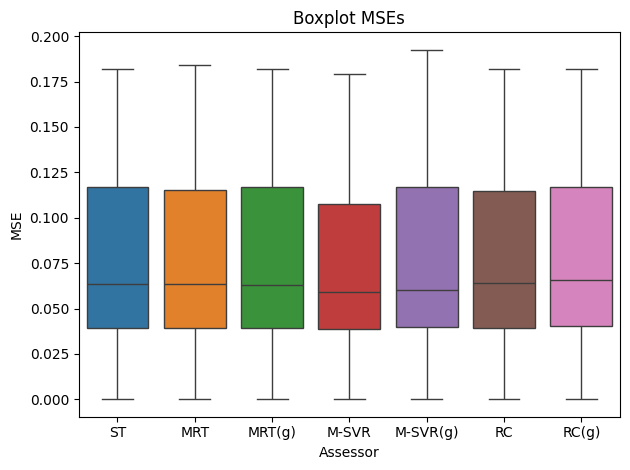

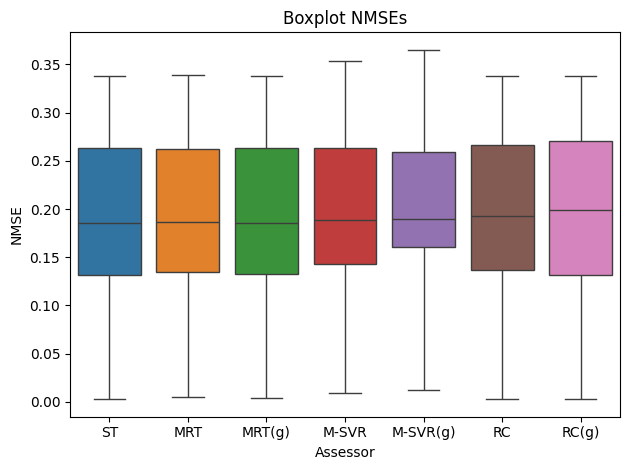

C:\Users\pedro\AppData\Local\Temp\ipykernel_19956\1332952985.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.replace(dicio)


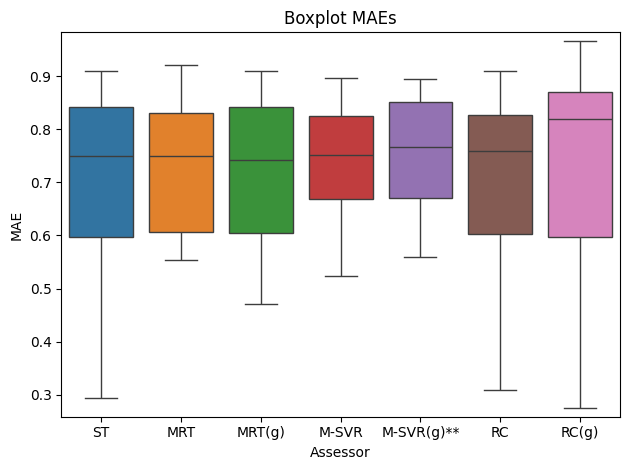

C:\Users\pedro\AppData\Local\Temp\ipykernel_19956\1332952985.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.replace(dicio)


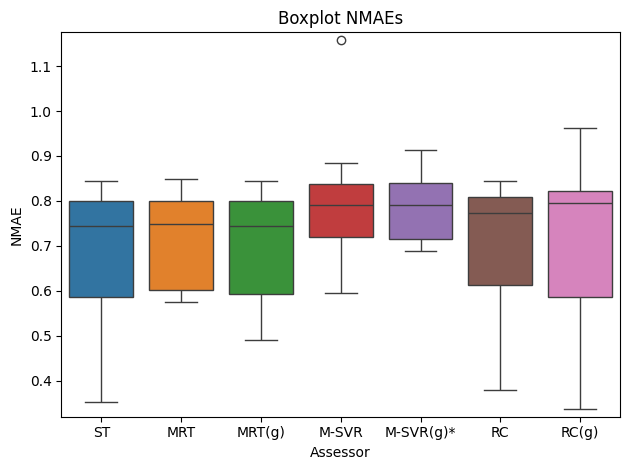

C:\Users\pedro\AppData\Local\Temp\ipykernel_19956\1332952985.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.replace(dicio)


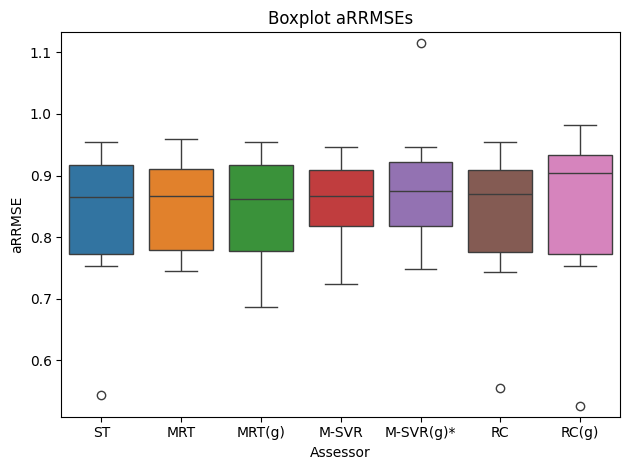

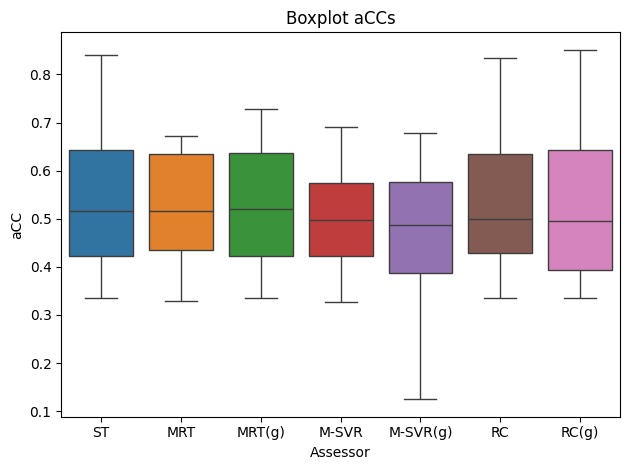

In [54]:
#temp = results_df.drop(index=results_df[results_df['Assessor'].str.contains('M-SVR')].index) #.copy()

for mt in ['MSE', 'NMSE', 'MAE', 'NMAE', 'aRRMSE', 'aCC']:
    plt.title(f'Boxplot {mt}s')
    temp = results_df.loc[:,['Assessor','Model',mt]].copy()
    if((temp[mt] > 1.2).any()):
        dicio = {}
        for a in temp['Assessor'].unique():
            out_limits = (temp.loc[temp["Assessor"]==a,mt]>1.2).sum()
            if(out_limits > 0):
                dicio[a] = a + "*"*out_limits
        temp = temp.replace(dicio)
        plt.ylim(bottom=temp[mt].min()-0.017,top=temp.loc[temp[mt]<1.2,mt].max()+0.017)
    imgplt = sns.boxplot(temp, y=mt, x='Assessor', hue='Assessor', palette=class_palette)
    plt.tight_layout()
    plt.show(imgplt)
    imgplt.figure.savefig(f'data/{DIR}/imgs/bp_{mt.lower()}.eps', format='eps', dpi=300)

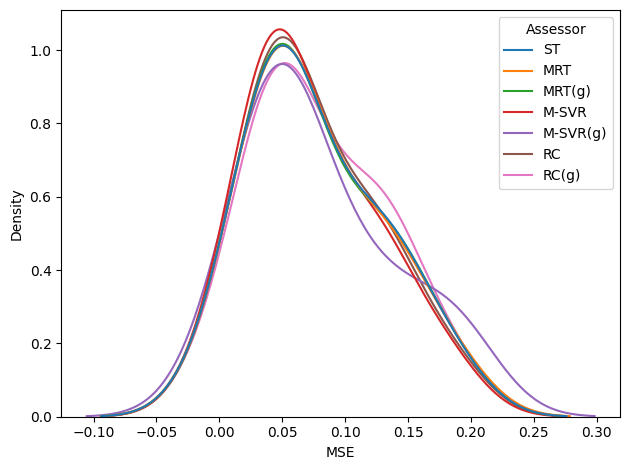

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


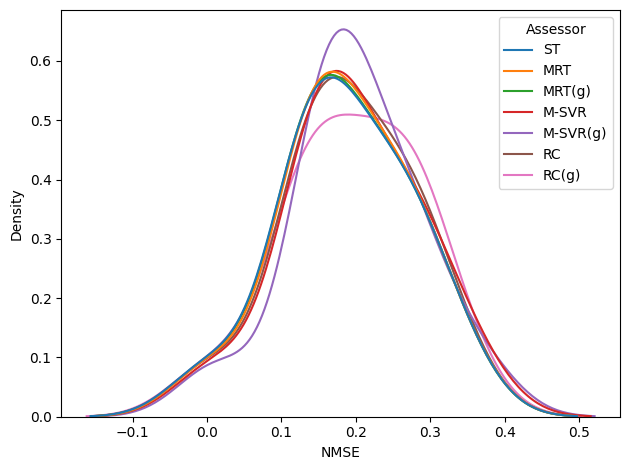

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


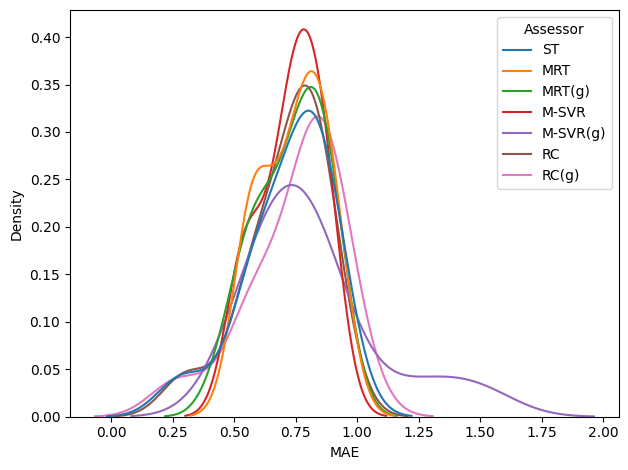

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
C:\Users\pedro\AppData\Local\Temp\ipykernel_19956\1270300147.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.replace(dicio)


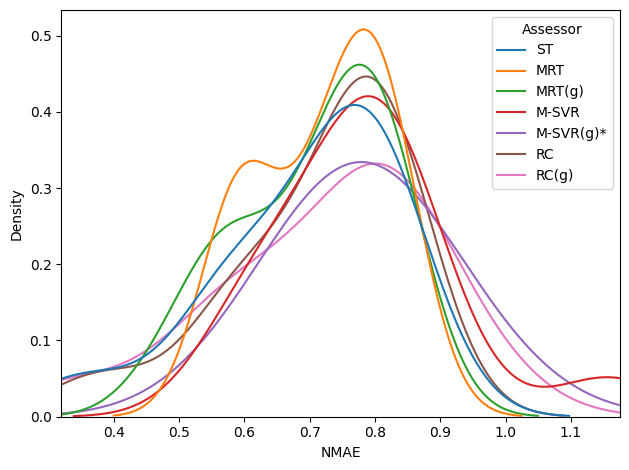

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


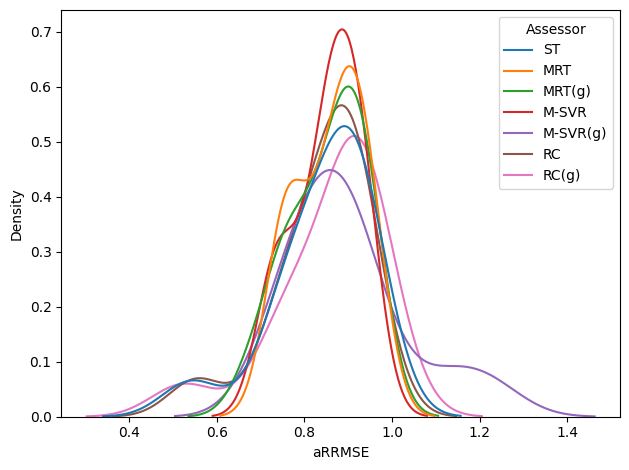

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


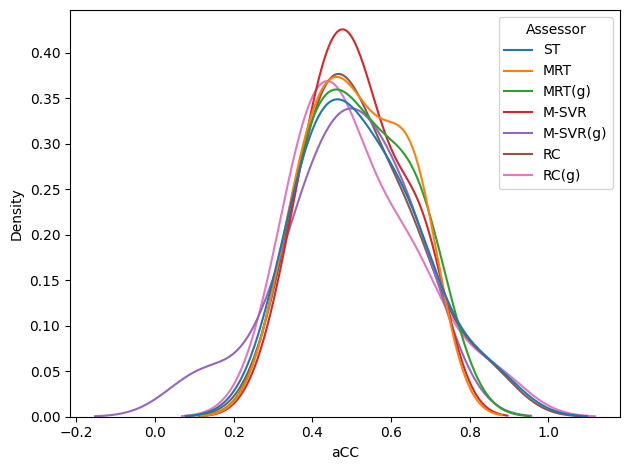

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [55]:
for mt in ['MSE', 'NMSE', 'MAE', 'NMAE', 'aRRMSE', 'aCC']:
    temp = results_df.loc[:,['Assessor','Model',mt]].copy()
    if((temp[mt] > 1.5).any()):
        dicio = {}
        for a in temp['Assessor'].unique():
            out_limits = (temp.loc[temp["Assessor"]==a,mt]>1.5).sum()
            if(out_limits > 0):
                dicio[a] = a + "*"*out_limits
        temp = temp.replace(dicio)
        plt.xlim(temp[mt].min()-0.017,temp.loc[temp[mt]<1.5,mt].max()+0.017)
    imgplt = sns.kdeplot(temp, x=mt, hue='Assessor', palette=class_palette)
    plt.tight_layout()
    plt.show(imgplt)
    imgplt.figure.savefig(f'data/{DIR}/imgs/kde_{mt.lower()}.eps', format='eps', dpi=300)

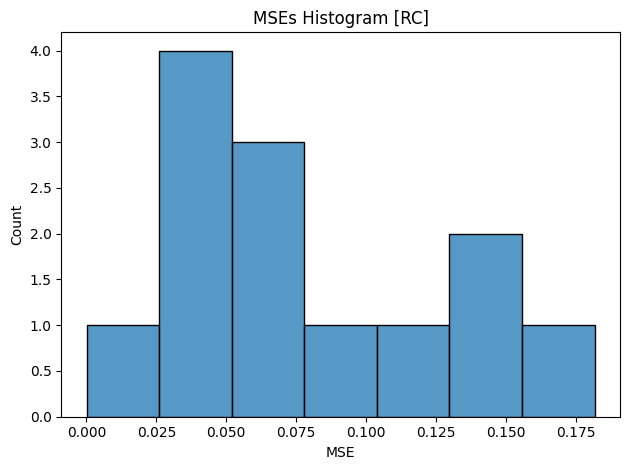

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


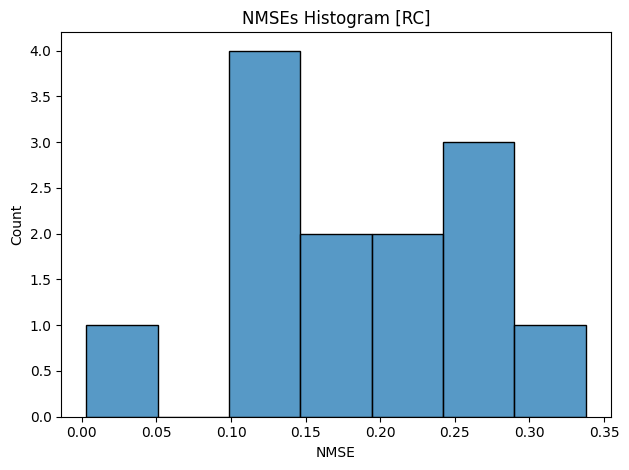

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


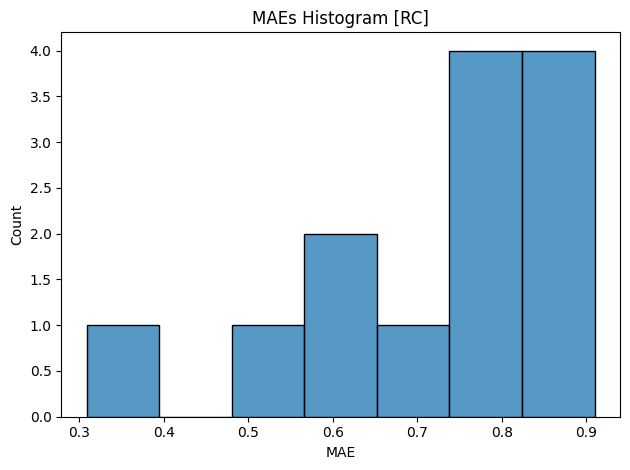

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


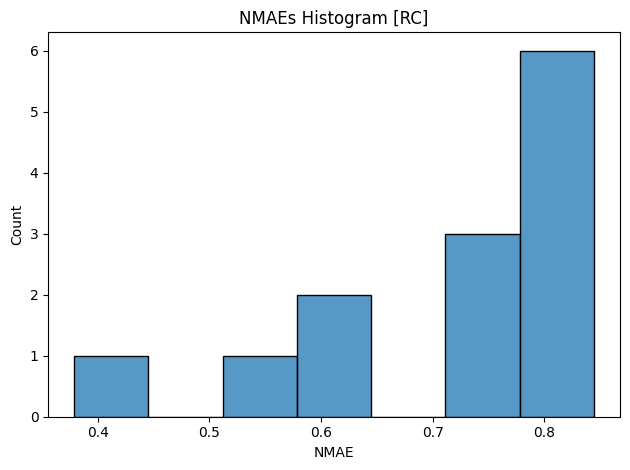

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


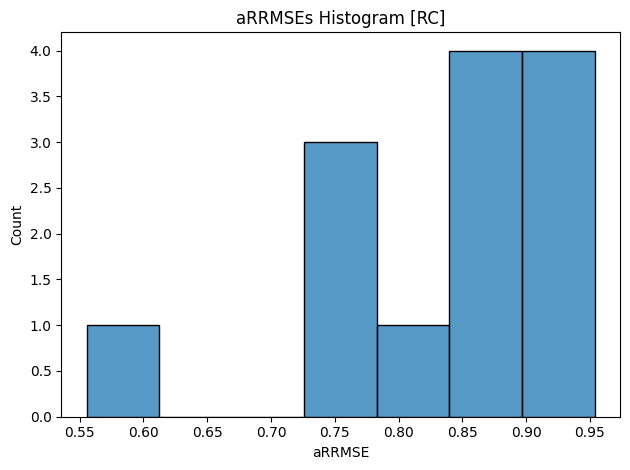

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


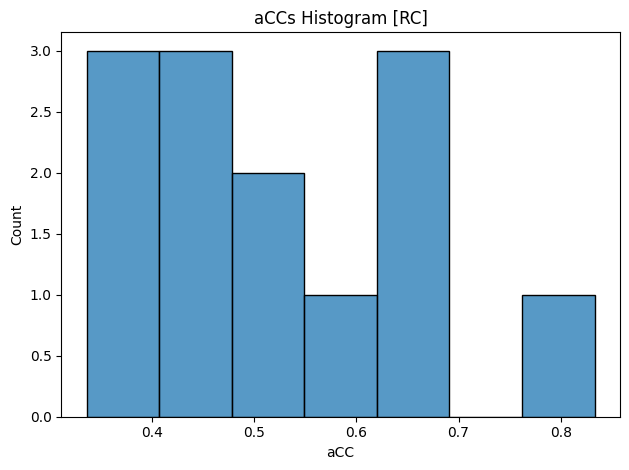

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


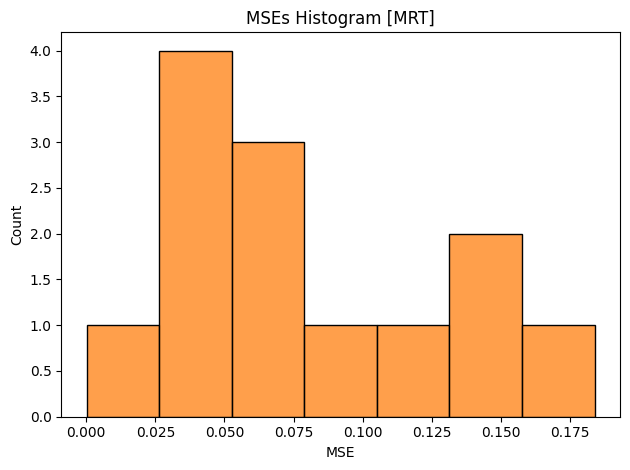

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


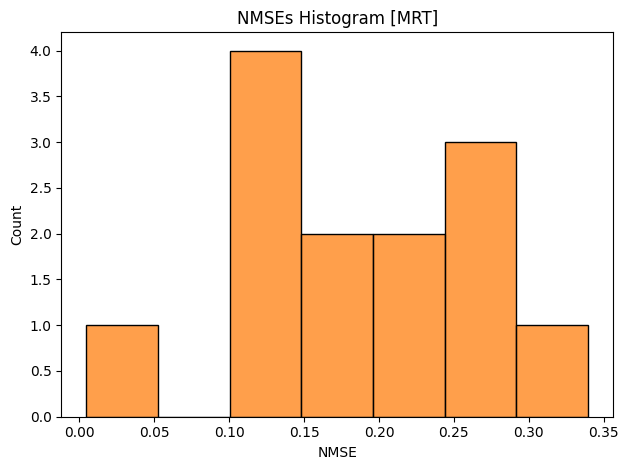

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


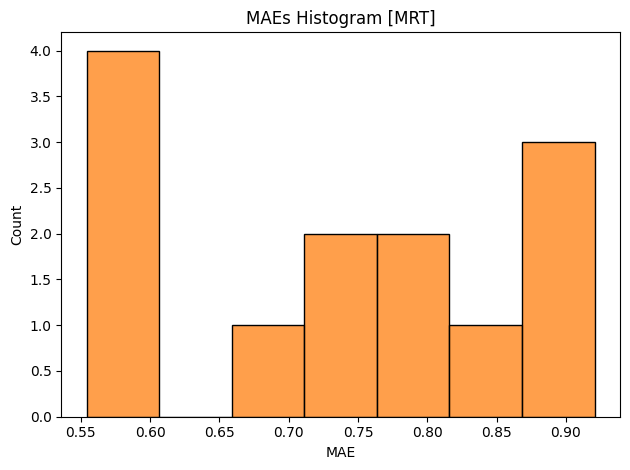

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


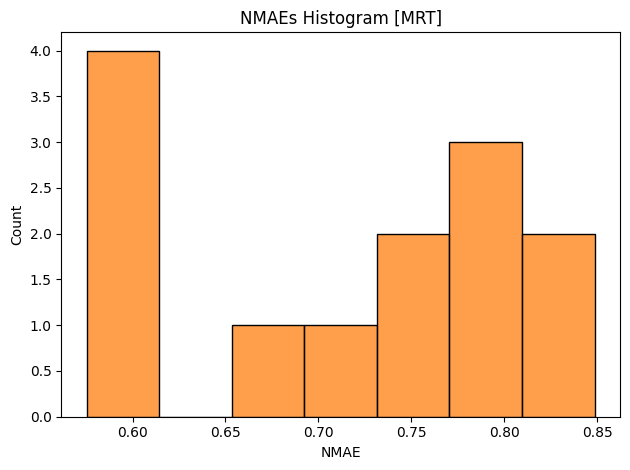

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


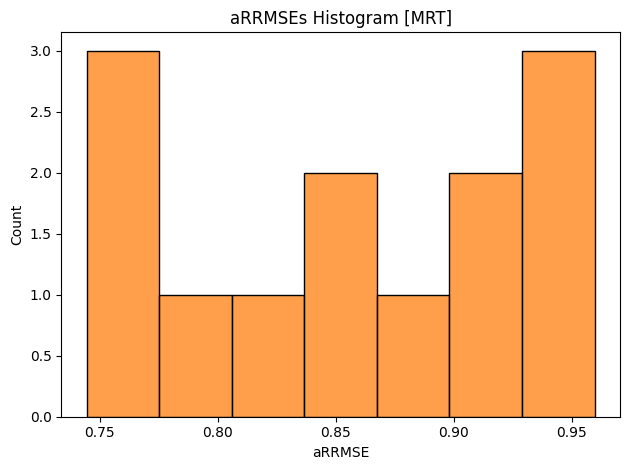

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


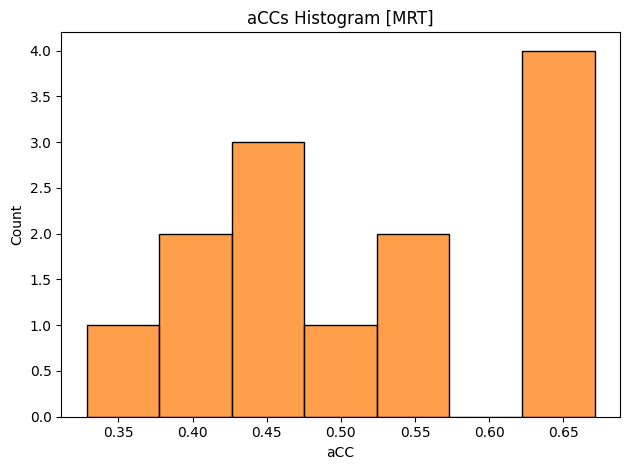

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


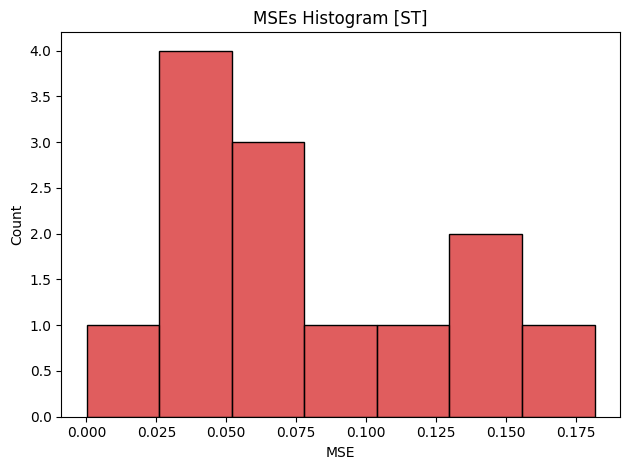

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


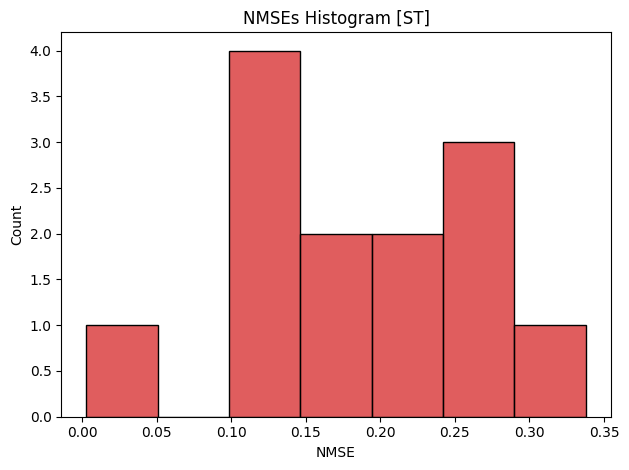

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


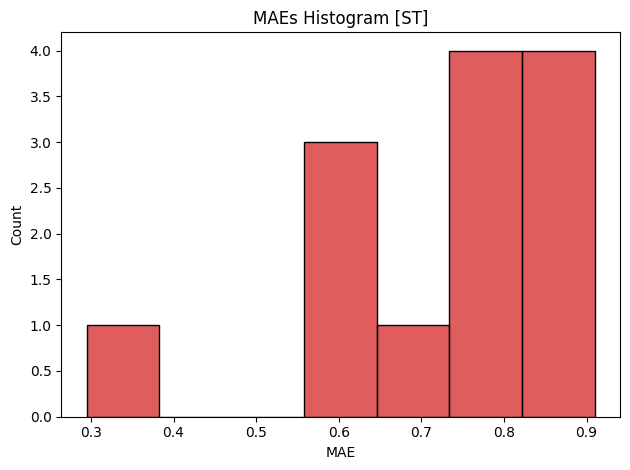

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


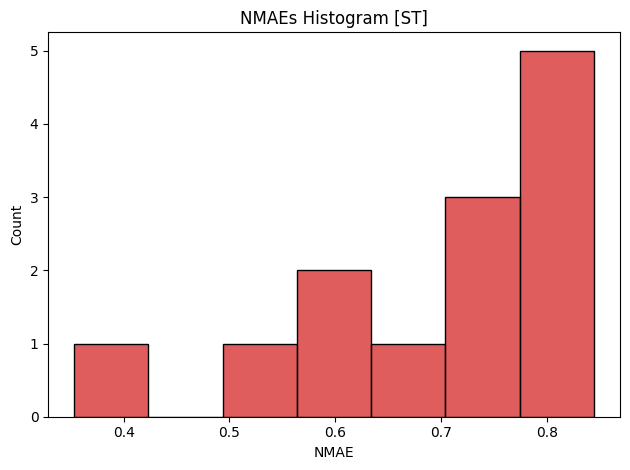

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


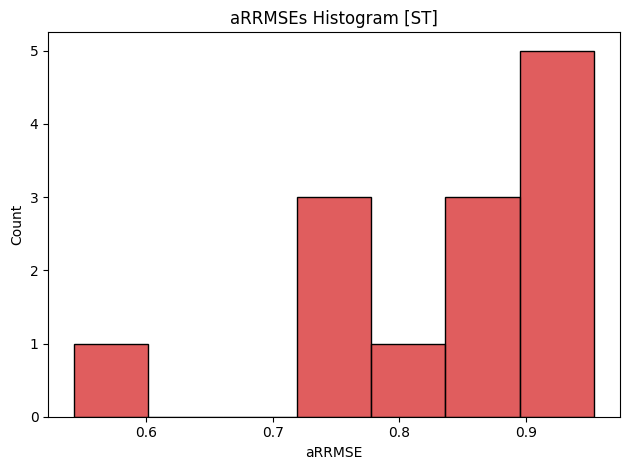

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


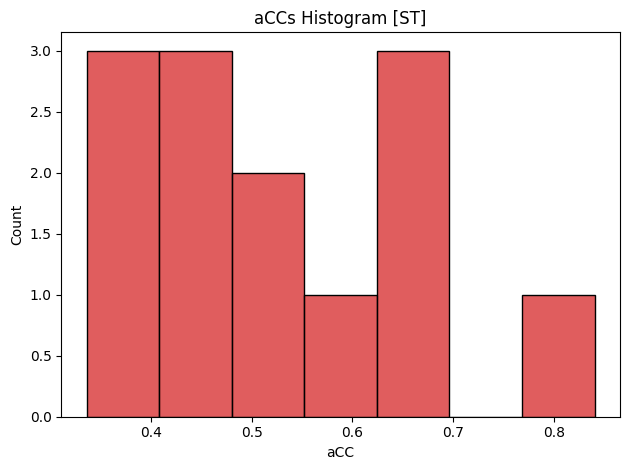

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


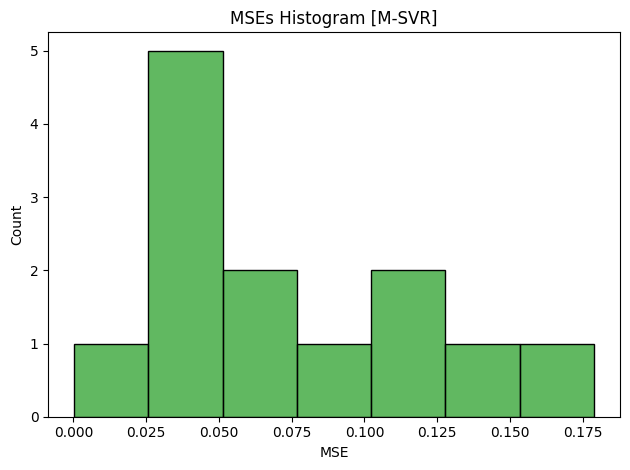

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


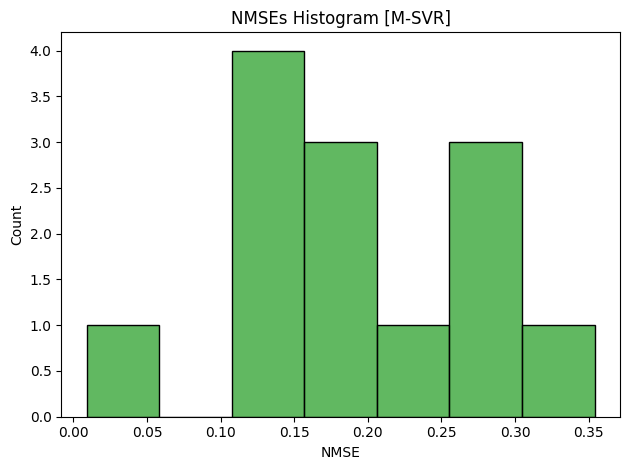

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


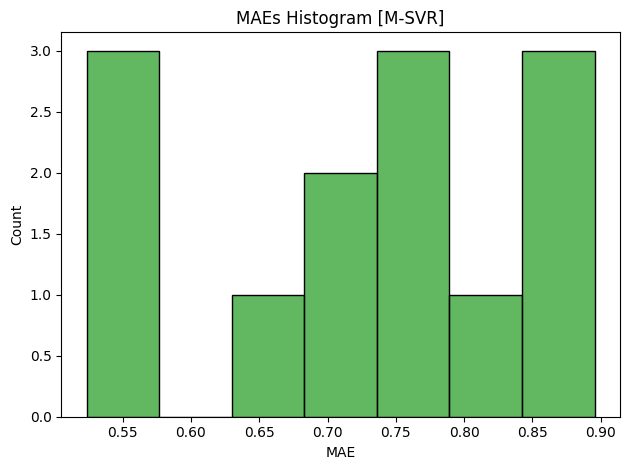

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


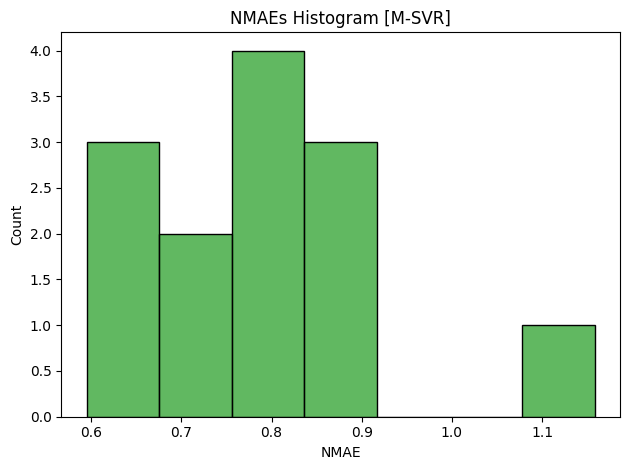

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


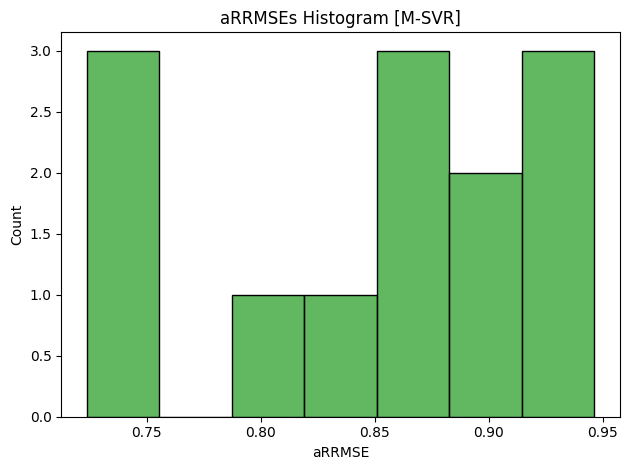

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


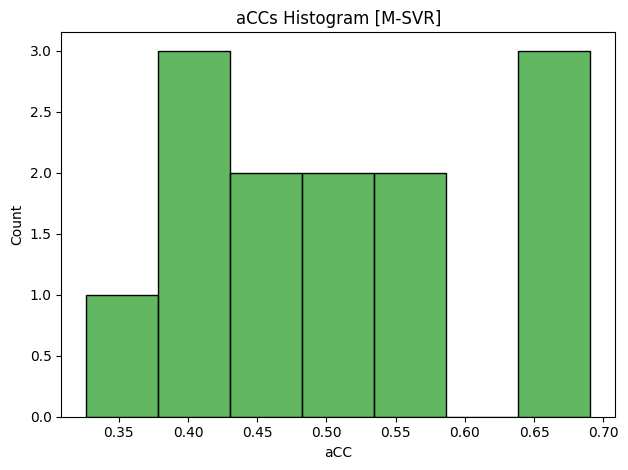

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


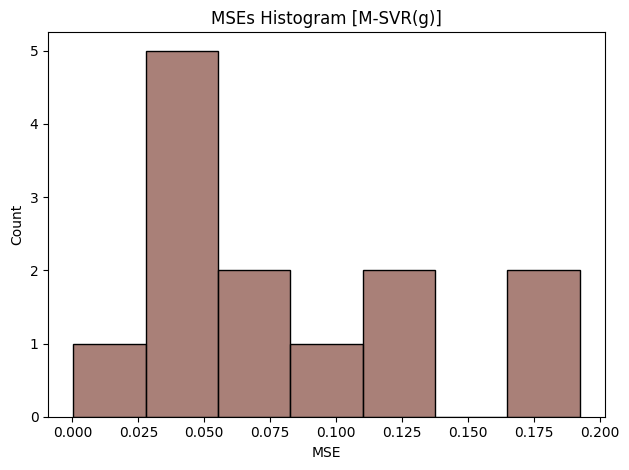

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


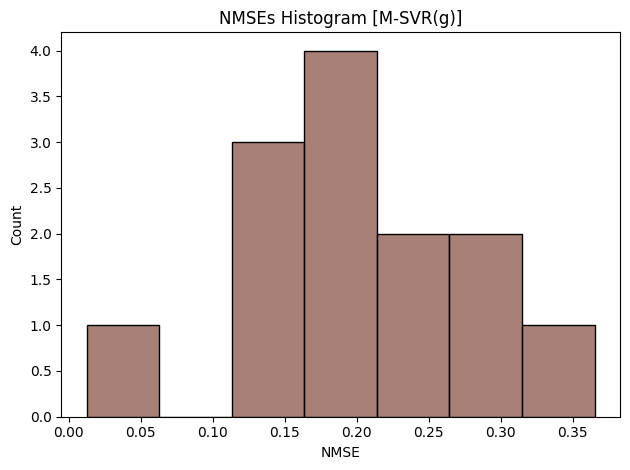

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


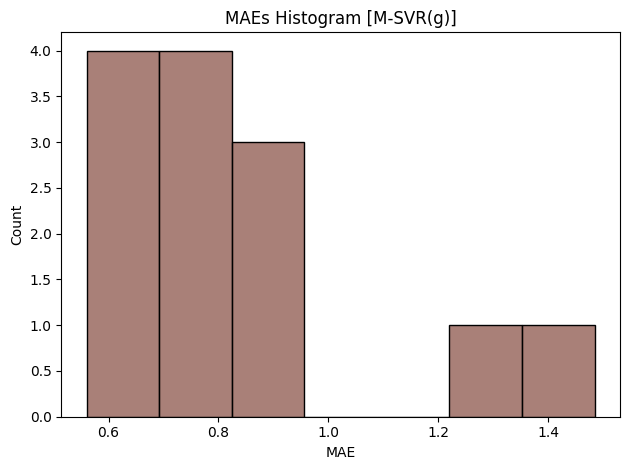

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


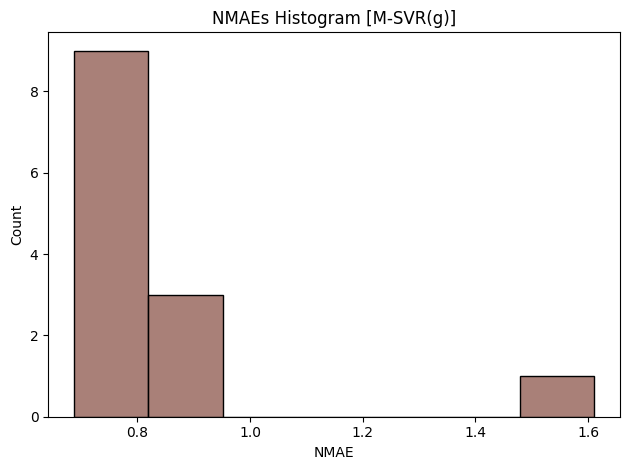

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


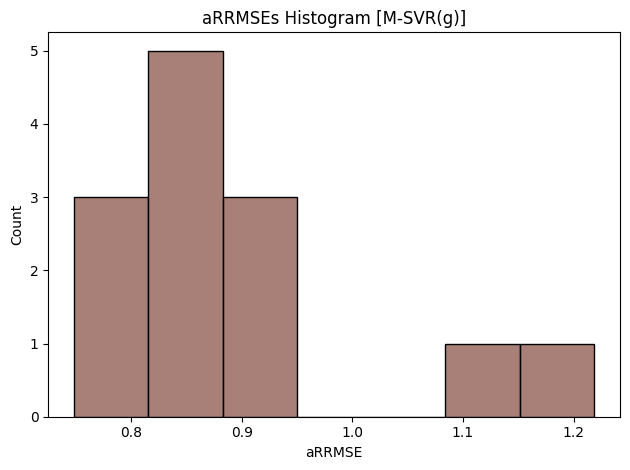

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


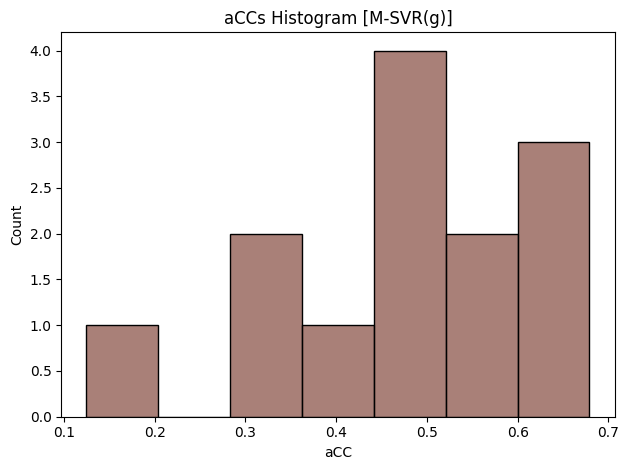

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


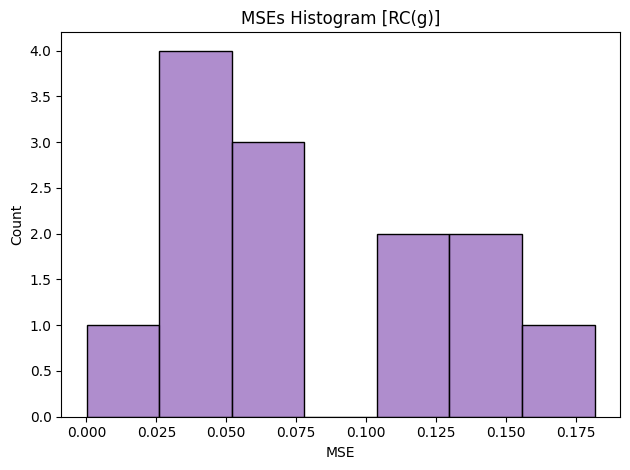

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


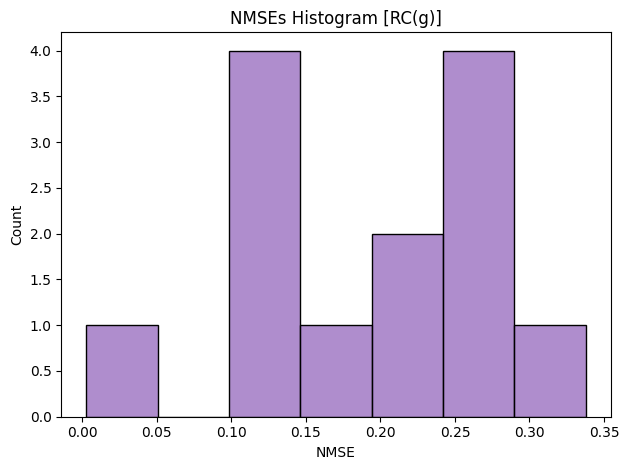

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


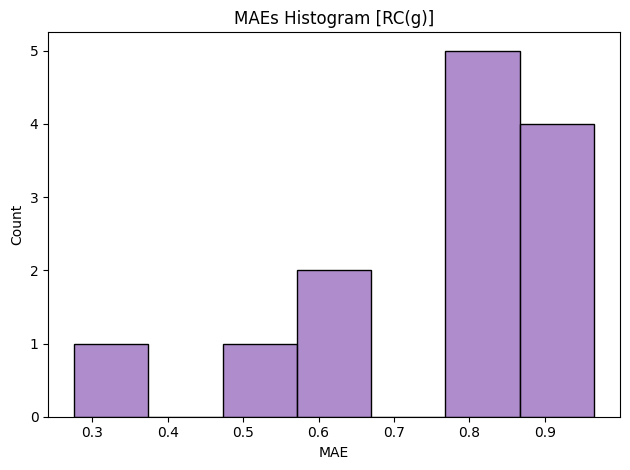

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


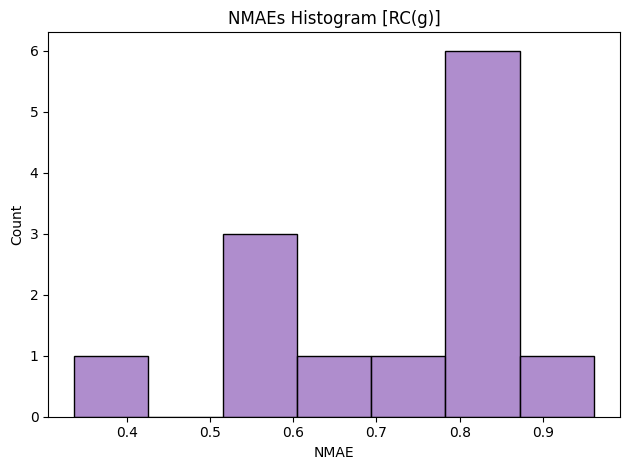

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


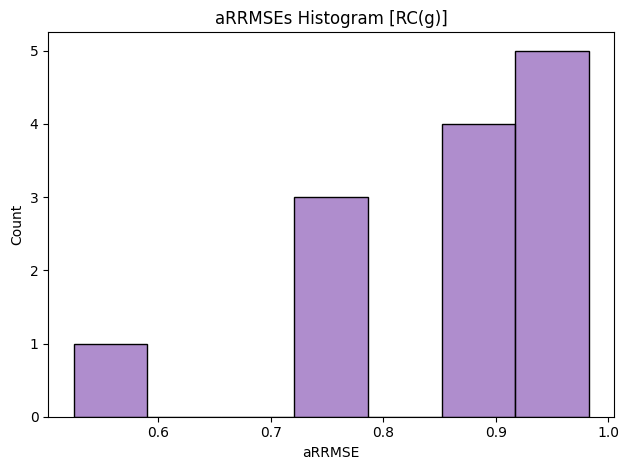

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


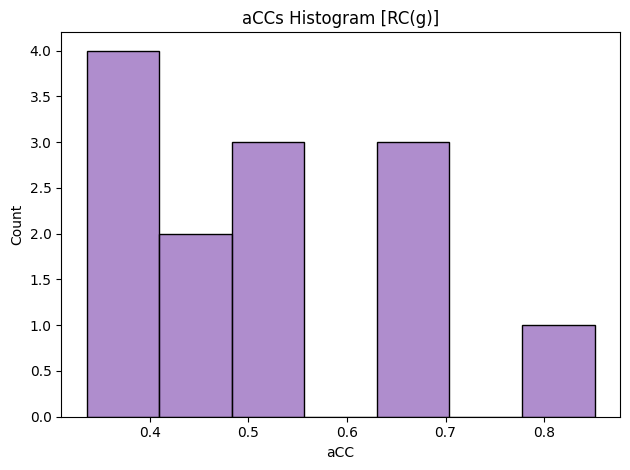

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


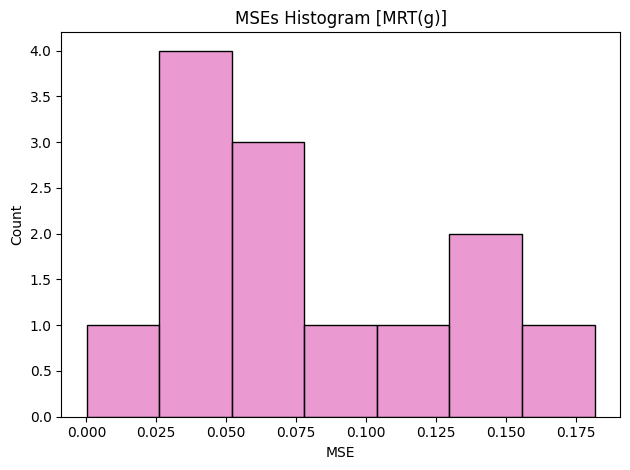

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


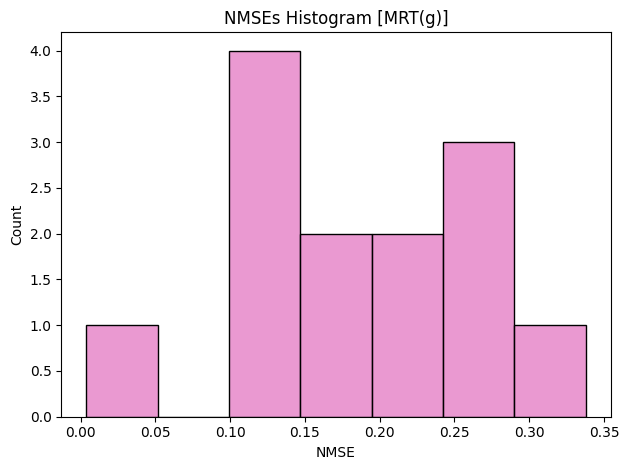

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


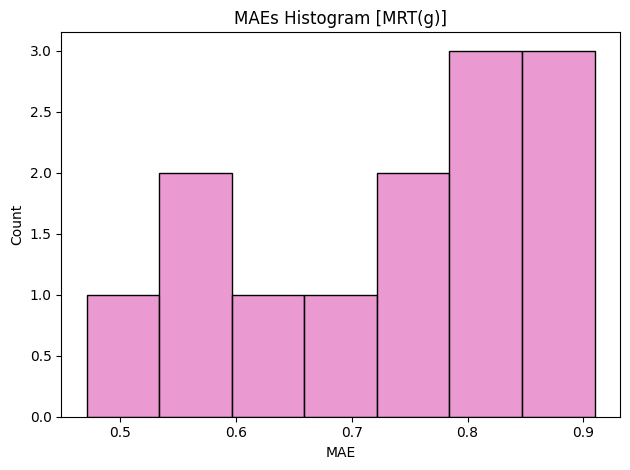

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


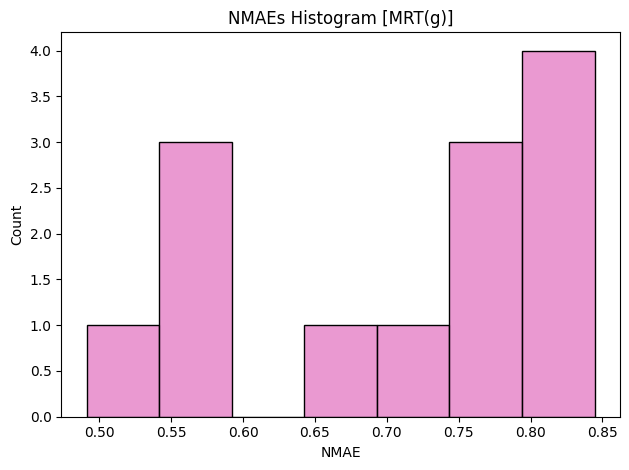

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


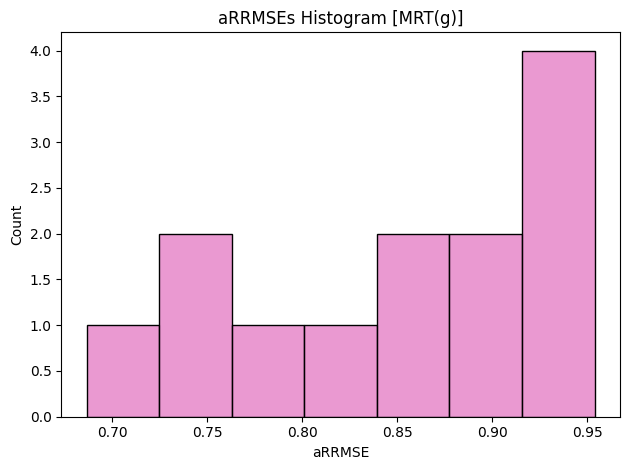

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


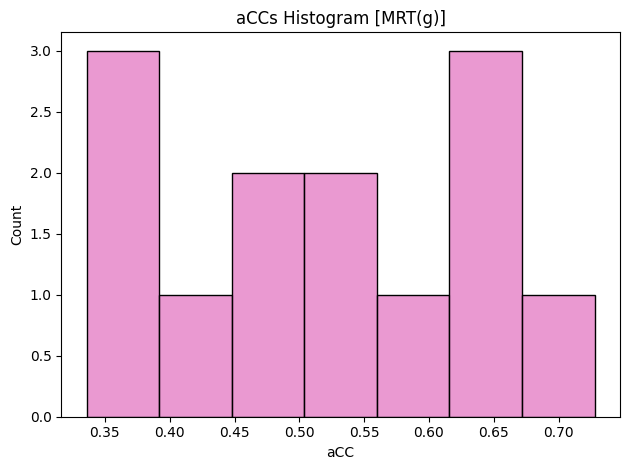

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [56]:
dicio = {'RC': {'color': class_palette[0], 'code': 'RC'},
         'MRT': {'color': class_palette[1], 'code': 'MRT'},
         'ST': {'color': class_palette[3], 'code': 'ST'},
         'M-SVR': {'color': class_palette[2], 'code': 'MSVR'},
         'M-SVR(g)': {'color': class_palette[-2], 'code': 'MSVRG'},
         'RC(g)': {'color': class_palette[-3], 'code': 'RCG'},
         'MRT(g)': {'color': class_palette[-1], 'code': 'MRTG'}}

for a in dicio.keys():
    for mt in ['MSE', 'NMSE', 'MAE', 'NMAE', 'aRRMSE', 'aCC']:
        plt.title(f'{mt}s Histogram [{a}]')
        imgplt = sns.histplot(results_df.loc[results_df['Assessor']==a,['Assessor','Model',mt]], x=mt, bins=7, color=dicio[a]['color'])
        plt.tight_layout()
        plt.show(imgplt)
        imgplt.figure.savefig(f'data/{DIR}/imgs/hg_{dicio[a]["code"]}_{mt.lower()}.eps', format='eps', dpi=300)

In [57]:
results_df

Assessor       Model       MSE       MAE      NMSE      NMAE    aRRMSE  \
0        ST       dtree  0.181723  0.909715  0.337815    0.8446   0.95379   
1        ST         sgd  0.032892  0.565911  0.115303  0.557592  0.752271   
2        ST          lr  0.040547  0.596436  0.131403  0.586247  0.772293   
3        ST         knn  0.116835  0.842509  0.263283  0.798898  0.917883   
4        ST  svm_linear  0.038628  0.576955  0.129083  0.580858  0.759575   
..      ...         ...       ...       ...       ...       ...       ...   
86    RC(g)         kan  0.041679  0.784798  0.133938  0.685187  0.885888   
87    RC(g)     rforest  0.063073  0.824896  0.202312    0.8717  0.908238   
88    RC(g)          gb  0.137709  0.870389  0.270384  0.802271  0.932946   
89    RC(g)        adab  0.000074  0.275801  0.002625  0.336503  0.525168   
90    RC(g)         xgb   0.11083  0.965389  0.275095  0.961565  0.982542   

         aCC  
0   0.335972  
1   0.665716  
2   0.642698  
3   0.422981  
4   0.658345  
..       ...  
86  0.504878  
87  0.509928  
88  0.390141  
89  0.851247  
90  0.392785  

[91 rows x 8 columns]

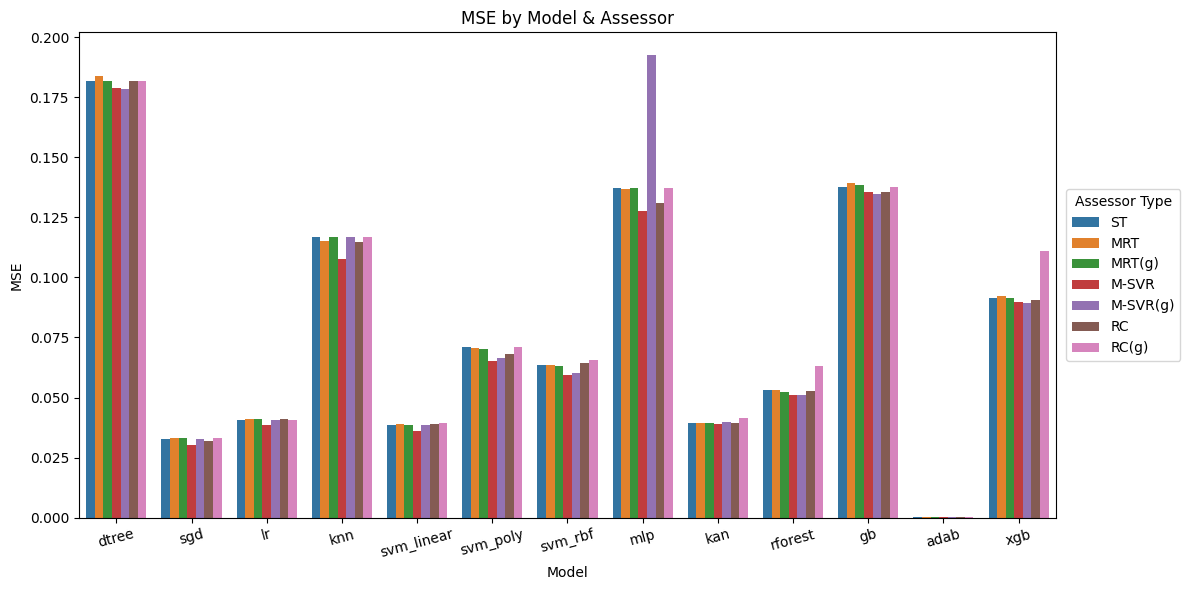

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


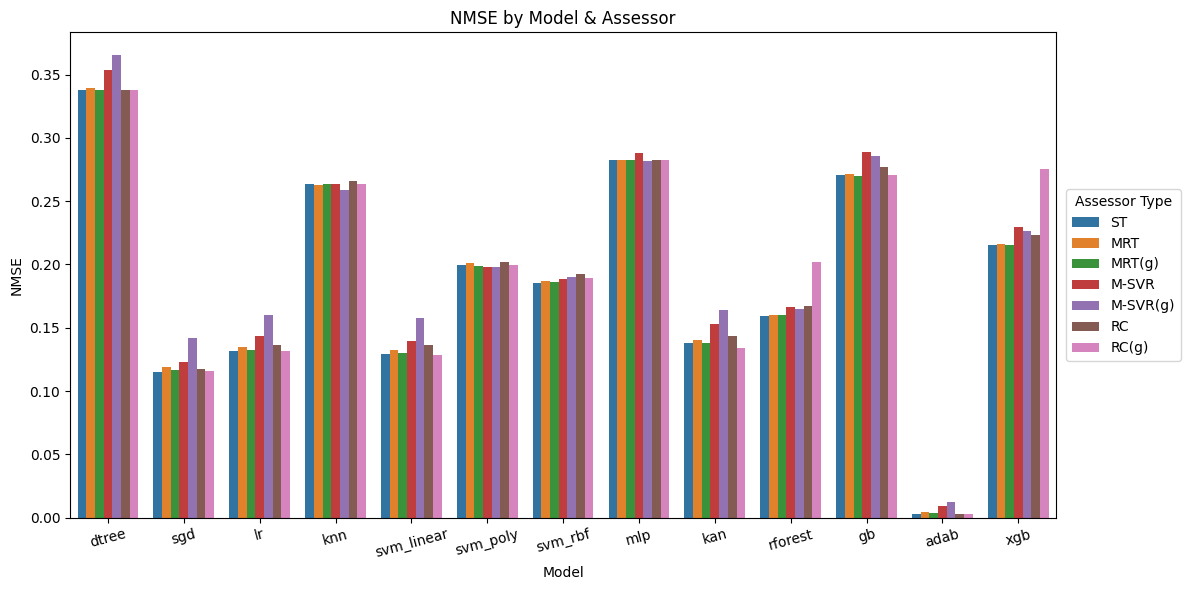

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


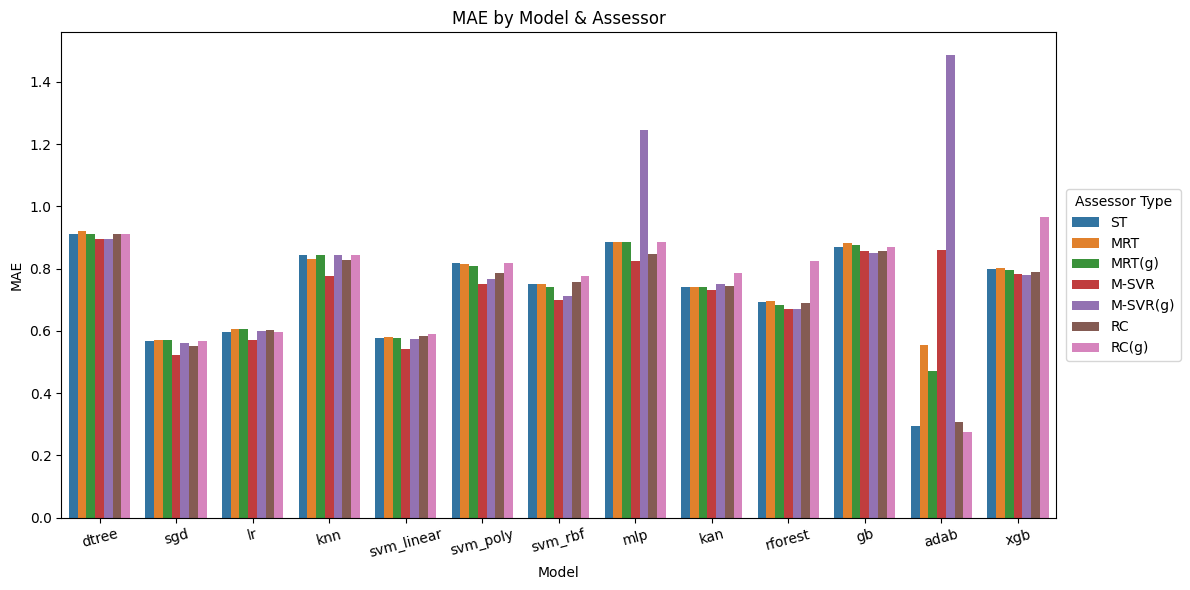

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


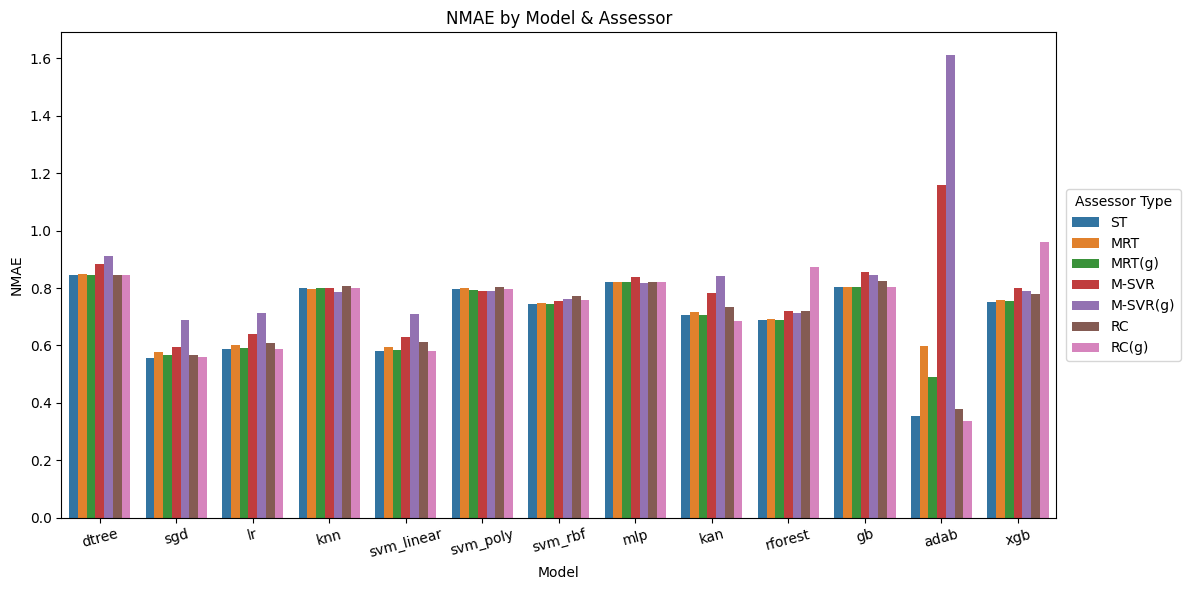

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


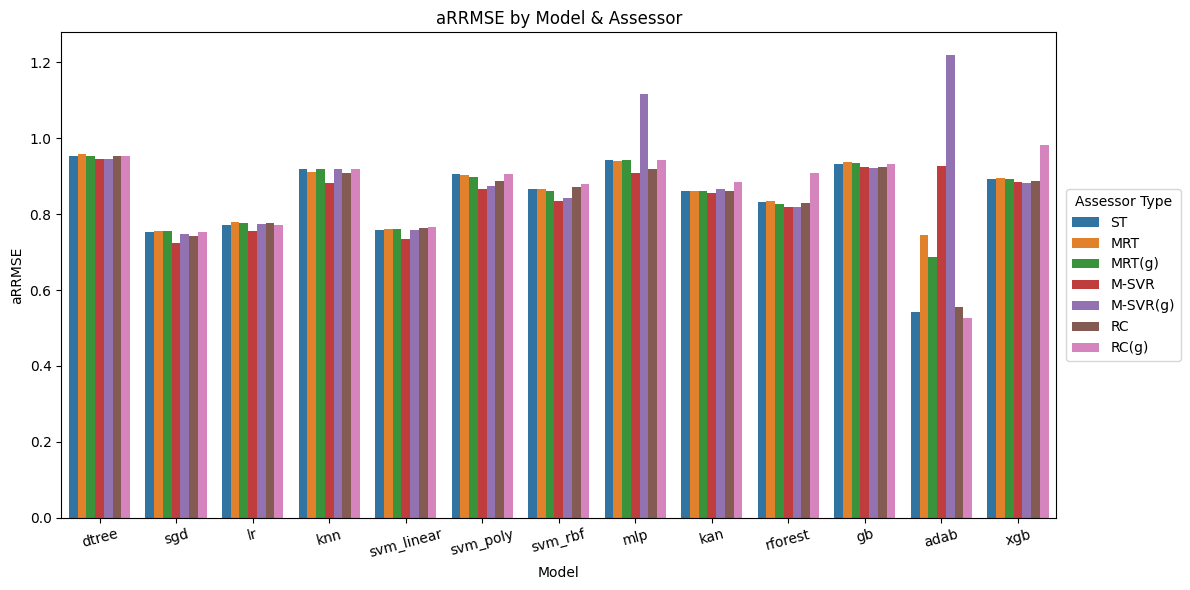

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


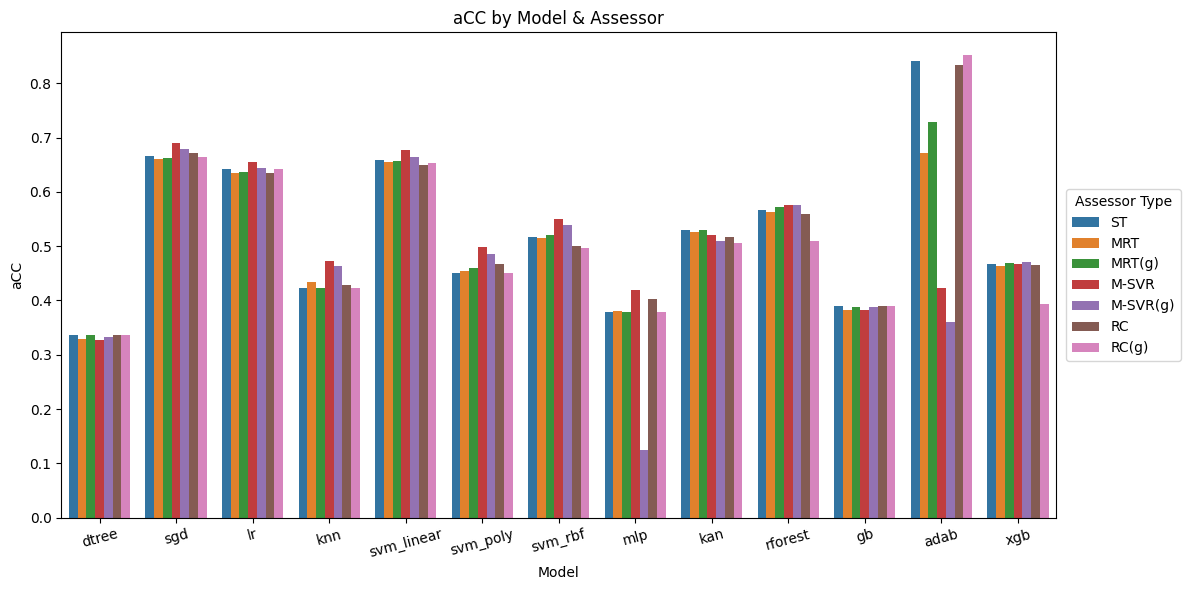

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [58]:
for mt in ['MSE', 'NMSE', 'MAE', 'NMAE', 'aRRMSE', 'aCC']:
    plt.figure(figsize=(12, 6))
    imgplt = sns.barplot(data=results_df, x='Model', y=mt, hue='Assessor', palette=class_palette)
    plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left', borderaxespad=0, title='Assessor Type')
    plt.title(f'{mt} by Model & Assessor')
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show(imgplt)
    imgplt.figure.savefig(f'data/{DIR}/imgs/bar_{mt.lower()}.eps', format='eps', dpi=300)

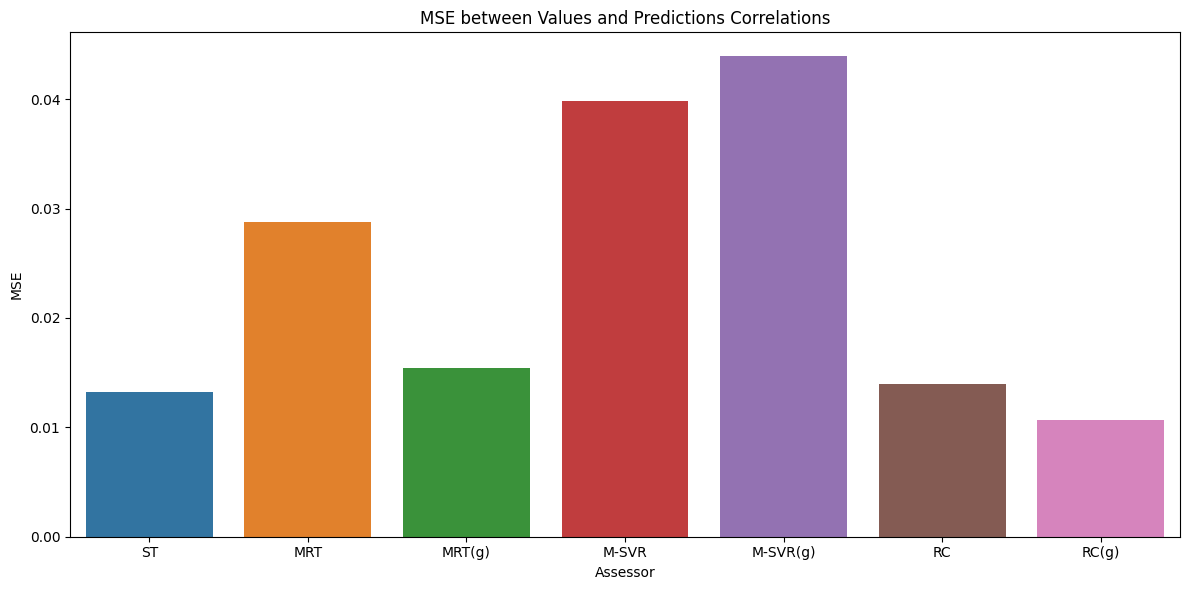

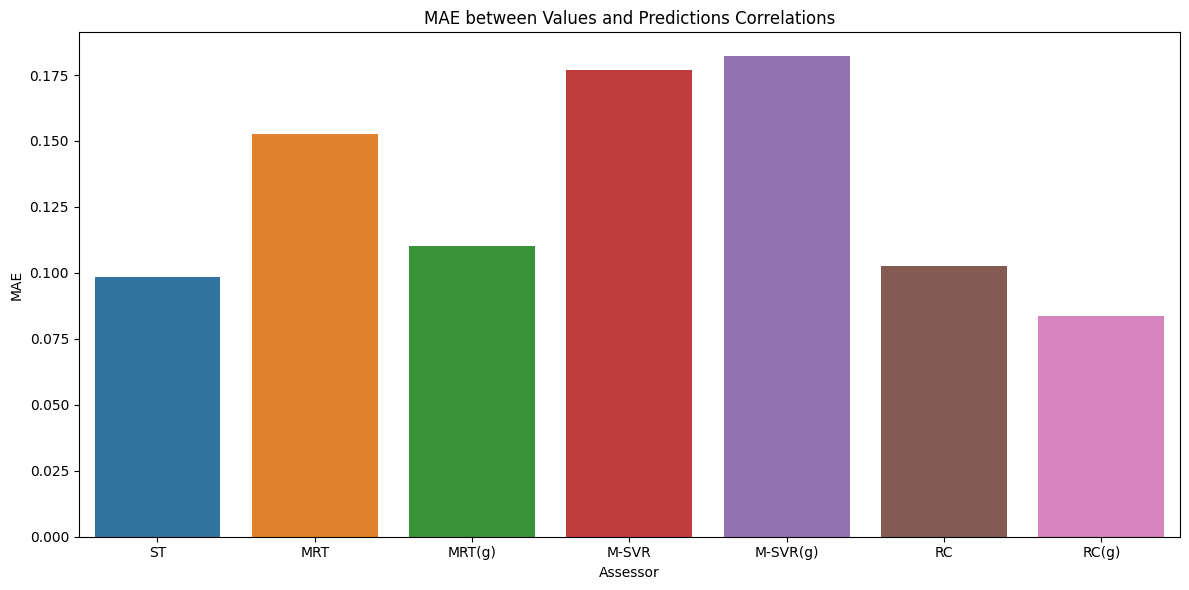

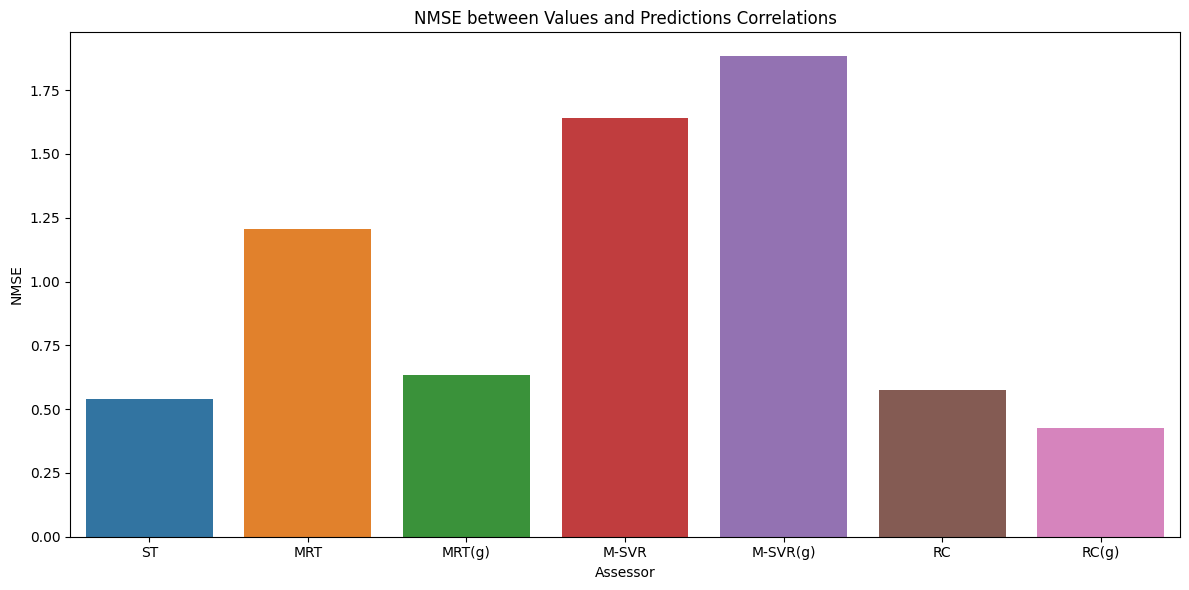

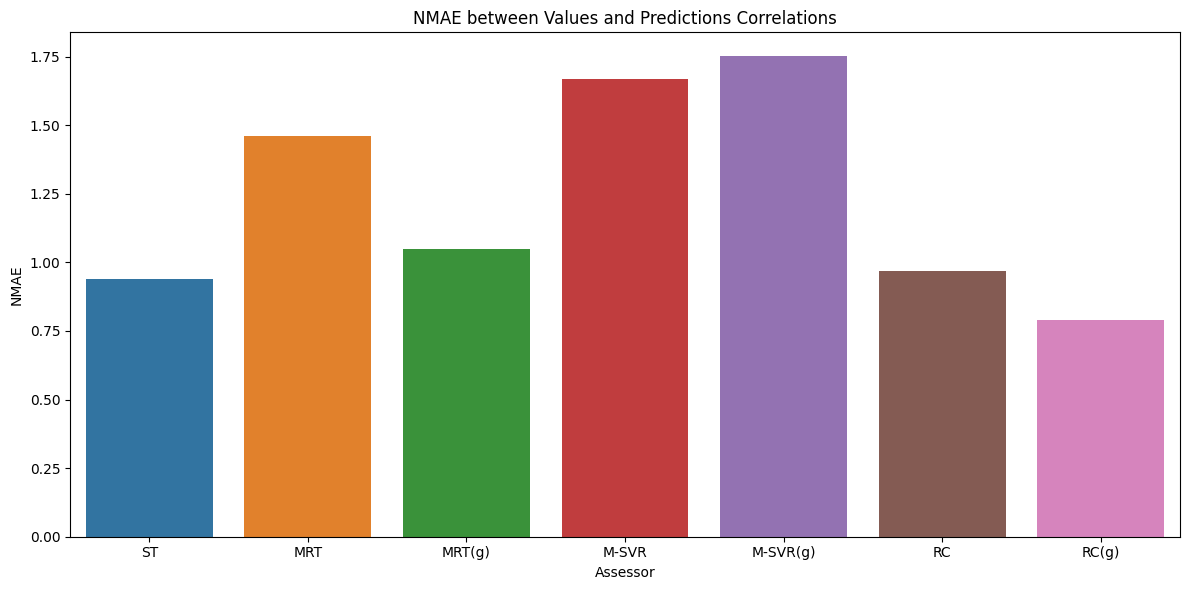

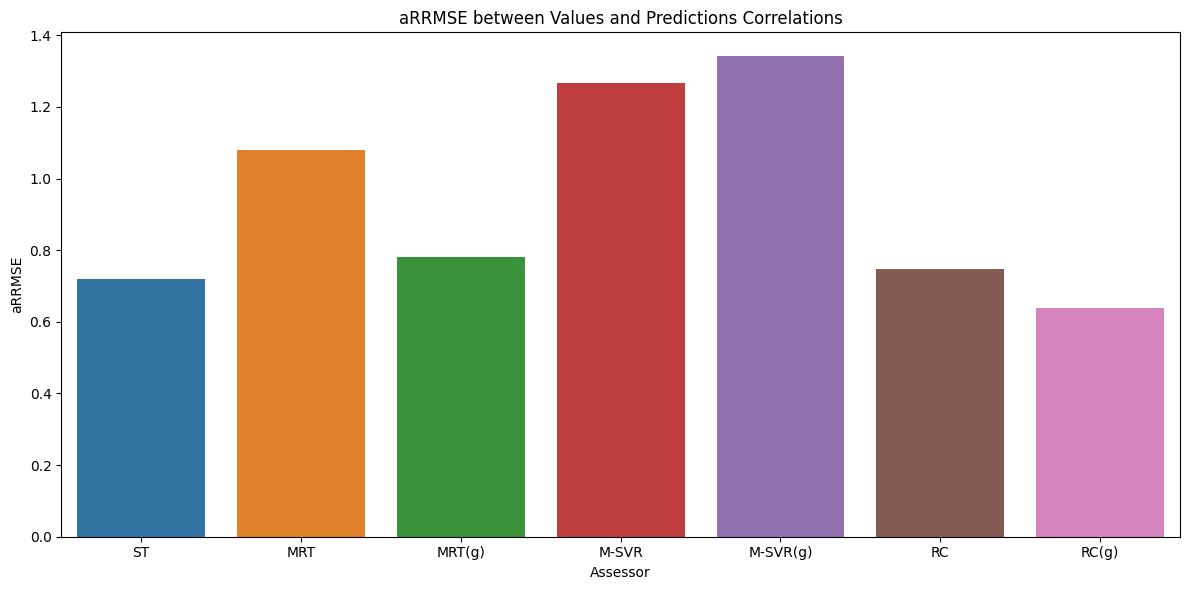

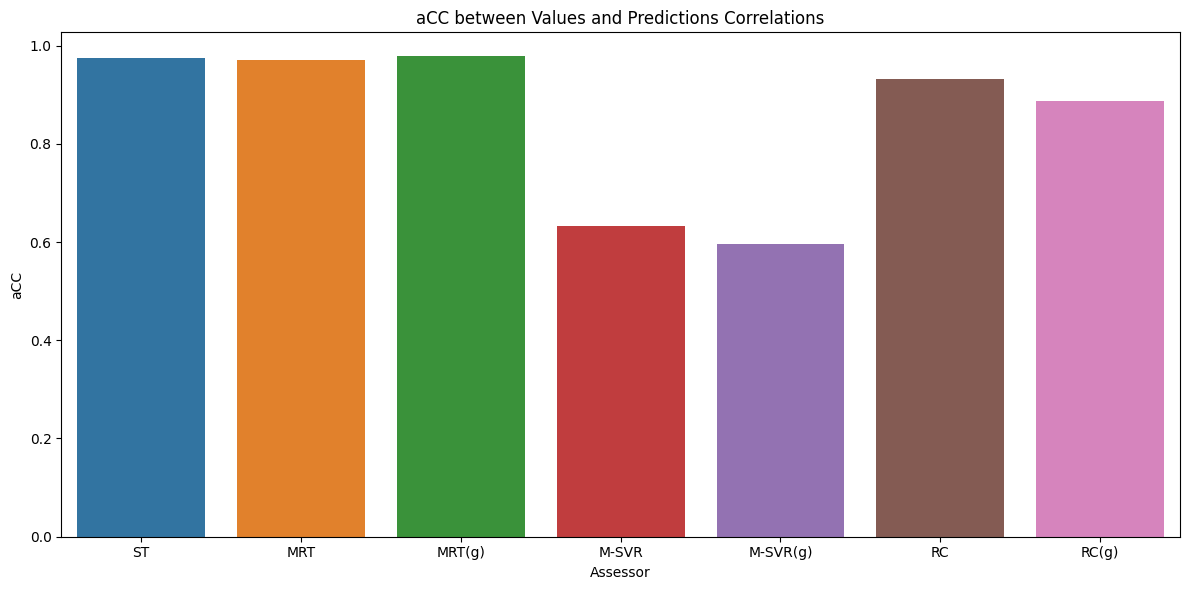

In [59]:
for mt in diff_metrics.columns:
    plt.figure(figsize=(12, 6))
    imgplt = sns.barplot(data=diff_results.loc[:,['Assessor', mt]], x='Assessor', y=mt, hue='Assessor', palette=class_palette)
    plt.title(f"{mt} between Values and Predictions Correlations")
    plt.tight_layout()
    plt.show(imgplt)
    imgplt.figure.savefig(f'data/{DIR}/imgs/bardiff_{mt.lower()}.eps', format='eps', dpi=300)